# Alison's DAT SF 12 Project

Desk is a support ticketing software which my company uses to answer customer questions, issues, feature requests, etc. We are opening an additional support office with the goal of address customers more quickly. The following work will illustrate a rough estimate of how much this office will improve our metrics. 

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

from __future__ import division

%matplotlib inline

Desk has a "Business Insights" tool which offers CSV files of reportint data

In [3]:
# Load the Desk_Business_Insights_Data.csv as a pandas DataFrame 
df = pd.read_csv("Desk_Business_Insights_Data.csv")

In [4]:
df.head()

,Day Count,Date/Time,Created Cases,Resolved Cases,Average Time to First Response,Agent Replies Per Resolve,Average Handle Time,Average Time to Resolution,FCR Rate,Inbound Interactions,Outbound Interactions,Resolved w/o Response,Case Resolves,% Cases Reopened,Case Reopens,Case Deletes,CSat
0,1,Sat 03/21/2015,40,0,NaN,0.0,0:00:00,0:00:00,NaN,54,0,0,0,0.00%,11,0,1.00
1,2,Fri 03/20/2015,204,235,3:58:49,1.6,0:04:21,23:04:34,81.76%,312,264,8,294,62.01%,111,0,0.86
2,3,Thu 03/19/2015,199,257,5:38:41,1.6,0:06:26,17:29:42,67.91%,314,293,11,324,60.80%,121,0,0.95
3,4,Wed 03/18/2015,266,286,5:20:22,1.5,0:06:23,18:27:10,70.89%,432,344,10,398,65.02%,158,0,0.91
4,5,Tue 03/17/2015,241,263,3:21:25,1.4,0:06:28,16:55:52,70.49%,390,295,12,350,82.35%,154,0,0.94


In [5]:
df.columns

Index([u'Day Count', u'Date/Time', u'Created Cases', u'Resolved Cases', u'Average Time to First Response', u'Agent Replies Per Resolve', u'Average Handle Time', u'Average Time to Resolution', u'FCR Rate', u'Inbound Interactions', u'Outbound Interactions', u'Resolved w/o Response', u'Case Resolves', u'% Cases Reopened', u'Case Reopens', u'Case Deletes', u'CSat'], dtype='object')

In [6]:
df = df.rename(columns={'Day Count': 'Day_Count', 'Date/Time': 'Date_Time', 'Created Cases': 'Created_Cases',
                        'Resolved Cases': 'Resolved_Cases','Average Time to First Response': 
                        'Average_Time_to_First_Response'})

In [7]:
df.columns

Index([u'Day_Count', u'Date_Time', u'Created_Cases', u'Resolved_Cases', u'Average_Time_to_First_Response', u'Agent Replies Per Resolve', u'Average Handle Time', u'Average Time to Resolution', u'FCR Rate', u'Inbound Interactions', u'Outbound Interactions', u'Resolved w/o Response', u'Case Resolves', u'% Cases Reopened', u'Case Reopens', u'Case Deletes', u'CSat'], dtype='object')

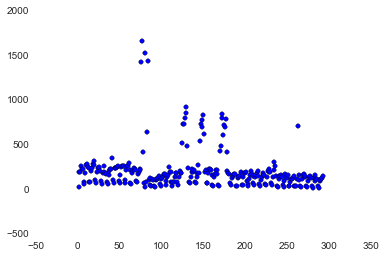

In [8]:
plt.scatter(df.Day_Count, df.Created_Cases)

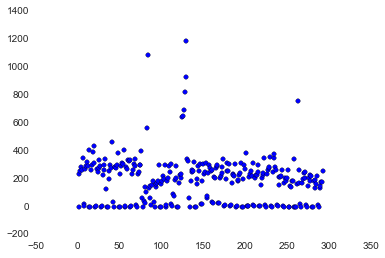

In [9]:
plt.scatter(df.Day_Count, df.Resolved_Cases)

In [10]:
lm = smf.ols('Created_Cases ~ Day_Count', data=df)
fit = lm.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:          Created_Cases   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.457
Date:                Thu, 26 Mar 2015   Prob (F-statistic):            0.00671
Time:                        17:46:29   Log-Likelihood:                -2003.2
No. Observations:                 293   AIC:                             4010.
Df Residuals:                     291   BIC:                             4018.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    278.5584     26.496     10.513      0.000       226.410   330.707
Day_Count     -0.4266      0.156     -2.731      0.0

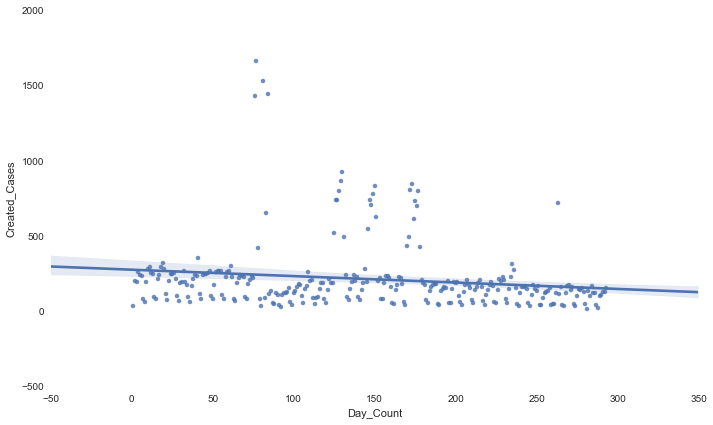

In [11]:
sns.lmplot("Day_Count", "Created_Cases", df, size=6, aspect=5/3);

This is trending downward which is wrong, the number of cases per day since June has increased. I ran other models as well, but they all displayed results that stood in opposition to me (and my teammates) intuition. This is most likely due to outliers and the data being very inconsistent. 

So, I wrote a python script to pull information from Desk's API. The API returns a lot of information:

{u'labels': [], u'updated_at': u'2015-02-01T00:03:37Z', u'locked_until': None, u'received_at': u'2015-02-01T00:03:37Z', u'active_attachments_count': 0, u'id': 176988, u'custom_fields': {u'priority_support': None, u'emailformdropdown': u'Email Integration', u'ticket_groups': None, u'big_team': None}, u'subject': u'This is only a test. A robot test!', u'has_pending_interactions': False, u'changed_at': u'2015-02-01T00:03:37Z', u'priority': 4, u'opened_at': None, u'active_at': None, u'_links': {u'customer': {u'href': u'/api/v2/customers/260038203', u'class': u'customer'}, u'locked_by': None, u'attachments': {u'count': 0, u'href': u'/api/v2/cases/176988/attachments', u'class': u'attachment'}, u'self': {u'href': u'/api/v2/cases/176988', u'class': u'case'}, u'labels': {u'href': u'/api/v2/cases/176988/labels', u'class': u'label'}, u'feedbacks': None, u'case_links': {u'href': u'/api/v2/cases/176988/links', u'class': u'case_link'}, u'notes': {u'count': 0, u'href': u'/api/v2/cases/176988/notes', u'class': u'note'}, u'draft': {u'href': u'/api/v2/cases/176988/replies/draft', u'class': u'reply'}, u'replies': {u'count': 0, u'href': u'/api/v2/cases/176988/replies', u'class': u'reply'}, u'macro_preview': {u'href': u'/api/v2/cases/176988/macros/preview', u'class': u'macro_preview'}, u'message': {u'href': u'/api/v2/cases/176988/message', u'class': u'email'}, u'assigned_user': None, u'assigned_group': {u'href': u'/api/v2/groups/19411', u'class': u'group'}, u'history': {u'href': u'/api/v2/cases/176988/history', u'class': u'history'}}, u'type': u'email', u'blurb': u"From: Krause Robot Test\nCategory: Email Integration\nBrowser: Safari\nOS: Linux\nMessage: We need to setup things that route this out of our queues and metrics - but somewhere where we'll notice if they aren't coming through hourly.\n\n\n", u'status': u'closed', u'first_resolved_at': None, u'description': None, u'label_ids': [], u'active_notes_count': 0, u'resolved_at': None, u'language': None, u'created_at': u'2015-02-01T00:03:37Z', u'has_failed_interactions': False, u'external_id': None, u'first_opened_at': None}

I only needed some of this, but times had to be converted to local time (SF) and I had to clean that data for anomolies like cases which had no created time, no group, etc. 

https://github.com/alharmon13/DAT_SF_12/blob/gh-pages/project/write_desk_data_to_csv.py

In [12]:
# Load the data from the Desk API as a pandas DataFrame 
data = pd.read_csv("June_6_2014-March_20_2015-Desk_Data.csv")

In [13]:
len(data)

23096

In [14]:
#data

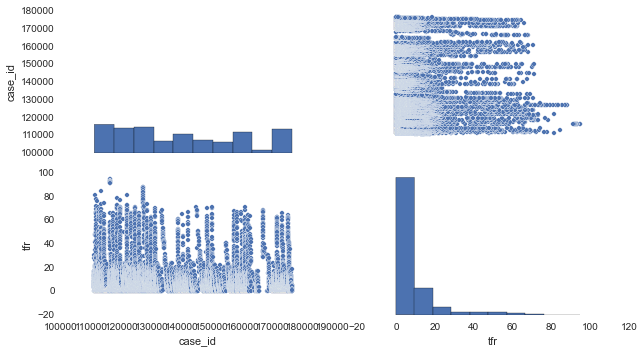

In [15]:
sns.pairplot(data, size = 2.5, aspect=1.75)

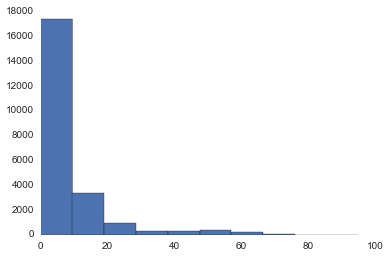

In [16]:
data['tfr'].hist()

Let's look at the same data is last time (number of cases created at per day). 

test_data = pd.read_csv("/users/alisonharmon/desktop/test.csv")

test_data.head()

In [17]:
list_of_dates = []
for x in data['created_at_date']:
    list_of_dates.append(x)

#list_of_dates

In [18]:
len(list_of_dates)

23096

case_day_count = [0]
list_of_dates = ['2014-06-01', '2014-06-01', '2014-06-02', '2014-06-03', '2014-06-03', '2014-06-03']

for i in xrange(1,len(list_of_dates)): 
    #import pdb;pdb.set_trace()
    if i == 1:
        continue
    if list_of_dates[i-1] == list_of_dates[(i-2)]:
        case_day_count.append(case_day_count[(i-2)])
    else:
        case_day_count.append(case_day_count[(i-1)]+1)
        
case_day_count

In [19]:
import itertools
#list_of_dates = ['2014-06-01', '2014-06-01', '2014-06-02',
                 #'2014-06-03', '2014-06-03', '2014-06-03']

case_day_count = [0]
for (a,b) in itertools.izip(list_of_dates[:-1], list_of_dates[1:]):
    case_day_count.append(case_day_count[-1] + int(a != b))

print len(case_day_count)

23096


In [20]:
data['case_day_count'] = case_day_count

In [21]:
data.head()

,case_id,created_at_date,created_at_time,resolved_at_time,tfr,case_day_count
0,110939,2014-06-01,18:26:16,11:20:23,16.901944,0
1,110940,2014-06-01,18:39:24,10:29:07,15.828611,0
2,110941,2014-06-01,19:31:46,10:31:23,14.993611,0
3,110942,2014-06-01,19:56:20,13:18:35,17.370833,0
4,110943,2014-06-01,20:18:17,10:48:12,14.498611,0


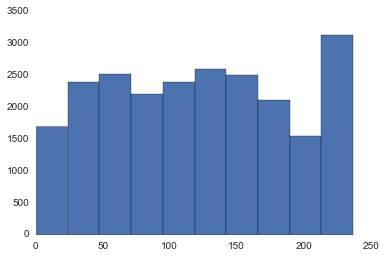

In [22]:
data['case_day_count'].hist()

In [23]:
data['case_day_count'].mean()

121.60919639764461

In [24]:
num_list_of_days = data['case_day_count'].unique()

In [25]:
numbered_list_of_days = num_list_of_days.tolist()

In [26]:
print len(numbered_list_of_days)

238


case_count_per_day = []
for x in numbered_list_of_days:
    data.count(x)
    #case_count_per_day.append(data.count(x))

In [27]:
created_cases_df = data.groupby('case_day_count').count()

In [28]:
created_cases_df.head()

,case_id,created_at_date,created_at_time,resolved_at_time,tfr
case_day_count,,,,,
0,10,10,10,10,10
1,102,102,102,102,102
2,90,90,90,90,90
3,91,91,91,91,91
4,69,69,69,69,69


In [29]:
number_of_cases_per_day = []
for x in numbered_list_of_days: 
    number_of_cases_per_day.append(created_cases_df['case_id'][x])
    

In [30]:
#number_of_cases_per_day

In [31]:
CASES = zip(numbered_list_of_days, number_of_cases_per_day)

In [32]:
CASES_np = np.asarray(CASES)

In [33]:
col = ('day', 'num_cases')
df_cases = pd.DataFrame(CASES_np, columns=col)

In [34]:
df_cases.head()

,day,num_cases
0,0,10
1,1,102
2,2,90
3,3,91
4,4,69


In [35]:
lm = smf.ols('num_cases ~ day', data=df_cases)
fit = lm.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              num_cases   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.162
Date:                Thu, 26 Mar 2015   Prob (F-statistic):              0.282
Time:                        17:46:31   Log-Likelihood:                -1322.2
No. Observations:                 238   AIC:                             2648.
Df Residuals:                     236   BIC:                             2655.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     89.4674      8.123     11.014      0.000        73.464   105.471
day            0.0639      0.059      1.078      0.2

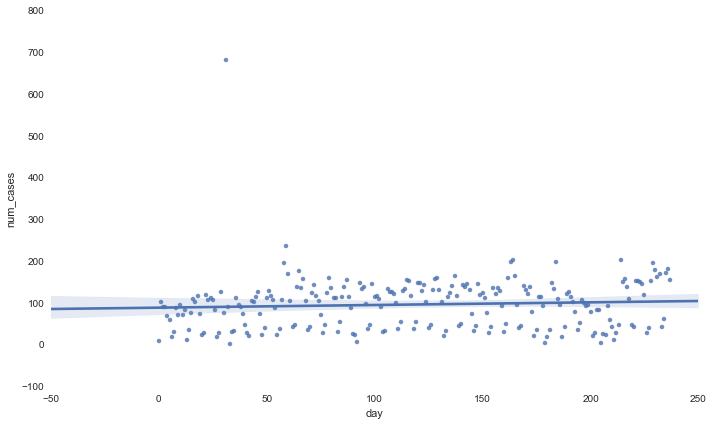

In [36]:
sns.lmplot("day", "num_cases", df_cases, size=6, aspect=5/3);

This is better!

In [37]:
data['tfr'].mean()

7.9565462995035219

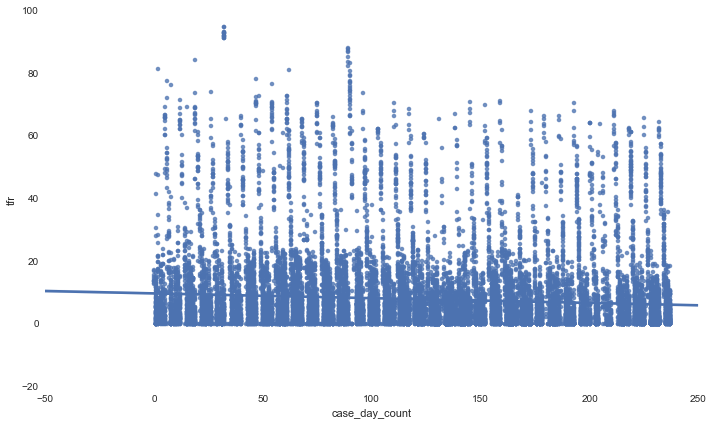

In [38]:
sns.lmplot("case_day_count", "tfr", data, size=6, aspect=5/3);

In [47]:
tfr_df = pd.read_csv("tfr.csv")

In [48]:
tfr_df.head()

,case_id,tfr
0,110939,16:54:07
1,110940,15:49:43
2,110941,14:00:00
3,110942,14:00:00
4,110943,13:00:00


In [53]:
tfr_df.columns

Index([u'case_id', u' tfr'], dtype='object')

TypeError: Could not convert 16:54:0715:49:4314:00:0014:00:0013:00:0013:00:0013:00:0012:00:0011:00:0011:00:009:00:009:33:5413:03:188:56:3313:00:028:36:429:54:2311:23:577:57:276:48:5812:21:577:23:167:03:056:42:321 day, 6:49:265:51:435:31:318:17:410:02:025:05:365:31:364:13:125:55:122:49:143:49:321 day, 4:10:363:40:033:52:323:40:468:22:483:34:086:24:394:15:355:12:193:17:389:33:265:36:193:20:021:57:001:55:566:22:461:27:104:11:555:46:240:50:375:31:111:29:380:47:411:13:420:05:390:28:000:02:151:39:585:00:490:11:262:13:545:52:200:41:550:21:141:45:440:06:191:42:143:36:561 day, 23:50:350:14:130:08:520:05:580:24:042:15:2316:13:183:51:243:21:111:17:380:56:290:55:542:03:272:29:512:00:390:02:130:20:350:03:4814:00:480:11:110:12:030:04:550:02:301 day, 17:37:5711:53:5011:54:2814:00:0010:38:4614:00:009:52:059:51:1513:00:0013:00:000:02:150:02:137:00:577:01:1410:00:0010:00:006:17:339:00:000:02:029:00:009:00:000:02:103 days, 9:30:0310:28:491 day, 10:44:418:11:537:33:056:53:267:04:186:02:536:43:487:22:135:53:272:47:505:21:042:12:322:00:111:30:060:53:515:00:480:46:565:20:465:03:544:04:074:50:273:43:284:21:030:02:154:29:473:56:003:02:102:17:522:58:173:24:401 day, 4:29:562:21:348:29:321:59:562:22:372:15:012:08:541:58:071 day, 1:53:381:46:381:04:060:43:282:57:190:12:490:38:080:34:461:33:221:14:502:07:312:14:260:02:141:35:530:53:132:15:042:26:032:13:202:19:022:23:591:36:1921:35:272:34:230:26:290:13:240:57:561 day, 23:40:381:16:290:28:171:01:310:25:590:06:0421:23:521:27:4421:43:5819:59:2019:40:3813:00:0013:00:0013:00:0012:00:0012:00:0010:00:0010:00:009:00:008:52:099:00:009:00:0013:20:2512:00:1410:00:357:01:105:45:125:47:539:52:125:42:198:29:538:13:465:23:543:20:077:54:425:09:337:46:007:45:237:40:119:42:005:33:559:52:322:25:316:57:466:52:356:47:206:41:146:23:503:25:076:08:026:00:363:04:022:32:120:12:495:09:474:59:494:48:300:00:501:35:094:46:446:56:214:39:541:30:404:39:181:20:474:26:254:42:234:21:241:25:081:26:472:44:490:47:344:00:414:01:304:48:553:36:400:31:493:28:393:01:141:20:383:00:220:50:592:44:013:22:562:51:472:51:563:18:432:30:314:02:432:02:480:10:143:21:391:29:0719:03:250:40:1818:42:2018:38:451:30:140:49:310:14:3317:00:1716:31:5916:01:2015:39:1515:32:3513:00:0013:00:0011:00:009:45:248:46:328:22:5810:45:139:16:269:01:516:12:025:41:526:26:335:05:504:54:2711:17:544:28:443:43:204:30:205:42:305:34:293:03:514:00:593:12:075:00:032:26:202:13:042:25:023:48:548:32:381:56:582:18:272:55:011:05:280:57:100:32:410:27:521:17:470:12:423:48:253:06:110:26:254:34:5623:51:034:18:203:35:493:49:5522:10:041:39:1822:09:020:48:222:35:162:26:530:13:162:56:422:13:572:57:211:16:220:57:421:50:0919:10:5519:03:471:38:331:04:520:06:3419:19:3615:13:5415:57:520:02:1315:27:5514:00:0013:00:0011:00:0010:39:069:00:009:00:0010:54:3410:44:4310:22:279:30:216:52:454:57:265:05:156:01:064:05:184:13:569:20:484:05:592:23:022:26:442:54:382:36:522:37:367:58:402:35:550:31:417:15:121:12:362 days, 1:24:070:44:520:25:472:27:300:27:250:18:570:17:060:41:212 days, 0:13:043:50:531:13:090:41:360:50:194:50:352 days, 21:11:362:41:190:02:131:30:581:45:071:54:002:04:411:05:342 days, 18:54:452 days, 18:02:090:14:560:14:430:11:452 days, 18:38:312 days, 17:42:492 days, 18:13:152 days, 17:54:530:02:192 days, 16:52:0113:00:0012:00:0012:00:002 days, 8:20:203 days, 5:30:352 days, 6:33:231 day, 3:59:082 days, 5:06:292 days, 4:48:551 day, 3:15:042 days, 3:05:323 days, 0:15:472 days, 1:33:352 days, 6:38:322 days, 0:56:401 day, 23:30:132 days, 4:16:031 day, 22:38:001 day, 19:27:3117:39:5018:13:430:02:159:00:001 day, 10:09:381 day, 14:03:366:18:391 day, 9:16:545:30:391 day, 4:57:241 day, 12:40:031 day, 4:30:301 day, 3:53:491 day, 5:41:511 day, 4:59:201 day, 4:02:500:28:4420:05:5622:40:5223:02:1720:00:4817:03:2416:20:1116:19:191 day, 18:11:4018:14:1116:41:2116:51:5114:00:0013:00:007:00:0011:00:0011:00:0010:00:009:00:009:00:009:00:0016:32:068:27:270:02:1011:06:438:33:098:00:569:45:516:18:516:01:113 days, 4:13:215:41:3112:36:244:56:207:21:424:33:504:35:136:36:157:59:443:18:163:52:156:01:155:57:195:10:265:42:473:10:543:11:094:50:452:18:272:20:494:37:592:06:163:52:080:57:571:14:591:24:584:36:423:20:365:16:530:41:040:22:086:05:164:02:024:22:504:48:030:02:100:22:350:24:440:09:460:07:545:38:543:01:111:58:074:48:380:12:400:18:0120:31:220:31:080:26:2417:58:580:02:150:10:040:26:160:45:490:22:410:58:360:55:230:06:470:10:502:57:4215:43:420:15:1422:42:030:02:140:03:241 day, 16:34:5114:00:0014:00:0013:41:3912:49:2912:38:520:02:0913:00:0011:00:0010:48:5510:00:008:21:3315:04:567:39:499:14:276:03:4711:18:556:16:410:02:055:53:305:41:502:48:545:04:142:48:097:30:411:56:291:19:432:05:080:55:573:14:510:28:300:14:131:00:000:05:460:20:590:42:330:17:530:26:291:41:060:14:240:09:396:08:575:50:410:28:200:08:211:00:114:16:243:57:393:42:461:28:320:09:072:50:372:07:502:41:494:31:001:39:472:46:282:37:243:35:440:02:202:23:022:22:441:13:512:12:440:34:552:55:3720:21:040:28:400:18:2320:47:501:16:563:22:271:27:480:46:3718:00:011:47:130:39:021:08:091:06:3616:40:1216:30:300:02:0511:42:4712:00:009:00:009:00:009:00:0011:09:1115:30:109:46:139:09:218:08:046:39:025:53:395:32:087:19:426:29:314:59:400:02:094:15:422:10:561:07:543:14:312:18:412:01:530:16:591:18:330:55:502:05:150:38:143:22:211:36:572:10:280:09:564:29:424:33:454:17:041:13:160:51:341:53:466:40:305:18:160:02:093:42:440:02:173:04:563:38:353:16:102:53:502:55:513:11:113:11:335:33:263:53:113:54:090:02:074:11:543:42:554:08:383:35:422:49:553:38:281:36:501:16:551:22:070:06:361:51:481:02:111:41:010:51:171:19:533:32:161:36:561:30:421:24:262:23:231:09:483:10:183:11:130:47:501:05:061:00:350:58:1417:24:4917:15:370:02:1118:00:0714:35:5114:35:4214:46:2414:00:0014:00:0014:00:0012:25:5512:00:0011:00:0011:00:0010:00:0010:00:009:00:009:48:2513:24:0413:15:140:02:077:58:147:13:496:50:5911:44:142:19:114:58:375:22:403:21:245:16:263:14:094:01:543:55:428:42:236:27:281:39:402:26:135:23:121:31:080:02:091 day, 5:38:301:50:340:55:391 day, 7:00:236:32:581:09:151:37:590:02:203:19:020:51:093:02:192:44:574:41:435:08:372:48:262:49:4823:12:413:28:160:20:030:27:201 day, 2:02:3921:49:550:30:560:22:060:07:022:03:040:23:062:01:191 day, 1:58:111:58:1118:13:321:37:380:31:001:23:4423:28:330:17:210:06:5616:47:4515:07:4713:57:1713:46:5016:12:4112:29:2213:00:0011:17:2312:00:0011:00:0011:00:0010:00:009:00:007:31:276:59:306:46:1714:55:386:48:325:29:217:51:045:12:266:14:036:02:5011:25:1311:18:043:04:5711:14:092:18:553:03:241:44:435:12:391:12:153:47:102:36:439:09:292:07:0810:03:132:08:158:50:350:35:438:32:380:03:386:50:421:15:177:51:277:27:251:02:550:02:160:15:287:24:580:36:180:32:580:12:110:17:302:00:231:47:166:16:001:37:571:53:561:36:146:30:385:55:150:50:595:14:240:37:504:46:253:36:573:17:553:13:522:50:582 days, 23:26:112:44:532:30:402:08:141:44:471:53:491:34:281:54:571:47:431:38:260:26:540:25:570:25:460:01:240:21:182 days, 17:05:262 days, 16:45:342 days, 21:00:4813:00:0013:00:0012:00:0012:00:0012:00:0011:00:0010:00:002 days, 12:28:402 days, 6:02:232 days, 2:40:231 day, 23:58:092 days, 3:37:232 days, 2:32:441 day, 23:43:381 day, 23:21:301 day, 20:56:351 day, 20:51:1512:00:001 day, 14:32:171 day, 6:32:281 day, 4:44:461 day, 6:05:511 day, 6:22:261 day, 4:07:471 day, 1:16:1723:23:041 day, 1:41:0821:32:101 day, 0:58:451 day, 0:34:5621:09:0721:00:5121:02:0720:24:0123:27:2820:38:0420:40:1620:49:0018:00:5320:40:1616:52:1614:00:0014:00:0014:00:0014:00:0013:00:0013:00:000:02:1412:00:0012:00:007:00:0011:00:0011:00:0011:00:009:00:009:00:009:44:2312:27:440:02:158:26:026:27:510:02:149:37:307:56:1611:57:508:15:538:08:440:02:093:58:154:57:474:01:353:43:176:03:366:06:551 day, 2:26:071 day, 5:31:402:38:187:42:527:37:087:10:004:57:282:21:381:51:361:17:415:08:323:25:273:10:283:48:003:08:410:00:200:02:012:35:420:26:375:44:121 day, 1:32:583:06:241:17:311:28:540:19:351:35:393:09:151:52:112:56:213:58:432 days, 21:21:060:07:190:47:110:56:380:55:460:03:4117:58:200:28:420:49:250:09:1017:29:1519:31:190:38:230:02:2418:44:2014:00:0014:00:0010:00:0013:00:000:02:170:02:1011:00:0011:00:0010:00:000:02:1110:00:009:00:009:00:009:41:489:17:438:59:338:45:5511:32:236:13:116:50:256:43:336:07:574:59:490:02:105:24:256:19:215:15:044:52:412:02:024:21:123:42:027:12:023:29:255:06:173:23:251:35:095:05:524:09:523:40:401:53:212:51:435:54:505:38:194:55:101:21:356:00:221 day, 2:17:507:48:091:19:120:40:435:28:330:59:511 day, 0:14:070:30:266:07:093:20:410:04:293:56:136:09:430:06:586:42:170:33:401:21:584:15:115:48:264:50:134:47:071:34:190:02:440:13:171:58:401:45:565:21:171:33:041:20:483:47:071:15:370:38:260:56:110:25:303:13:433:07:190:24:482:51:372:50:1220:16:122:18:551 day, 2:10:390:37:142:06:112:20:050:10:451:28:092:06:450:50:510:44:422:03:351:13:071:44:150:16:2519:21:2919:32:5721:58:070:54:260:46:010:46:0518:09:0317:04:0115:56:1413:50:1313:36:5118:54:5814:00:0014:00:0013:00:0013:00:0013:00:007:00:0011:00:0010:00:008:52:3410:00:009:00:009:00:008:46:198:29:0714:03:050:02:1012:44:5611:58:287:36:125:49:0911:31:096:57:084:49:1311:13:3512:50:4910:55:351 day, 5:22:149:09:164:17:039:05:310:02:218:20:068:19:393:36:517:40:393:27:207:35:027:12:492:28:598:45:532:14:283:57:311:25:145:40:473:42:081:42:551 day, 1:32:353:09:250:02:115:16:595:16:417:43:233:04:125:32:395:25:357:25:016:53:075:09:216:16:453:36:596:32:333:48:183:42:240:42:506:08:463:24:332:30:595:36:400:02:082:39:575:27:032:12:065:32:522:30:471:47:451:47:212:40:232:00:011:41:291:26:591:18:431:22:183:07:460:34:211:37:340:05:290:05:142:44:051:01:040:54:570:42:4918:00:231:04:021:07:0416:48:2215:43:5615:44:0216:54:0517:44:1717:18:5617:46:5415:59:5215:23:0114:31:1014:00:0014:00:0014:00:0014:00:0014:00:0012:00:0010:00:0010:00:0010:00:009:47:059:00:009:00:009:00:0011:16:268:58:069:02:339:07:238:40:266:28:129:22:528:07:4011:36:127:13:5611:11:228:37:239:01:345:33:024:59:208:24:558:41:268:17:534:57:388:09:294:49:363:06:367:51:494:01:527:51:118:02:086:40:183:55:269:57:147:34:470:02:113:45:308:28:122:42:313:11:416:57:403:07:255:55:581:13:396:30:075:50:492:26:280:48:580:36:361:34:440:27:141:35:565:38:164:14:154:00:523:58:470:15:363:23:490:28:260:17:010:16:546:42:340:39:403:19:323:37:200:51:074:17:570:19:262:59:523:07:570:04:121:51:590:02:015:18:473:01:114:21:010:07:351:05:170:23:311:42:0821:39:281:18:272:46:550:43:2121:26:402:25:170:06:521:21:060:02:111:18:172:01:550:43:120:46:480:51:130:20:2218:11:120:07:460:04:420:05:510:02:530:02:1514:19:4314:44:2914:06:180:02:1414:00:0014:00:0012:12:2014:00:0014:00:0013:00:0013:00:0013:00:0010:39:5310:26:0410:31:2510:24:539:52:549:52:589:45:459:00:000:02:149:00:0010:01:233 days, 12:10:098:53:580:02:075:24:385:24:397:43:178:27:248:03:253:46:553:00:472:32:272:19:552:24:575:06:064:50:431:02:593:52:503:50:060:31:073:30:510:02:464:24:280:08:490:02:370:01:053:19:134:03:430:18:130:06:353:04:092:46:322:06:383:33:423:52:431:04:261:40:110:53:470:32:382:18:540:15:503:39:111:34:231:54:381:11:153 days, 1:48:391:12:192:44:580:55:430:31:310:11:592 days, 21:09:381:09:230:35:190:26:010:33:031 day, 22:23:150:01:040:06:391 day, 22:11:562 days, 21:00:352 days, 20:59:110:02:082 days, 18:54:112 days, 17:26:252 days, 19:15:202 days, 17:31:022 days, 18:56:4813:00:0011:00:000:02:0910:00:009:00:002 days, 12:16:012 days, 10:29:031 day, 7:49:042 days, 5:36:592 days, 4:49:282 days, 6:26:562 days, 4:28:412 days, 5:49:322 days, 5:36:092 days, 5:20:110:02:192 days, 2:13:422 days, 2:06:252 days, 1:43:162 days, 1:46:482 days, 0:51:272 days, 0:45:091 day, 19:20:381 day, 20:42:131 day, 20:38:5420:00:4512:00:0011:00:0010:00:001 day, 12:31:051 day, 12:23:391 day, 9:47:539:51:111 day, 9:11:438:20:151 day, 10:23:321 day, 7:58:331 day, 7:57:391 day, 6:23:090:02:131 day, 6:35:251 day, 7:44:151 day, 5:38:254:16:301 day, 0:38:0123:37:190:03:101 day, 0:22:1521:33:3322:48:4419:53:4310:00:0013:00:007:00:0011:00:0011:00:0010:00:009:00:006:39:496:34:237:21:4711:44:2811:47:1212:08:271 day, 11:29:106:15:260:02:0711:02:2211:11:1612:02:5910:15:0910:04:254:17:166:52:188:52:0710:31:548:26:106:00:101 day, 5:55:498:29:020:02:131 day, 4:16:383:17:293:58:209:26:072:25:228:51:405:54:482:55:367:25:472:42:298:32:287:34:046:40:205:05:212:14:057:27:036:54:313:40:037:03:044:59:270:37:380:31:546:30:186:14:120:03:061 day, 5:12:410:52:570:16:131:12:381:10:391 day, 4:16:075:38:141:01:480:44:160:48:331:08:572:09:470:02:012:15:582:16:132:15:502:16:232:04:465:11:575:10:443:53:050:23:3923:09:4823:39:103:05:180:15:360:10:544:51:040:08:464:48:364:45:484:28:571:33:474:23:531:36:494:22:131:36:570:15:313:44:313:19:370:16:160:20:061:21:460:28:560:37:440:39:480:28:5622:55:180:18:330:13:3822:41:4622:30:190:58:490:53:5518:25:0721:59:3816:13:5320:01:5420:00:0920:51:0320:04:4814:00:0014:00:0014:00:0014:00:0013:00:0012:00:0011:00:0010:00:0010:00:009:00:009:00:009:00:0012:04:009:26:106:40:3212:08:048:34:429:13:269:53:558:16:1710:10:4510:59:369:15:229:14:3410:25:110:02:044:46:467:44:519:07:428:04:394:38:487:27:246:33:271:28:341:18:476:51:246:31:365:29:533:43:168:39:500:02:073:04:310:14:332:41:511:25:335:42:362:42:452:39:382:44:132:07:102:32:021:06:442:27:210:46:074:36:523:53:183:44:343:55:303:40:532:04:471:30:351:54:033:51:471:30:153:35:500:43:223:43:132:52:052:38:322:44:4123:56:573:12:363:03:042:08:100:02:172:59:584:58:312:03:341:51:032:25:262:12:151:22:301:42:451:02:341:35:000:31:501:19:380:53:550:23:490:32:450:17:551:14:030:09:091:10:420:13:460:04:520:02:0215:44:131:05:3215:41:1215:40:0419:18:1615:20:200:27:0817:38:2417:51:5417:10:3417:01:3315:59:0112:27:4612:25:2014:00:0011:39:2210:48:0913:00:0010:12:4411:00:0010:00:008:01:019:00:009:00:009:00:0012:31:216:40:176:28:288:05:197:33:245:21:418:46:367:02:328:32:147:38:045:49:065:33:395:13:491:12:244:13:570:49:564:14:324:57:029:22:260:02:124:40:463:28:414:17:273:04:543:03:410:02:192:29:466:59:282:44:203:38:042:13:453:42:183:28:261:47:161:43:514:21:033:15:173:15:083:15:003:49:034:01:194:14:324:03:164:07:270:54:102:57:142:56:543:36:313:41:400:02:063:31:343:28:564:04:343:12:430:50:390:02:170:37:183:05:562:38:093:21:502:17:260:47:501:57:550:10:321:10:482:09:032:45:332:22:022:35:442:27:422:38:032:36:152:16:312:17:051:28:490:02:251:11:190:55:200:02:2520:28:553:40:520:34:480:46:332:20:192:21:092:33:282:09:340:30:232:56:5617:30:441:56:591:01:190:48:170:22:240:09:5717:27:2217:23:230:02:0114:00:0014:00:0013:05:1913:05:2713:00:0012:08:1412:00:0011:38:040:02:1410:00:009:00:0010:08:216:51:0510:44:307:47:268:09:004:44:117:40:568:42:024:38:106:36:516:32:226:23:563:05:185:25:595:32:035:41:571:56:215:10:004:58:584:37:171:28:364:37:414:29:184:23:248:15:384:37:033:34:514:08:525:00:461:00:424:58:532:59:062:35:151:13:232:07:120:47:482:39:054:34:384:29:262:11:090:12:122:36:372:00:104:00:073:49:312:58:563:46:263:47:344:04:142:29:360:18:353:28:043:27:273:29:180:22:063:30:363:24:203:24:020:16:340:02:080:22:143:12:142:43:230:21:230:17:512:39:441:36:532:15:522:40:171:52:400:15:161:01:211:15:111:11:082:39:101:30:361:46:131:50:161:50:061:48:161:55:331:50:511:15:591:12:211:49:071:35:200:54:470:49:420:44:180:52:2420:12:420:12:0519:57:120:02:1615:28:0317:04:5817:26:1814:34:3615:53:4213:00:0013:00:0013:00:0013:00:0012:00:0011:00:006:00:009:00:009:00:000:02:128:43:569:24:067:12:076:51:135:55:285:35:265:16:372:37:105:44:584:05:133:23:052:06:114:12:123:31:484:13:278:54:523:58:578:35:241:58:451:56:352:51:183:40:291:51:357:47:352:07:082:17:056:31:472:10:102:21:323 days, 2:10:251:01:440:58:100:57:512:53:080:15:151:09:480:13:153:53:190:28:091:23:075:01:110:32:130:34:040:34:144:59:413:18:080:00:543:51:473:44:263:33:154:04:424:18:430:35:490:35:122:54:553:41:210:26:382:24:422:20:412:24:372:11:192:44:371:10:332:21:290:04:092 days, 17:32:410:53:390:54:200:05:310:10:290:07:580:03:030:01:411 day, 18:21:071 day, 16:59:071 day, 16:53:5414:00:0013:00:0011:00:0011:00:0010:00:0010:00:009:00:002 days, 8:59:462 days, 9:21:231 day, 6:15:172 days, 4:19:492 days, 3:35:112:05:232 days, 1:22:132 days, 3:00:402 days, 0:56:012 days, 0:00:512 days, 0:00:041 day, 22:56:161 day, 22:52:330:02:032 days, 0:03:481 day, 21:05:3221:37:091 day, 19:21:491 day, 20:36:299:00:001 day, 8:27:061 day, 6:32:301 day, 7:18:301 day, 6:39:371 day, 4:18:131 day, 4:42:021 day, 4:53:201 day, 2:08:031 day, 3:53:151 day, 1:42:3822:39:5022:54:0222:49:5022:36:2021:24:0017:50:5317:25:4518:22:3918:00:0215:50:0015:55:2715:35:4214:00:0013:00:0013:00:0012:00:007:00:000:02:0610:00:009:00:009:00:009:00:009:35:2610:03:158:27:547:25:400:02:159:06:546:53:137:27:066:59:3911:23:049:06:445:10:163:59:336:32:194:08:157:01:403:01:326:20:534:56:197:25:013:27:345:55:363:51:323:13:174:10:202:54:282:45:592:47:524:06:374:17:224:06:333:18:264:33:410:02:102:08:244:31:052:50:354:49:425:43:412:17:070:14:152:06:583:39:035:10:074:16:131:23:220:38:274:46:404:41:440:30:271:15:000:47:220:57:414:36:012:59:223:01:333:03:430:13:002:08:552:57:512:08:171:45:180:57:2423:29:213:07:382:08:341:38:094:07:100:02:112:27:3321:54:041:37:291:50:477:46:530:04:120:38:457:08:511:38:422:11:131 day, 1:41:0619:45:022:06:117:59:152:02:422:15:161:32:167:21:471:12:491 day, 1:29:101:53:4721:41:061:49:527:09:321:41:466:44:016:50:216:43:580:02:1418:10:4218:04:1117:12:544:35:540:02:1121:57:194:46:184:21:093:20:243:01:103:25:072:55:2613:00:001:52:060:02:101:31:381:16:4412:00:0012:00:0011:00:000:06:4811:00:0011:00:0010:00:0010:00:009:00:009:00:009:39:379:19:158:34:097:46:256:51:306:59:267:11:275:55:047:33:544:57:593:53:324:44:364:37:064:10:464:11:528:06:531:26:311:57:081:50:484:02:541:38:072:26:161:30:301:36:173:22:144:02:223:48:111:04:122:23:342:33:152:59:450:41:200:12:194:32:232:14:441:54:172:58:123:01:120:28:131:36:054:05:498:15:070:08:191:23:184:05:262:35:512:22:410:12:392:06:060:03:151:34:521:30:321:43:321:29:401:27:361:31:060:53:221:31:0920:19:330:36:4320:15:370:55:211:55:290:30:070:17:3119:15:080:19:070:41:2918:35:5716:08:2515:57:0614:00:0012:00:0012:00:009:47:459:00:009:00:009:00:009:23:5010:13:489:42:479:53:108:05:297:52:508:07:477:38:357:44:126:38:119:38:596:14:585:51:265:48:473:43:455:23:506:04:214:57:594:55:464:30:165:04:164:27:374:55:485:33:394:47:309:51:534:42:404:07:464:01:484:11:474:01:053:31:414:23:554:15:373:53:161:54:556:19:052:34:042:55:007:56:450:29:025:55:370:12:435:22:520:02:083:15:135:19:101:01:583:17:470:01:480:24:312:15:111:03:494:27:393:13:574:32:220:25:120:32:450:24:450:30:340:10:390:06:270:44:452:40:150:15:110:13:410:13:340:17:300:10:580:10:530:15:210:15:210:15:200:15:210:13:190:10:180:29:3223:18:070:29:390:08:430:22:500:22:480:35:060:18:193:28:510:16:090:09:230:13:570:13:421:04:500:08:270:05:303:10:321:30:570:51:010:46:373:13:230:44:070:53:470:41:561:42:521:03:260:28:451:31:550:26:340:26:340:24:320:24:310:24:310:24:300:24:280:24:280:19:470:19:430:17:450:17:440:17:430:17:420:17:420:17:400:17:410:17:390:17:390:17:400:17:390:15:400:15:390:15:390:15:380:15:380:15:380:15:380:15:381:25:200:15:361:25:180:15:350:15:330:15:340:15:330:15:330:15:330:15:330:15:330:21:211:25:090:21:190:19:330:19:290:19:080:19:071:22:520:19:040:19:030:19:030:19:020:19:000:18:590:18:590:18:591:22:400:18:570:19:400:19:390:19:390:02:090:19:360:18:080:18:070:18:070:18:060:18:020:18:030:18:030:18:030:18:031:04:420:18:020:18:470:18:460:18:470:18:460:18:460:17:130:17:120:17:110:17:110:17:100:17:090:17:070:17:070:17:060:17:550:17:550:17:540:17:530:17:520:17:520:17:510:17:510:17:481:18:020:17:260:17:250:17:250:16:040:16:030:18:040:17:420:17:210:09:120:09:120:09:130:09:110:09:100:09:100:09:090:09:090:09:090:09:090:09:070:09:050:09:040:09:040:09:030:09:020:08:400:08:400:08:381:15:020:08:370:08:350:08:350:05:570:05:580:05:290:05:290:05:290:05:280:05:060:05:060:12:590:12:590:12:590:12:570:12:570:13:280:13:270:13:270:13:270:13:270:13:270:13:270:13:270:14:310:14:300:14:310:14:300:14:290:14:290:14:290:16:560:16:560:16:560:16:560:16:561:23:500:14:580:14:590:14:370:14:360:14:361:10:130:14:340:14:340:14:340:14:330:14:330:14:320:14:320:14:300:14:280:14:270:14:270:14:251:09:570:14:240:14:230:14:230:14:010:14:000:14:010:12:390:12:370:12:370:12:360:12:360:12:350:12:350:16:380:15:290:15:290:15:290:14:370:14:370:14:370:14:360:14:350:14:340:14:340:14:340:14:340:14:320:14:320:14:320:14:320:14:320:14:320:14:310:14:310:14:300:14:290:14:290:14:290:14:290:14:280:14:280:14:280:14:280:14:280:14:280:14:270:14:270:14:570:14:560:14:560:14:560:14:550:14:540:14:550:14:540:14:320:14:320:14:301:03:330:14:300:14:281:06:480:13:470:13:450:13:230:13:211:05:380:13:180:13:170:13:170:13:150:13:150:13:140:13:130:13:100:13:090:13:090:13:580:13:570:13:560:13:550:13:560:13:560:37:050:13:301:04:470:13:300:13:300:13:310:13:311:04:440:12:500:12:500:12:500:12:480:12:480:12:470:12:470:12:480:12:470:12:470:12:040:12:010:12:010:11:590:11:590:11:360:11:360:11:361:15:241:15:241:15:231:15:241:15:221:15:211:15:211:15:201:05:261:15:181:15:181:15:171:15:171:15:171:15:171:01:061:04:531:14:471:14:451:14:461:04:471:14:441:14:451:16:381:16:361:16:141:16:141:16:131:04:161:16:121:16:111:16:080:14:370:13:290:13:290:09:230:09:240:09:240:09:230:09:230:09:230:09:220:08:460:08:450:08:450:08:451:02:390:08:430:08:420:08:400:08:420:08:411:02:330:08:400:08:400:08:390:08:390:08:380:08:380:08:370:08:370:08:370:08:371:02:240:08:350:08:340:08:330:08:120:12:010:12:000:12:000:11:591:01:530:11:560:10:410:07:040:07:050:07:040:07:040:07:040:07:030:07:030:07:020:07:010:07:021:00:040:07:000:07:010:07:000:07:000:07:000:07:000:07:000:07:000:07:000:06:580:06:570:06:580:06:360:09:350:06:420:06:410:06:410:02:170:02:180:02:170:01:550:01:530:01:530:01:530:01:500:01:510:01:480:01:480:01:470:01:480:01:470:01:470:01:470:01:460:57:390:01:440:01:420:01:430:01:410:01:410:01:390:01:390:03:190:03:200:03:200:03:170:03:170:03:150:03:150:03:130:55:550:55:550:03:120:03:120:03:110:03:110:03:110:03:110:03:100:55:480:03:090:03:090:03:090:03:060:03:060:55:410:03:050:03:040:03:050:55:390:03:030:03:040:03:030:03:030:05:360:05:350:04:010:04:000:04:000:04:020:04:000:03:590:03:570:03:570:55:050:55:050:03:550:03:520:03:300:03:300:03:290:54:360:03:280:03:280:03:270:03:270:02:070:02:060:01:530:01:520:01:520:01:510:01:500:01:500:01:280:01:270:01:270:00:380:00:380:00:470:00:460:00:450:00:440:00:440:00:430:01:440:01:440:01:430:01:430:01:420:01:420:01:420:01:410:01:410:01:410:52:320:01:400:01:380:01:400:55:190:01:370:01:370:01:370:01:360:01:130:00:480:00:490:00:490:00:480:00:490:00:480:00:450:00:450:00:440:00:440:00:440:00:430:00:430:00:430:00:430:00:420:00:420:00:400:00:400:00:390:59:260:19:510:59:240:59:240:59:210:59:200:57:160:57:150:57:150:54:410:50:360:39:480:59:450:29:030:52:140:42:450:55:220:26:461:44:310:22:1219:15:031:09:571:04:321:00:280:54:400:43:170:32:590:09:340:23:3016:15:5417:19:3016:51:3816:37:5716:17:2514:00:0014:00:0014:00:0013:00:0013:00:0012:00:0011:00:0011:00:0011:00:009:00:009:00:009:00:008:29:548:46:089:30:558:08:199:09:008:18:448:05:5512:23:130:02:129:11:155:53:065:54:2310:46:146:04:136:31:267:54:005:20:453:50:253:39:203:22:503:51:063:21:224:49:082:57:194:46:296:18:324:22:102:59:292:36:163:26:322:36:322:51:244:36:202:30:412:21:533:02:453:22:283:20:013:27:402:57:182:51:545:07:365:28:045:36:421:45:442:40:022:25:444:55:201:36:272:15:326:08:136:37:170:30:303:24:505:32:105:34:375:30:293 days, 22:56:144:39:330:30:523 days, 22:52:371:46:332:27:012:40:171:01:361:06:590:17:463 days, 21:20:440:29:323 days, 21:05:340:58:001:11:510:02:053 days, 20:54:383 days, 20:53:393 days, 21:08:473 days, 20:39:192:01:133 days, 20:03:380:28:253 days, 19:54:133 days, 20:05:173 days, 20:04:473 days, 19:23:293 days, 19:21:223 days, 19:13:260:02:1512:00:000:02:092 days, 9:26:022 days, 10:14:282 days, 8:06:432 days, 6:01:252 days, 3:41:442 days, 5:09:302 days, 3:56:042 days, 6:13:402 days, 2:00:332 days, 6:53:102 days, 1:13:162 days, 2:55:062 days, 3:36:342 days, 1:29:532 days, 3:48:202 days, 1:53:581 day, 20:17:041 day, 20:46:141 day, 20:21:441 day, 21:58:241 day, 19:20:401 day, 18:59:451 day, 19:04:331 day, 21:11:170:02:051 day, 14:46:2913:00:0012:00:0012:00:0011:00:0011:00:009:00:001 day, 7:25:081 day, 7:40:231 day, 7:15:471 day, 3:54:220:02:151 day, 7:03:541 day, 7:23:221 day, 5:13:491 day, 4:25:081 day, 1:20:411 day, 2:45:5421:12:171 day, 2:32:5723:04:2318:05:180:02:1218:23:1922:45:1421:35:0214:52:3814:50:3320:25:0019:43:4319:49:2014:00:0014:00:0013:00:0013:00:0013:00:0012:00:0012:00:007:00:0011:00:009:00:009:00:009:00:0010:31:0613:30:039:51:049:13:5012:17:2912:20:3711:43:408:08:1511:27:037:42:3510:42:559:21:450:02:078:05:128:30:508:30:548:19:237:53:598:17:297:43:587:44:444:11:364:23:567:49:428:57:237:45:343:05:508:59:087:36:003:18:227:16:177:13:217:11:102:35:127:33:523:13:593:09:203:05:077:43:3723:57:066:38:107:32:5823:52:061:37:306:29:506:02:026:13:130:34:197:33:106:40:245:23:155:12:311:08:261 day, 1:19:130:08:583:32:005:24:435:19:165:45:595:14:473:39:082:48:553:49:083:20:160:46:273:48:030:01:273:40:393:00:153:17:381:44:373:27:071:36:193:08:080:43:041:02:422:45:391 day, 1:16:091:35:241:34:082:26:081:37:1421:10:543:22:260:50:013:29:251:17:521:29:301:20:0616:25:3318:30:510:54:532:44:330:29:360:35:282:58:5917:19:1616:25:2315:04:0814:54:4514:18:091:37:1613:47:4914:00:0014:00:000:40:1212:00:0011:00:0010:00:007:17:208:25:216:24:0810:28:335:06:536:55:276:42:0311:29:273:23:405:21:575:18:342:44:552:42:553:38:492:34:523:19:077:37:012:53:253:04:362:56:256:42:213:43:511:35:351:27:172:38:543:18:063:41:271:54:433:38:013:32:571:52:517:12:192:46:328:15:180:50:562:42:222:47:312:10:512:43:081:17:124:27:523:52:440:02:101:40:093:08:192:00:023:11:440:31:123:07:222:46:342:56:302:17:382:00:293:20:0322:52:222:20:593:38:322:22:342:14:161:20:453:16:132:06:022:21:503:00:250:49:183:31:440:44:361:47:581:39:280:18:231:29:392:13:040:58:220:27:051:21:050:24:110:14:540:49:060:27:310:14:000:14:510:23:3917:41:550:02:1015:28:0815:21:0714:52:3414:00:0013:00:0012:00:0012:00:0011:00:0011:00:0010:31:0310:00:0010:00:009:00:009:00:009:03:229:28:058:34:209:04:528:06:268:28:457:34:376:08:420:02:066:21:025:36:065:42:105:10:265:05:044:35:504:26:464:33:524:07:363:51:263:18:453:03:503:11:592:53:102:39:322:51:210:02:122:19:142:19:562:35:322:16:102:26:352:14:292:32:586:34:290:25:522:25:351:34:192:13:211:35:140:43:071:01:220:19:233:43:004:18:300:54:306:39:090:40:230:39:072:30:104:04:180:22:352:17:023:28:213:19:155:58:580:01:113:17:320:13:533:04:011:18:011:54:411:02:394:48:021:55:591:31:210:06:320:08:381:25:160:55:311:14:241:10:512:20:112:04:200:05:200:55:420:41:002:00:521:26:400:51:2418:08:2819:59:390:02:0815:59:5215:55:5115:49:3316:23:5015:51:030:02:1212:00:0010:00:005:00:009:00:009:00:009:00:008:58:598:53:448:37:468:03:257:51:037:50:267:31:336:55:3612:18:445:58:465:51:480:02:0710:22:355:12:285:41:195:32:565:02:345:06:524:56:284:57:484:01:084:11:068:24:585:34:013:39:125:57:153:36:363:56:263:24:092:36:557:32:391:54:541:56:163:54:212:06:442:04:314:18:044:45:341:28:421:17:091:04:423:51:512:49:325:15:120:36:123:26:120:17:260:15:034:05:062:06:0121:54:201:38:131:48:142:31:432:29:032:23:393:20:251:35:5418:55:4518:40:3617:59:1218:13:2917:47:0317:17:3915:07:5615:04:5912:00:0011:00:009:43:5810:00:0014:28:018:59:229:00:418:20:217:50:587:14:157:50:327:30:595:57:268:54:292:16:384:46:332:46:162:03:261:55:312:28:521:30:101:05:260:54:343:55:080:33:341:14:020:04:430:09:551:02:320:58:410:43:540:37:484:56:520:40:173:02:120:10:413:11:250:58:180:07:201:40:521:50:251:31:530:57:410:20:580:06:162 days, 18:18:281:08:510:18:182 days, 17:50:322 days, 15:42:0313:00:0011:00:0011:00:009:00:002 days, 6:56:582 days, 5:49:212 days, 6:48:312 days, 8:27:482 days, 7:14:382 days, 7:03:442 days, 4:06:422 days, 4:49:012 days, 2:03:052 days, 1:52:042 days, 1:24:351 day, 22:06:121 day, 21:52:111 day, 21:39:111 day, 20:56:412 days, 2:16:341 day, 23:06:521 day, 22:17:561 day, 19:59:031 day, 18:55:421 day, 20:47:411 day, 19:31:481 day, 16:52:161 day, 21:52:1913:00:0013:00:0013:00:0010:00:0010:00:001 day, 5:10:361 day, 10:36:151 day, 1:33:411 day, 6:21:451 day, 3:29:250:02:061 day, 3:29:381 day, 5:40:001 day, 3:42:241 day, 2:25:4820:04:101 day, 0:10:4522:25:1716:26:1817:24:1814:25:5714:00:0013:00:0012:00:0012:00:0010:00:0010:00:009:00:009:00:009:00:009:00:009:00:008:57:087:27:018:00:3812:37:507:43:5412:24:527:06:4616:02:510:02:0412:37:576:54:446:15:107:51:409:40:019:50:155:20:2810:00:578:53:138:12:157:15:488:29:458:01:288:15:217:55:314:26:298:38:374:22:381:43:027:34:080:02:057:18:586:42:021:41:142:53:275:35:566:03:316:32:086:36:146:33:275:18:266:55:003:58:390:01:581:11:156:10:170:34:111:05:2923:58:455:44:535:23:495:08:305:04:315:14:255:10:574:43:284:31:464:37:390:34:000:48:185:12:173:09:251:39:193:07:1021:25:1321:18:281:16:5221:52:4618:33:2021:54:387:03:3221:24:2117:49:130:01:5818:14:2916:33:2920:20:0019:36:4617:15:490:39:0116:54:564:33:2116:26:5514:58:4613:59:3415:05:5914:00:0014:00:0013:45:5413:00:000:02:092:01:5113:00:0012:00:0012:00:0011:39:2212:00:000:02:0410:00:1410:00:0010:00:0010:00:009:00:009:00:009:00:008:53:218:48:2014:14:278:47:187:41:447:13:134:23:156:20:266:09:1611:53:556:39:204:05:322:55:106:15:025:56:2010:41:082:21:405:11:309:26:354:05:345:04:022:00:463:42:474:55:148:22:103:17:233:15:451:56:270:49:498:38:075:21:433:21:251:33:431:58:344:11:340:02:050:21:110:21:293:35:443:56:393:47:380:05:085:35:365:31:584:34:404:26:500:10:042:13:511:01:561:46:392:14:502:11:0923:56:451:39:411:31:441:29:411:32:203:31:222:53:173:36:470:39:400:28:440:26:500:29:452:06:381:40:491:56:421:06:5719:39:3019:19:0419:19:170:44:370:24:4218:36:1118:37:2316:30:2218:13:2317:22:4517:47:0917:43:2116:58:150:02:2014:35:0315:59:0014:00:0014:00:0014:00:0013:00:0013:00:0012:56:2413:00:009:00:000:01:5912:00:0012:00:0012:00:0011:00:0010:00:0010:00:005:00:009:00:009:00:000:02:0313:17:0013:49:2313:37:5813:09:218:36:277:42:386:06:467:50:329:50:375:35:559:42:254:24:026:47:554:03:453:34:133:24:343:06:478:30:479:43:259:00:424:20:492:50:048:44:027:06:125:56:272:27:432:17:375:21:133:21:353:09:223:42:062:37:090:43:020:42:392:26:493:22:300:17:425:55:250:44:520:36:241:21:575:38:485:40:350:30:475:38:155:33:330:07:332:18:405:44:045:43:295:51:302:21:454:09:024:12:490:02:082:01:400:14:205:08:250:22:581:58:355:07:441:51:192:51:521:41:231:00:093:51:243:51:140:35:043:46:450:21:171:23:163:12:412:46:142:43:382:40:132:40:042:32:261:25:3019:22:2319:51:0219:04:0918:28:581:10:010:17:3318:13:2119:38:2218:44:5217:18:3718:51:3918:41:3918:54:4718:45:2117:54:3718:00:0414:50:0314:49:5016:54:5916:25:150:02:1314:00:0014:00:0014:00:0014:00:0013:52:5713:50:5713:34:2012:14:330:02:1111:00:0011:00:0010:00:009:00:009:00:009:00:008:09:189:00:005:00:0010:14:1012:12:0810:03:099:46:128:03:007:07:096:24:456:18:097:52:217:18:497:20:447:04:458:40:538:37:126:54:398:11:038:26:408:10:446:18:293:52:525:37:221:45:123:29:383:29:573:45:253:31:403:46:276:37:152:28:101:59:274:27:056:03:406:01:042:29:075:47:002:18:122:09:160:02:075:32:165:44:551:45:034:25:104:24:170:37:233:56:103:48:573:44:103:47:280:05:000:09:503:28:590:39:443:28:523:34:194:06:414:15:350:51:154:05:480:56:324:03:180:16:134:00:431:38:401:41:260:36:583:44:000:10:423:26:454:18:280:28:443:06:293:51:160:34:390:14:160:51:110:51:3922:44:482:20:451:35:233:19:473:21:0322:19:590:12:091:45:1322:16:110:02:121:10:1321:16:1520:37:5220:35:560:19:3718:54:0220:28:460:57:0116:50:5619:29:0618:26:2523:14:430:33:0016:14:061:42:3616:08:1216:15:3916:17:3815:30:5619:01:5219:39:2315:54:1720:45:3315:35:3014:08:3414:00:0014:00:0013:00:009:00:0013:00:0012:00:0012:00:0012:00:0012:00:005:00:008:10:0911:58:479:36:209:04:2010:02:485:04:565:05:1910:38:588:19:024:55:224:22:389:35:315:31:398:59:093:11:253:09:234:03:353:08:043:42:023:49:597:09:051:55:290:45:390:06:231:08:306:29:412:06:161:01:076:04:566:49:460:48:352:06:163 days, 6:19:020:31:026:29:451:53:316:06:291:44:382:11:094:04:004:01:062 days, 22:41:443:51:430:02:130:35:232 days, 22:26:094:49:044:52:323:08:432 days, 23:09:583 days, 0:31:472 days, 22:59:172:53:470:13:450:07:552:06:542:06:252 days, 21:31:372:56:203:04:472:20:572 days, 22:21:392 days, 22:16:382:00:321:20:400:02:141:10:541:08:240:53:500:31:045:32:162 days, 17:03:4110:00:009:00:002 days, 12:51:242 days, 7:59:422 days, 9:07:442 days, 6:07:160:02:092 days, 2:51:402 days, 7:26:542 days, 0:54:352 days, 0:54:382 days, 1:37:272 days, 1:26:053 days, 0:56:592 days, 4:56:102 days, 0:43:402 days, 1:36:112 days, 0:19:481 day, 18:44:441 day, 23:26:301 day, 17:32:181 day, 20:58:581 day, 18:22:5414:00:009:00:0013:00:001 day, 14:07:011 day, 8:47:271 day, 7:07:541 day, 9:46:131 day, 4:52:541 day, 8:15:141 day, 6:27:150:02:191 day, 5:11:481 day, 4:56:101 day, 1:36:1021:14:360:02:111 day, 2:07:441 day, 1:45:1923:05:0823:34:3821:29:1320:29:3022:38:1821:58:230:02:1616:20:0219:02:5415:26:5614:00:0014:00:0013:00:0013:00:0011:00:007:00:0011:00:007:00:0011:00:0011:00:0010:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:009:00:009:00:009:00:0012:37:4810:43:0210:22:567:00:5910:23:4711:49:1812:32:0911:40:2511:19:4111:57:5111:35:494:40:094:40:154:45:225:23:2510:17:028:32:394:17:544:15:438:59:104:04:434:38:528:42:507:29:507:57:366:38:522:17:207:53:126:08:443:10:267:41:282:50:173:33:336:39:214:27:017:56:021:28:402:51:051:50:287:00:335:33:231:10:387:02:170:34:280:46:333:39:153:23:357:25:290:14:577:07:570:09:330:10:035:02:056:37:232 days, 1:00:116:26:246:21:286:20:056:20:382:36:382:26:151:08:211:15:175:21:030:45:425:03:020:41:494:36:524:30:260:18:481:21:593:15:531:29:2618:27:120:11:261:14:503:06:243:09:001:54:140:02:180:07:162:02:1516:33:5917:42:2616:29:3417:15:460:05:0013:45:3214:00:0014:00:0014:00:0013:00:0013:00:008:00:0012:00:0010:27:5810:02:437:00:0011:00:0011:00:0011:00:0010:00:008:51:3610:00:008:29:568:14:337:57:219:00:009:21:009:22:550:02:077:39:127:31:067:21:457:41:265:57:247:00:208:08:219:08:065:17:307:12:026:38:556:01:546:05:585:48:307:17:006:13:495:54:385:20:045:23:432:21:552:59:385:10:275:07:315:09:474:06:281:38:414:23:203:29:103:22:411:05:060:58:500:36:310:36:353:38:253:37:562:34:163:24:304:04:512:57:423:09:060:12:303:00:420:41:492:21:252:16:300:06:072:07:572:13:530:54:142:58:300:56:361:12:491:44:481:54:080:25:071:52:501:40:271:36:321:31:530:07:101:24:101:22:180:29:131:07:161:39:312:44:180:49:590:49:030:08:100:39:220:48:110:24:312:14:280:31:090:05:264:18:211:52:380:18:572:03:011:21:3222:32:501:42:180:41:451:56:181:34:051:02:352:40:122:55:220:29:201:23:581:25:280:09:120:26:102:12:001:09:082:04:141:41:121:43:011:47:510:36:470:31:141:05:350:33:530:32:220:15:0817:11:3517:15:0516:26:410:44:1817:39:0317:34:031:13:3717:09:1917:07:4016:58:0517:50:2716:37:2614:15:1113:38:400:02:1614:00:0012:35:2212:00:009:30:229:24:398:19:228:05:459:58:097:49:097:31:179:01:138:04:536:28:200:02:097:53:535:16:117:03:354:30:136:30:304:29:216:15:543:56:343:31:464:26:375:23:085:09:545:12:132:32:132:42:472:08:492:20:264:59:084:48:261:24:301:30:131:00:144:04:170:50:448:00:203:13:263:20:090:14:173:38:393:26:593:28:400:05:204:15:513:03:583:51:553:34:507:42:551:39:161:45:151:55:220:26:041:38:330:10:541:47:1122:38:041:16:181:13:250:20:342:55:122:55:001:03:431:05:075:10:140:32:270:42:230:12:540:59:070:27:482:27:292:42:213:10:120:14:151:41:500:03:162:04:163:29:091:59:111:09:521:53:392:41:510:32:121:34:430:16:540:02:151:55:5321:23:291:48:372:25:0119:30:012:51:560:40:460:17:2019:36:270:02:1219:43:111:21:3117:49:120:57:2919:17:170:24:5716:45:4818:36:0216:19:070:06:060:10:4015:25:3121:16:2516:19:4813:39:3313:30:3514:00:0014:00:0014:00:0013:00:0013:00:0012:00:0012:00:0011:00:0011:00:008:40:039:00:005:00:008:13:077:40:056:53:4811:03:555:56:056:21:070:02:128:37:014:10:328:07:273:26:196:33:288:00:367:53:119:11:487:19:092:43:342:31:142:33:012:09:329:25:353:04:281:33:052:24:372:09:161:27:586:50:090:02:191:28:032:48:134:13:580:44:060:38:080:52:401:13:195:46:212:12:045:15:186:23:581:54:251:49:224:55:390:46:154:57:446:16:534:38:220:23:061:49:140:21:464:05:380:12:300:14:304:40:415:07:304:55:004:56:424:11:573:09:554:30:314:06:390:12:190:09:500:10:154:14:524:40:503:24:413:33:272:54:381:07:012:08:373:02:552:04:282:38:360:27:412:41:171:26:531:43:400:30:451:17:300:59:520:07:540:09:551:34:230:30:561:02:570:11:490:24:020:32:090:24:4515:59:110:02:0515:30:1914:56:3315:01:1314:00:0010:00:0011:54:3111:13:3311:00:0010:56:549:54:389:49:519:44:0110:00:009:56:526:00:009:00:008:09:498:07:568:40:297:23:249:33:367:09:067:13:106:31:147:09:466:54:246:45:055:11:185:48:475:12:510:02:164:58:473:56:184:49:194:52:164:01:283:31:043:34:584:04:072:55:132:02:103:47:173:24:472:51:333:15:301:57:002:22:181:37:470:37:051:25:131:07:181:24:141:26:264:01:030:34:400:49:500:54:150:54:370:51:130:08:552:57:130:10:160:14:370:01:542 days, 20:28:040:39:380:14:080:09:100:21:181:17:394:52:470:26:080:07:152 days, 22:47:412 days, 22:40:082 days, 22:04:214:03:354:00:103 days, 4:40:203:26:213:07:273:33:153:32:232 days, 21:02:492:53:382 days, 22:13:272 days, 21:25:002 days, 21:26:542:23:442 days, 18:14:461:00:010:09:350:09:480:09:532 days, 19:18:322 days, 18:43:062 days, 16:31:192 days, 17:40:242 days, 16:50:4913:00:009:00:0012:00:0012:00:0010:00:0018:37:221 day, 19:23:162 days, 6:30:4913:50:072 days, 0:34:022 days, 1:37:022 days, 0:05:3810:35:382 days, 0:17:591 day, 22:45:041 day, 22:42:022 days, 0:09:471 day, 22:29:011 day, 22:04:261 day, 18:35:591 day, 19:52:311 day, 20:15:0714:00:0012:00:0011:00:0011:00:0011:00:0011:00:000:02:140:02:141 day, 6:37:251 day, 1:03:460:02:081 day, 1:56:271 day, 1:02:031 day, 5:23:5622:55:461 day, 0:22:471 day, 3:37:060:02:081 day, 3:40:561 day, 0:00:001 day, 0:26:391 day, 2:32:4222:41:0617:59:4815:50:320:02:1318:36:146:08:416:06:2718:44:1618:12:4916:39:0216:30:3316:29:0918:37:4814:00:009:00:0013:00:0013:00:001:10:4212:00:0012:00:008:00:0012:00:0010:35:3811:00:009:00:006:12:367:59:275:34:260:02:029:55:274:53:5110:39:1310:29:5410:10:0810:16:5810:19:587:15:169:31:472:02:071:15:541:32:327:44:393:15:574:25:447:48:417:33:374:11:317:14:458:01:507:36:247:34:264:19:207:27:433:50:263:05:112:06:216:46:006:07:476:37:052:10:533:18:353:17:355:35:292:08:305:45:340:13:260:11:011:10:571:21:070:05:375:02:365:05:426:52:510:03:094:37:504:25:3122:53:353:55:271:40:282:47:322:09:132:00:171:04:012:40:171:32:461:23:511:37:310:53:250:27:493:28:290:11:330:09:3720:01:230:57:3319:58:181:41:3320:03:060:55:292:49:351:29:1020:02:392:29:542:46:3116:56:2716:58:5616:52:3817:09:4722:00:2416:08:0815:48:1321:19:0218:14:2515:01:2315:04:1214:43:3414:46:0214:42:5514:00:0013:35:0814:00:0014:00:0013:00:0013:00:0013:00:0011:51:1411:28:2111:32:498:00:0011:26:3210:32:5811:00:0011:00:006:39:2811:50:228:40:2311:12:175:02:125:23:444:44:316:29:454:13:406:03:230:02:093:06:042:59:492:35:002:09:401:13:153:10:456:55:176:53:531:43:413:31:311:08:507:36:000:57:193:05:280:26:143:43:070:05:545:19:322:15:120:07:395:20:140:02:130:05:402 days, 2:26:031:34:510:51:511:33:120:20:240:57:160:23:524:06:140:04:130:49:302:32:410:28:080:18:223:39:374:30:134:32:380:00:300:26:540:02:290:23:544:07:243:57:310:10:213:54:120:09:254:07:331:06:441:13:381:23:221:21:222:56:591:23:221:23:553:05:161:21:461:21:061:18:531:55:281:31:241:52:051:41:592:10:472:46:062:43:142:30:341:29:092:47:182:53:462:54:230:21:402:56:570:29:361:18:512:50:592:53:101:09:441:18:572:21:071:23:481:22:161:32:550:09:501:25:572:15:121:27:351:18:270:56:471:10:312:05:000:54:241:07:020:52:531:23:581:38:271:49:211:56:171:50:191:44:522:04:290:48:440:49:021:17:180:47:171:14:021:13:491:41:511:47:580:38:291:43:590:45:201:40:561:41:101:07:231:40:471:38:071:23:320:46:061:16:361:18:031:11:290:47:110:41:300:40:060:14:210:09:560:43:110:13:240:09:380:19:4120:57:060:06:3416:28:2615:48:4121:01:2320:57:5015:53:2914:55:4120:47:0817:22:2916:59:1314:58:1416:09:2114:41:3314:34:1819:56:1919:35:2419:31:5714:05:0614:00:0014:00:0014:00:0014:00:0014:00:0014:00:000:02:1114:00:0010:00:0014:00:0014:00:0014:00:009:00:0013:00:0013:00:0013:00:0013:00:0013:00:0013:00:0013:00:0013:00:0012:00:008:00:0011:00:0011:00:0011:00:0010:00:009:15:4310:00:0010:00:0010:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:0010:16:2612:08:2212:13:027:10:3413:01:3213:03:2713:34:466:48:496:45:518:23:089:16:3512:21:2910:45:2911:05:0010:23:4911:32:057:04:447:11:5110:25:498:17:334:54:3412:29:4010:57:358:07:248:39:266:24:327:37:517:33:0710:24:085:57:5010:18:4910:19:004:01:107:14:117:17:435:35:5510:20:186:09:076:48:103:15:239:22:137:58:597:32:118:25:466:15:578:54:162:43:134:54:095:57:544:25:465:42:205:07:108:27:218:26:445:35:168:41:225:24:415:33:273:50:257:12:358:30:298:17:428:07:268:15:354:56:444:43:457:35:464:31:157:32:214:32:597:17:297:27:037:35:255:27:070:59:392:08:212:46:315:36:257:01:355:34:367:00:108:00:017:01:206:49:292:19:255:19:580:01:366:26:026:33:056:34:496:30:131:51:124:50:594:44:100:05:186:12:486:06:266:08:246:12:340:54:556:05:084:23:154:48:454:20:395:59:412:11:526:35:393:44:084:05:135:22:230:42:103:11:450:02:320:09:493:24:325:14:065:05:520:47:154:54:125:32:152:56:213:46:422:54:502:47:571:02:014:40:504:38:512:52:082:29:202 days, 1:51:323:45:383:05:164:10:534:13:324:09:262:09:434:05:142:11:571:49:362:05:092:09:473:52:014:41:033:31:170:56:283:24:033:27:033:22:230:32:453:03:292:59:421:24:541:27:072:44:001:56:402:36:131:26:472:33:292:43:222:41:321:08:071:46:0623:10:260:02:101:58:010:16:051:49:281:29:180:56:451:08:121:08:3922:20:370:43:5922:17:061:01:161:05:471:45:130:00:2121:58:190:21:050:40:1921:49:4221:48:0321:46:130:36:300:39:120:37:210:20:5219:38:5521:46:390:17:570:06:3022:07:5822:22:4122:35:3823:10:5023:34:3618:00:0616:53:4018:38:2522:59:2716:57:4516:55:0816:52:4917:26:0716:49:1113:58:1714:00:0014:00:0014:00:0014:00:0014:00:0014:00:0014:00:0013:00:0013:00:0013:00:0013:00:0013:00:0013:00:0012:00:0012:00:0012:00:0012:00:008:00:0011:00:0011:00:000:02:1410:00:009:32:5210:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:0012:59:5410:28:4010:11:2413:28:1913:27:549:49:167:41:597:38:207:21:138:41:0813:39:466:55:359:02:086:58:266:52:1010:48:447:27:206:54:275:47:335:10:104:04:074:02:104:16:238:20:164:04:4110:18:149:59:347:53:268:40:510:02:0810:01:599:56:035:28:404:22:193:36:283:42:059:09:107:25:124:26:439:33:141:47:069:52:255:17:014:44:513:33:302:33:027:09:461:54:356:50:286:00:372:42:141:45:285:15:286:12:173:18:172:31:072:05:081:08:263:02:367:44:201:00:546:33:207:19:157:07:310:40:246:18:356:14:301:28:166:07:040:36:486:42:130:02:130:08:421:48:011:45:410:29:010:20:465:59:024:59:290:10:545:50:110:11:430:07:020:06:085:50:512:40:270:37:070:02:175:19:480:29:524:12:360:23:340:03:481:08:230:56:400:00:530:01:272:35:260:44:031:43:021:53:161:59:471:18:584:27:271:35:074:18:274:17:561:14:000:49:480:54:593:47:130:11:3020:39:443:13:460:10:030:01:323:00:443:01:322:10:233:00:341:57:3422:13:432:53:100:28:592:43:2522:24:302:07:362:37:452:35:5219:35:4620:57:370:11:172:00:2018:50:500:22:1417:56:520:47:3719:49:1417:42:2816:11:0615:57:100:00:480:00:5315:36:2110:00:0014:00:0014:00:0013:00:0013:00:0013:00:0012:40:0913:00:0013:00:008:00:0012:00:0012:00:008:00:0011:10:3012:00:0010:44:4811:00:0011:00:0011:00:0011:00:0010:00:0010:00:009:00:009:00:009:00:009:00:009:00:007:35:018:58:297:34:568:10:077:26:318:36:3110:40:4312:23:1110:25:0212:15:527:35:3810:15:475:37:130:02:125:09:568:42:144:23:2710:08:394:27:199:51:533:17:345:07:408:57:499:00:192:51:188:45:318:17:028:21:178:11:231:16:348:11:182:43:257:51:451:18:141:46:596:58:176:56:546:52:122:41:546:37:186:41:416:27:491:38:146:01:231:29:140:30:355:49:200:58:441:37:351:06:300:54:324:57:442:42:060:42:254:20:414:11:494:09:504:10:343:52:283:58:113:54:371:01:463:47:190:02:080:02:102 days, 23:26:433:20:590:29:593:31:050:36:412 days, 22:29:582:12:511:51:392:32:441:45:091:15:111:53:403 days, 0:58:351:37:170:02:131:05:380:02:110:46:080:48:460:38:322 days, 17:30:402 days, 17:25:292 days, 17:20:220:23:042 days, 20:38:552 days, 19:07:192 days, 19:20:233 days, 0:50:372 days, 17:02:512 days, 16:03:142 days, 20:16:232 days, 16:03:2613:00:000:02:0510:00:009:00:009:00:009:00:009:00:002 days, 8:12:572 days, 12:14:172 days, 11:10:010:02:182 days, 6:34:092 days, 7:54:212 days, 7:43:402 days, 5:58:482 days, 7:25:002 days, 5:12:012 days, 9:16:292 days, 4:06:052 days, 1:50:382 days, 7:39:532 days, 1:22:392 days, 0:39:112 days, 0:04:501 day, 22:51:212 days, 2:57:431 day, 23:09:541 day, 23:03:042 days, 2:09:391 day, 22:35:052 days, 2:07:522 days, 1:58:211 day, 20:50:591 day, 19:18:351 day, 20:26:162 days, 1:32:321 day, 18:46:121 day, 16:27:531 day, 16:28:091 day, 16:47:341 day, 19:46:170:02:121 day, 21:11:1713:00:0011:00:0011:00:0010:00:009:00:001 day, 12:06:131 day, 7:16:311 day, 10:12:281 day, 8:35:281 day, 5:58:260:02:141 day, 9:13:261 day, 5:01:551 day, 5:15:231 day, 4:14:541 day, 6:57:581 day, 2:57:251 day, 5:09:261 day, 1:42:001 day, 2:58:0222:53:211 day, 2:28:1020:46:4721:55:4918:53:481 day, 1:09:070:02:1123:38:3822:58:5323:02:421 day, 14:38:1214:24:4517:34:4014:00:0013:00:000:02:129:00:0013:00:0013:00:0012:26:3312:00:0011:00:0011:00:0010:00:0010:00:0010:00:0010:00:0010:00:006:00:009:51:250:02:046:00:009:00:009:00:009:00:005:00:009:00:009:00:009:00:009:00:0015:27:2712:46:397:46:0414:42:0113:47:0311:48:0210:28:207:01:509:56:5313:13:0713:05:309:19:1213:05:315:39:3812:28:406:07:1911:59:394:36:019:41:089:49:4711:15:123:52:2810:59:2610:36:567:30:0010:37:307:08:4311:05:509:56:359:55:179:51:443:22:283:55:252:23:278:37:147:55:148:50:175:26:301:13:460:59:351:23:308:00:594:25:027:25:480:34:061:38:397:38:357:10:177:07:453:56:270:34:567:17:570:09:186:07:296:48:200:49:581:42:036:40:500:38:160:18:022:26:456:13:086:09:420:09:455:46:585:08:032:21:384:12:355:27:561:52:535:00:1222:03:572:05:0322:54:3622:40:302:48:061:16:260:36:490:36:012:25:4022:07:090:03:461:43:3321:44:112:09:361:27:201:21:381:16:341:02:001:11:160:51:4523:36:110:35:090:35:200:54:530:47:220:16:580:21:310:24:420:16:440:48:090:03:030:12:3618:26:5616:09:210:15:5115:56:3217:50:4316:14:4419:01:2317:51:4419:02:3017:45:2914:58:0014:10:0215:14:3314:52:3916:52:3616:46:2410:00:0013:30:1813:00:009:00:0013:00:0012:00:0012:00:0011:00:0011:00:0010:49:4110:00:006:00:006:00:009:00:005:00:009:00:009:00:009:00:0014:39:5510:22:1114:27:1913:10:016:51:228:27:009:55:5212:51:599:08:379:32:007:15:017:26:469:02:208:47:098:27:130:02:0811:48:507:39:145:07:345:41:023:57:585:23:436:32:0010:09:089:53:013:56:069:36:559:42:519:28:482:02:152:02:275:23:299:16:062:28:301:26:488:53:518:50:348:43:488:41:358:23:204:11:578:20:248:04:567:44:297:53:233:41:557:46:412:31:160:02:053:24:353:13:451:43:147:08:091:13:596:57:477:09:083:04:531:28:096:55:306:58:531:08:483:00:572:02:191:53:532:32:166:37:552:25:471:42:497:22:006:46:591:46:260:18:071:33:315:51:551:26:500:22:260:36:240:58:4722:42:000:39:270:15:431:21:020:14:293:33:581:02:571:01:326:01:2223:13:5123:56:2622:57:400:36:3322:43:5422:35:302:16:212:18:5522:23:572:29:332:18:242:28:030:03:044:58:113:46:072:06:483:28:5621:38:342:43:4021:56:241:21:4622:17:381:29:571:27:243:59:1521:26:5622:41:0621:58:290:47:131:02:221:07:4721:41:572:24:4521:38:352:38:450:55:092:29:440:35:413:18:590:35:2921:43:472:16:480:32:3821:03:1521:29:4121:03:152:04:0722:35:561:24:3919:32:161:52:541:07:0620:45:2322:39:592:08:530:55:5920:31:360:44:4818:55:5121:38:560:31:270:02:1219:37:0921:23:0621:08:2318:44:0119:15:2117:49:0220:16:5615:11:0915:18:2114:00:0014:00:0013:49:5213:00:0013:00:0012:23:2013:00:0013:00:0011:00:0010:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:0012:17:479:24:409:25:589:10:269:57:277:43:506:29:5114:26:3013:26:3211:48:427:41:218:21:358:03:135:23:079:34:359:54:506:08:359:36:435:25:044:23:260:02:144:52:284:25:588:23:014:09:369:18:099:22:442:02:108:57:498:47:388:58:052:57:208:25:473:01:068:45:358:20:353:08:552:45:132:15:017:49:597:22:202:21:017:59:507:36:232:00:397:23:310:15:106:59:481:33:457:17:266:35:056:52:301:24:576:36:206:17:566:44:306:24:000:57:340:02:066:34:080:26:296:17:566:34:311:50:006:16:166:11:150:48:130:23:380:22:260:35:145:52:030:29:573:07:550:50:030:49:245:39:410:35:050:39:450:00:200:15:325:05:430:00:340:02:101:18:034:25:3121:14:2821:18:1221:20:1321:15:3221:05:1020:55:521:03:1520:35:590:54:191:39:4920:25:590:56:4919:59:5919:55:420:38:000:33:0719:39:4819:27:2119:34:0918:54:290:15:3518:25:4519:30:500:10:4719:14:2216:27:2817:04:2718:18:2416:47:3416:41:5117:27:5616:29:1316:09:4615:52:3015:42:5415:15:1015:04:3815:50:3515:24:2715:34:2314:00:0014:00:0014:00:000:02:109:00:0013:00:007:00:007:00:0010:00:007:33:109:11:578:20:519:29:536:33:577:41:567:37:559:03:269:02:457:53:560:02:158:26:498:48:308:06:528:14:417:34:426:35:046:34:056:25:266:08:085:30:294:56:145:23:374:52:495:56:295:17:045:14:476:02:105:23:124:01:164:47:110:01:595:06:583:46:544:34:073:13:403:14:554:12:093:31:433:57:123:28:213:24:443:18:192:11:593:29:081:59:162:22:422:23:271:52:062:16:422:39:341:45:321:35:253:02:292:29:371:24:242:15:112:33:021:17:131:39:312:26:431:00:291:47:122:14:531:39:051 day, 4:29:151:24:181:36:221:20:160:56:511:06:111:23:440:37:550:52:511:17:150:39:440:20:020:04:070:11:320:47:591:48:231:37:312:42:370:31:352:25:300:13:010:09:460:02:110:01:050:07:020:03:340:04:200:11:003:39:372:53:090:24:122:49:130:19:030:19:052:52:453:25:582:38:032:20:390:01:2822:55:352:27:532:15:412:06:302:08:462:01:461:25:571:45:170:52:070:43:320:23:031:38:332:20:050:49:580:02:160:36:0620:33:1320:32:0519:50:2719:47:0217:36:4820:12:4519:24:3719:09:5419:06:0718:57:440:23:3518:47:4518:51:210:17:5519:17:1819:11:0918:24:2117:41:4717:35:4921:03:4418:46:5418:15:3018:45:4918:53:3315:05:0617:37:3214:10:5717:41:3317:37:5214:00:009:00:0013:00:0013:00:0012:00:0012:00:006:00:0010:00:0010:00:0010:00:009:00:009:00:0011:58:3711:28:287:34:157:34:1811:26:2711:07:0310:18:579:33:309:17:347:24:539:31:479:08:359:14:095:24:465:06:114:57:117:52:277:43:137:41:094:14:037:16:247:15:246:27:176:01:240:02:136:29:113:39:156:37:135:06:205:25:334:39:435:18:515:11:114:25:364:05:404:51:335:41:054:48:584:53:091:36:491:28:065:30:333:42:264:36:021:27:294:06:495:07:351:00:381:01:125:10:173:36:071:21:510:57:552:55:204:13:340:40:592:08:001:21:302:36:201:49:161:48:213:17:560:52:141:27:163:31:021:22:230:00:280:04:022:41:372:33:200:47:080:36:452:05:111:36:591:53:141:49:113:10:400:04:491:47:140:31:161:27:050:03:590:27:500:33:090:20:520:32:450:30:130:11:490:38:590:55:390:02:110:04:292 days, 17:37:542 days, 16:24:102 days, 16:17:492 days, 17:30:362 days, 17:13:332 days, 15:12:592 days, 14:48:312 days, 14:46:1912:00:0012:00:0011:00:0010:00:009:00:009:00:009:00:002 days, 10:17:482 days, 9:18:142 days, 9:29:261 day, 9:09:572 days, 6:19:452 days, 6:29:012 days, 6:27:232 days, 3:09:102 days, 3:07:272 days, 2:40:462 days, 3:09:372 days, 1:18:202 days, 1:45:002 days, 7:03:472 days, 4:55:051 day, 4:48:000:02:022 days, 1:33:002 days, 3:39:342 days, 0:42:461 day, 23:30:471 day, 2:59:001 day, 2:46:311 day, 2:44:181 day, 22:15:081 day, 21:43:511 day, 22:03:171 day, 22:03:2817:55:0717:48:3312:00:0011:00:0011:00:009:00:000:02:121 day, 7:56:570:02:161 day, 7:10:221 day, 2:48:581 day, 4:02:521 day, 2:56:5323:31:1623:29:511 day, 2:49:481 day, 3:02:211 day, 3:02:5410:36:1019:50:1019:42:4619:51:0618:02:1716:14:3316:59:0120:21:5516:41:3020:08:3014:47:4920:04:5010:00:0014:00:000:02:1813:00:0013:00:0013:00:0012:37:468:00:0011:28:5410:29:3311:00:0011:00:0010:00:0010:00:0010:00:0010:00:0010:00:005:00:008:47:5211:07:4811:59:159:20:2910:38:539:52:5810:11:0210:39:165:13:379:07:389:04:583:06:0111:06:013:30:374:46:133:44:074:14:188:21:212:31:578:03:022:08:547:37:497:16:481:49:332:38:243:02:391:33:531:36:132:12:021:17:516:15:112:33:136:23:270:20:290:20:451:46:472:21:327:01:571:33:335:36:495:40:275:38:151:38:190:41:340:05:184:50:110:02:085:32:360:45:185:31:000:25:265:32:300:42:535:32:120:11:576:14:350:10:055:09:085:23:164:09:051:53:312:44:114:46:211:23:401:15:473:03:431:22:460:38:320:02:090:26:242:44:193:48:463:23:183:25:023:18:492:59:562:43:302:31:5022:50:430:32:260:35:450:33:1922:30:031:47:454:50:521:41:511:00:041:01:310:20:040:44:390:27:220:29:043:52:220:29:380:00:5020:08:4719:19:4219:56:0220:02:5218:48:060:30:0218:46:0117:15:2118:10:560:23:2117:53:1618:54:1018:27:3617:59:320:47:0316:07:3518:01:3115:04:4317:48:451:01:1015:23:0014:00:0014:00:0013:00:0012:00:0012:00:0012:00:000:02:0911:00:009:00:008:42:4910:37:0814:04:4910:00:137:49:589:39:177:15:148:30:258:20:086:21:176:40:048:55:0310:30:144:03:007:37:424:06:115:44:545:50:209:42:195:11:575:33:463:59:044:59:422:52:524:35:542:41:192:41:522:30:543:49:497:38:107:42:134:10:487:38:451:53:037:50:123:03:303:40:273:20:462:35:201:33:272:01:176:46:414:40:011:29:022:24:000:56:042:16:326:42:336:31:430:34:162:20:396:27:486:29:316:34:480:28:550:06:116:18:436:23:500:14:152:09:113:22:351:24:590:43:081:21:231:18:130:45:241:49:331:53:195:39:385:36:071:27:262:45:470:29:156:47:115:23:442:29:142:37:596:17:210:32:576:21:081:09:124:52:410:28:400:20:402:01:506:04:231:35:031:33:241:50:285:43:285:47:081:23:485:08:070:05:335:19:185:13:245:16:300:50:430:16:310:20:330:06:162:43:383:52:554:07:504:04:223:54:080:35:221:58:1121:16:533:06:082:57:092:47:421:20:011:10:492:44:430:54:0619:23:4319:13:530:43:0319:18:031:41:150:22:281:06:230:00:4618:10:4920:11:270:18:3916:14:4715:26:4917:18:2714:34:2016:43:5114:00:0014:00:0013:00:0013:00:0013:00:0013:00:0012:00:0012:00:0012:00:000:02:1210:00:009:00:009:00:005:00:009:00:0012:10:118:32:5412:23:476:47:387:14:5310:56:309:16:449:59:495:42:434:25:384:10:069:05:133:23:423:55:538:19:102:54:017:50:453:25:236:53:311:29:026:43:021:18:220:53:456:47:595:25:042:23:596:28:412:26:065:58:111:58:481:31:491:23:385:39:550:04:264:16:235:35:515:09:433:55:306:09:366:10:080:27:220:11:231:40:153:15:494:15:170:45:501:01:330:42:055:15:475:17:450:42:135:08:420:33:494:59:075:13:130:20:420:46:1223:07:460:14:235:04:452:25:161:48:381:30:185:01:454:29:034:36:171:51:054:48:092:23:142:08:521:49:562:12:411:51:314:03:463:13:184:06:542:33:153:14:383:13:170:55:092:41:041:12:453:16:130:31:280:24:132:48:160:25:390:14:452:31:5721:36:042:26:3317:17:140:02:070:14:590:16:020:02:1018:24:200:17:4818:02:0315:27:2718:42:1215:26:1215:58:5317:17:3717:21:3212:52:5213:00:0012:00:0012:00:0010:29:216:00:006:00:0010:00:009:00:009:00:009:00:009:46:288:27:149:04:118:42:447:04:5310:20:349:24:206:29:5112:55:064:56:086:53:065:46:156:54:507:07:136:26:046:26:563:00:413:05:505:26:144:35:261 day, 5:25:490:02:092:43:144:26:064:54:573:16:237:34:481:30:003:04:164:42:454:39:263:45:022:37:045:36:420:18:406:31:043:43:012:21:112:30:040:02:122:36:571:18:551:21:542:13:052:27:172:35:441:03:205:10:236:12:550:32:263:35:370:02:330:25:241:14:364:19:204:21:285:26:590:25:542:49:303:58:325:01:274:45:154:45:180:00:260:06:024:30:303:14:234:17:0621:33:524:06:340:40:161:50:160:02:100:47:222:54:272:25:480:25:272:58:183:14:222:17:552:19:072:14:3719:28:060:02:100:18:2118:41:5219:15:3418:35:4118:34:2418:21:3517:19:1117:12:2314:13:1614:31:1813:48:5515:31:1413:00:4613:00:008:00:0011:00:0010:00:000:02:059:00:009:00:008:43:494:53:037:08:026:38:145:40:275:30:016:13:549:37:245:47:346:07:455:49:502:45:512:22:238:51:483:39:488:35:347:51:097:48:141:42:253:09:273:03:227:31:467:16:132:28:354:29:344:20:241:25:546:43:421:36:003:45:573:43:120:57:246:26:380:03:175:23:462:47:205:03:070:14:431:12:474:30:541:45:321:47:240:30:533:41:193:15:382:08:042 days, 22:35:162:31:323:18:150:04:122 days, 22:40:461:42:221:36:512 days, 22:06:121:09:011:00:470:51:512 days, 19:27:400:16:540:17:372 days, 18:22:352 days, 16:21:142 days, 20:04:382 days, 15:53:452 days, 15:51:562 days, 19:06:5514:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:002 days, 8:50:520:02:162 days, 9:06:342 days, 3:32:502 days, 5:06:062 days, 0:37:362 days, 2:11:512 days, 2:03:292 days, 3:02:121 day, 23:16:132 days, 1:47:492 days, 2:35:272 days, 2:28:042 days, 0:17:381 day, 23:53:071 day, 21:51:231 day, 22:26:121 day, 22:48:111 day, 22:46:181 day, 17:33:041 day, 20:55:031 day, 23:15:481 day, 20:17:2314:00:000:02:1610:00:009:00:005:00:001 day, 10:45:301 day, 10:22:121 day, 10:08:041 day, 4:50:271 day, 5:51:021 day, 4:13:201 day, 8:04:081 day, 7:49:001 day, 6:52:531 day, 6:22:470:02:111 day, 1:54:2323:33:301 day, 0:49:001 day, 3:36:041 day, 3:53:091 day, 1:25:251 day, 2:01:4522:42:571 day, 1:50:271 day, 1:40:010:02:131 day, 0:48:5920:07:1823:42:3518:06:541 day, 0:26:1021:21:4423:59:5422:48:2322:23:1923:24:3118:35:5818:28:3920:51:5714:00:0014:00:0014:00:0013:00:000:02:149:00:009:00:0011:00:0010:36:067:00:0010:00:0010:00:009:00:009:00:009:00:009:00:009:00:009:00:0014:15:408:34:517:02:2713:02:2112:53:2512:56:446:29:1512:34:376:56:507:52:5011:49:5811:42:007:16:187:03:196:30:036:28:484:45:174:40:575:49:489:40:254:11:359:48:464:10:563:17:268:45:300:02:073:12:089:34:416:59:242:45:142:35:298:13:558:08:332:42:387:36:106:51:541:54:481:26:173:29:187:07:252:04:063:16:246:51:572:17:260:02:124:31:166:05:446:06:310:13:316:15:496:07:236:17:122:08:455:57:590:45:015:54:435:53:051:20:280:34:271:09:204:10:261:03:300:19:040:09:173:40:482:23:510:32:230:54:460:02:100:05:391:47:360:04:324:34:364:28:021:22:110:20:072:41:551:02:230:36:340:15:383:07:592:32:282:09:130:01:292:13:002:02:230:39:220:44:551:23:141:38:411:25:511:39:571:34:271:19:270:23:051:03:460:17:320:06:240:07:420:02:430:02:1019:54:3819:44:0219:47:4419:27:1010:00:0014:00:0013:00:0013:00:0013:00:0013:00:0011:38:218:00:0012:00:0011:00:0011:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:007:48:3813:08:387:56:480:02:1512:23:085:34:564:59:3411:52:2010:12:456:13:007:46:045:04:505:46:519:01:118:54:531:32:505:14:552:54:327:55:049:25:282:40:014:16:304:05:244:50:440:08:214:49:197:41:143:32:231:24:116:24:046:24:181:49:276:55:181:21:212:52:292:33:233:25:368:01:481:17:106:38:456:29:396:53:050:12:446:11:471:19:216:35:455:48:096:21:545:57:085:52:000:24:370:39:290:34:111:15:110:00:345:13:366:02:545:02:204:34:172:32:424:16:170:41:484:38:563:21:014:06:220:33:040:32:584:12:423:42:5420:31:444:06:053:49:043:43:213:59:113:38:343:43:393:24:490:44:423:18:573:12:553:53:400:49:343:30:120:42:552:47:202:55:512:58:432:29:282:30:062:21:222:15:172:15:042:30:101:46:002:12:070:12:521:47:122:30:171:36:442:11:441:34:321:25:021:22:371:25:441:23:071:12:351:08:091:06:011:03:510:57:280:56:540:59:260:41:470:38:291:40:160:48:150:40:480:36:240:42:580:34:170:27:100:37:320:54:530:27:490:21:301:09:350:30:570:28:290:06:170:02:110:07:3916:14:2918:14:0718:24:0218:13:5215:40:2717:57:5917:29:5717:35:4717:38:1715:08:0515:29:4319:35:3816:39:4110:00:0014:00:0014:00:0014:00:0013:07:3514:00:0013:00:0012:51:1213:00:009:00:0012:00:0011:00:0010:00:009:00:009:00:009:00:0010:46:1810:25:017:57:156:41:3113:20:2512:52:098:22:516:11:198:43:168:38:0411:32:076:27:224:23:294:25:595:26:383:43:006:42:429:12:124:07:056:22:309:38:236:04:323:18:273:10:423:06:446:13:049:01:042:37:398:44:344:27:592:22:218:17:434:10:248:07:550:43:481:34:292:04:020:02:110:04:217:21:086:24:366:53:510:48:446:31:545:07:280:24:236:16:542:45:023:03:016:19:025:23:216:49:346:28:596:03:136:06:200:45:334:42:336:15:280:00:466:09:146:04:066:20:046:09:421:35:455:34:085:39:211:12:175:55:585:31:265:14:100:24:4523:22:420:25:504:57:240:14:330:09:150:14:190:41:031:04:200:52:512:16:032:13:480:01:460:22:442:16:450:18:514:04:163:02:273:16:080:37:103:11:102:40:282:52:470:43:330:32:462:06:322:27:561:32:351:02:571:49:2418:15:120:02:321:36:2717:43:060:07:220:44:100:13:370:51:140:31:5119:40:090:20:3416:45:2816:26:0418:58:2715:01:0115:44:4518:05:3315:10:1715:03:3117:15:4510:00:009:00:0013:00:0013:00:000:02:0812:28:1411:12:2611:00:0010:17:0510:00:0010:00:0010:00:0010:00:009:00:009:00:000:02:138:10:297:33:237:51:317:30:1412:44:189:39:1114:36:3812:11:026:21:1911:52:3513:30:166:16:3711:33:5610:29:1111:40:023:53:0410:05:0410:06:049:04:514:12:262:15:495:54:380:02:143:29:257:59:208:32:428:10:313:38:242:20:463:38:318:19:318:01:427:55:587:48:359:24:010:10:266:48:288:04:501:16:430:58:241:12:236:32:546:37:306:38:410:27:111:29:560:43:195:17:536:07:380:11:366:00:555:58:586:02:365:59:286:07:066:06:471:07:146:45:416:01:396:00:465:56:144:17:146:57:475:48:434:00:056:46:285:20:330:20:455:12:004:47:060:02:114:56:525:24:070:26:040:15:300:28:083:01:461:46:505:15:443:32:151:13:174:21:584:20:130:46:110:02:132:55:143:04:442:31:142:29:431:21:350:02:062:52:541:17:331:50:2017:26:191:48:141:50:220:48:240:41:140:52:360:47:130:04:330:02:1113:00:0013:00:0012:21:1813:00:0012:00:0012:00:0011:00:009:00:009:00:008:06:3211:37:5511:34:097:41:0611:25:329:37:598:28:5710:20:495:25:435:48:409:37:558:48:165:30:492:56:507:45:1810:15:304:19:457:55:127:32:468:29:451:35:532:01:248:02:482:11:016:02:102:32:151:58:471:05:087:14:141:09:470:32:571:02:250:02:146:10:066:11:340:04:216:30:386:17:191:09:451:07:170:30:571:05:102:13:170:11:460:02:111:52:410:01:240:00:150:00:170:00:390:00:415:56:035:52:165:58:110:15:325:54:073:02:380:53:112:27:061:28:532:50:431:21:001:51:181:02:330:29:244:10:200:39:041:38:151:17:162:48:020:51:440:34:270:09:070:17:120:12:112:14:352:36:201:42:532:18:392:43:501:24:131:45:491:36:561:39:221:53:191:36:001:37:381:45:141:12:051:12:512:15:071:00:101:33:030:17:451:46:520:15:550:47:560:31:020:04:320:05:070:19:102 days, 18:16:152 days, 15:17:182 days, 15:35:552 days, 15:03:362 days, 14:25:0714:00:0014:00:0013:00:0013:00:0010:00:009:00:002 days, 9:28:351 day, 14:30:382 days, 9:47:262 days, 6:23:232 days, 7:12:052 days, 8:52:212 days, 7:00:492 days, 3:31:390:02:082 days, 2:58:472 days, 4:06:442 days, 3:38:032 days, 2:49:002 days, 3:23:242 days, 2:53:232 days, 3:58:462 days, 2:55:542 days, 2:07:112 days, 2:06:422 days, 1:37:411 day, 23:55:531 day, 19:48:271 day, 20:19:371 day, 21:01:021 day, 19:31:141 day, 17:41:231 day, 18:33:191 day, 17:38:0213:00:0013:00:0010:00:009:00:009:00:009:00:009:00:001 day, 10:41:441 day, 9:16:091 day, 6:11:421 day, 9:22:131 day, 7:28:211 day, 7:55:451 day, 4:21:341 day, 10:07:110:02:081 day, 3:23:071 day, 3:23:201 day, 4:20:241 day, 4:11:581 day, 4:03:371 day, 3:48:551 day, 4:07:3423:42:1523:40:201 day, 2:56:581 day, 1:41:281 day, 1:15:1020:31:4322:27:1920:08:0021:57:5022:54:1916:58:3920:25:3516:51:1217:53:3917:38:1221:16:4215:54:0720:48:5020:25:1615:43:1714:37:2314:13:1919:30:3919:25:4112:28:2513:00:0010:02:4911:00:0011:00:007:00:0011:00:0010:19:0711:00:000:02:2110:00:008:01:0912:26:418:12:2811:47:536:05:5712:42:446:00:055:50:3610:49:218:31:4310:09:033:46:189:34:103:46:159:08:363:30:564:01:082:59:082:32:110:02:1610:00:364:46:435:11:581:51:313:23:461:40:567:32:097:24:136:57:252:25:351:47:164:01:486:59:046:32:560:23:050:28:107:25:056:40:152:09:553:01:151:31:555:44:221:18:490:02:153:02:510:09:506:12:291:13:302:01:241:08:044:55:061:49:555:38:145:34:480:58:341:26:484:54:560:31:470:33:421:19:584:15:540:30:470:11:590:10:324:02:424:54:190:11:103:25:152:49:062:41:352:22:080:02:062:11:141:49:532:26:513:07:561:55:302:55:132:12:572:17:471:18:242:35:222:36:431:14:341:35:301:14:341:38:180:44:011:01:461:21:510:26:350:54:270:02:070:53:150:52:5518:42:180:00:350:16:0217:11:300:02:4316:33:2417:27:291:06:4716:18:0417:11:3716:10:1414:37:1014:00:0012:00:0011:23:127:00:0011:00:0010:00:009:57:4310:00:009:00:005:00:000:02:159:00:008:11:579:07:1510:36:339:05:488:19:048:13:169:00:337:30:326:11:267:16:375:19:315:52:559:45:205:57:016:22:164:28:554:09:554:06:075:38:575:03:425:15:023:26:575:41:434:20:172:09:484:12:265:31:244:09:280:02:072:19:207:02:559:16:134:57:584:36:564:03:081:41:113:23:044:07:366:07:371:44:383:30:466:22:181:12:300:27:412:49:472:23:345:13:312:14:131:59:021:25:510:32:052:07:190:35:220:38:423:08:180:19:530:49:024:27:192:29:295:30:452:52:293:36:411:21:311:24:551:50:243:15:000:44:321:11:110:47:310:15:070:11:281:17:281:42:111:35:521:40:430:16:113:14:480:01:2419:53:302:13:351:41:1621:47:3819:24:0221:39:441:46:061:47:150:18:471:41:420:13:502:38:471:42:052:39:022:37:010:58:542:31:572:26:0021:14:172:14:291:13:450:57:282:13:2320:37:111:45:1120:30:301:52:581:26:2220:25:4619:15:1719:41:520:56:520:43:450:41:3617:17:2116:47:5120:15:5619:51:3615:02:5216:56:4716:04:0813:58:0114:00:0014:00:009:00:0013:00:0013:00:0013:00:0013:00:0013:00:0012:00:0012:00:0012:00:0011:00:0011:00:007:00:0010:00:0010:00:009:00:009:00:005:00:009:00:009:00:009:00:008:47:207:55:357:47:4410:57:1012:16:5910:32:539:08:3212:51:509:32:377:12:069:13:009:13:016:55:2211:00:5511:18:118:13:3610:04:597:35:018:53:266:01:036:25:498:18:309:37:046:24:098:27:229:31:103:11:172:51:212:31:288:24:385:10:243:25:214:28:105:29:428:18:437:08:008:02:055:09:300:02:114:27:072:34:434:43:114:58:495:00:584:59:154:56:012:06:556:37:447:11:421:14:065:58:156:24:526:49:216:59:076:44:450:20:586:30:206:04:161:00:420:56:096:07:245:53:533:03:333:01:500:59:295:34:290:02:320:15:396:02:515:19:294:49:3723:20:573:11:597:23:425:25:031:23:304:44:264:49:381:19:120:40:074:52:430:33:175:34:204:35:300:00:251:02:201:05:263:53:102:53:493:40:293:39:052:29:154:57:550:17:513:57:323:15:474:29:254:08:504:09:061:10:090:14:233:01:073:41:183:49:0723:16:250:46:483:07:2919:55:022:25:212:14:260:05:440:05:511:06:500:11:460:07:300:03:5420:33:590:40:0918:50:530:36:480:38:4517:46:020:44:580:15:0117:23:5317:11:5717:11:100:09:0716:23:2218:49:0415:32:4921:28:1217:07:1519:42:2921:41:3716:56:450:02:1313:59:3714:00:0013:00:0013:00:0013:00:0012:38:2711:18:0911:00:000:02:0710:00:0010:00:006:00:009:00:009:00:007:49:2711:17:2413:38:599:26:5410:49:306:44:559:14:066:08:236:33:505:42:035:04:244:37:253:07:001:23:017:44:345:00:572:08:238:24:312:19:298:19:553:52:325:43:188:10:564:27:495:20:540:02:147:19:412:29:343:11:271 day, 5:54:376:51:326:41:141:15:293:54:336:13:386:31:486:35:246:32:063:59:184:28:370:03:400:49:582:56:354:04:175:07:244:13:036:11:386:38:251:01:010:32:425:17:507:07:555:01:204:32:430:27:462:00:504:03:071:32:283:56:514:34:124:07:265:08:074:01:2422:00:403:29:560:57:0421:49:573:02:333:18:060:09:070:02:133:02:212:56:591:06:241:16:192:44:494:15:131:48:201:51:073:21:201:29:591:39:051:45:551:49:432:01:1319:36:301:16:1321:54:551:19:2217:17:480:09:0519:28:5119:42:470:10:580:48:160:02:400:19:2515:06:4018:29:2717:03:2518:12:2518:05:2216:15:0218:30:5214:15:3614:00:0014:00:0013:00:0013:00:0013:00:0011:09:2510:00:0010:00:009:00:009:00:009:00:009:00:0010:46:4410:34:419:50:309:47:0813:05:409:45:039:33:365:45:438:36:509:33:225:02:024:24:219:22:485:29:095:31:196:02:574:38:424:36:442:50:595:42:355:19:185:43:318:03:474:59:052:55:094:39:116:51:321:19:462:30:382:09:310:53:014:59:246:10:083:28:383:00:436:45:145:57:103:03:131:35:316:03:350:42:100:37:121:14:592:34:033:06:201:29:102:49:182:44:590:40:410:52:084:52:370:41:583:19:351:54:570:54:330:45:310:02:100:56:353:23:160:06:510:45:100:50:183:09:513:24:062:01:121:42:482:05:000:51:141:00:331:46:490:32:010:05:141:42:171:26:060:29:270:45:580:00:203 days, 16:04:423 days, 15:52:313 days, 15:09:273 days, 14:54:1513:00:0012:00:0010:00:009:00:003 days, 7:27:573 days, 8:53:000:02:153 days, 5:19:313 days, 7:09:073 days, 3:56:233 days, 3:23:003 days, 4:49:503 days, 2:42:213 days, 5:30:123 days, 2:34:212 days, 22:53:262 days, 21:55:282 days, 23:41:303 days, 1:43:282 days, 20:46:463 days, 0:53:442 days, 18:44:312 days, 23:47:2722:27:012 days, 18:19:482 days, 18:32:1312:00:0011:00:0010:00:002 days, 13:30:1010:25:232 days, 9:39:012 days, 9:45:042 days, 3:50:182 days, 4:30:512 days, 9:27:002 days, 8:01:080:02:050:02:061 day, 21:56:521 day, 22:42:041 day, 21:31:241 day, 22:53:461 day, 22:01:411 day, 20:37:220:06:181 day, 20:36:541 day, 21:10:521 day, 16:38:131 day, 23:40:101 day, 16:25:190:09:021 day, 17:17:590:02:1023:11:0820:38:4317:23:3814:00:0013:00:0013:00:0012:00:009:00:007:22:2915:29:069:01:396:31:569:33:3914:05:526:27:346:00:315:52:4513:09:438:00:585:21:277:46:5811:24:3010:49:2310:45:5011:56:2012:08:3710:16:577:31:5510:42:077:20:505:46:0510:20:363:04:1210:04:0410:20:431 day, 5:46:029:47:328:26:169:16:188:00:423:43:557:35:050:51:038:55:350:40:140:22:568:34:518:52:435:26:356:52:462:58:156:53:142:48:400:05:120:00:196:26:541:43:511:52:113:21:306:14:351:34:086:23:155:56:407:04:146:19:136:33:416:13:066:22:277:03:361:00:146:03:036:18:456:24:166:06:256:24:566:32:292:25:276:28:276:25:311:44:135:55:330:01:165:34:190:27:575:23:036:10:056:03:410:35:115:11:084:55:235:10:160:06:125:02:096:42:401:15:340:12:264:49:014:45:174:34:180:50:444:47:444:37:324:27:511:47:341:54:184:29:224:17:151:35:594:01:133:55:574:05:424:03:033:49:213:50:561:11:463:51:433:41:593:47:274:00:483:50:112:45:5223:36:2823:31:453:42:013:32:263:24:0318:53:063:29:390:23:063:07:482:48:1821:15:333:09:0620:54:092:14:3222:25:3822:04:010:18:400:01:492:19:5221:55:451:26:0917:33:0214:26:5716:01:5713:59:2614:00:0014:00:0013:00:0013:00:0012:00:007:00:007:00:0010:00:0010:00:0010:00:009:00:009:00:005:00:009:00:008:28:5614:51:4313:35:180:02:1613:25:249:33:4211:12:366:35:037:45:357:02:4713:05:567:52:037:55:048:55:379:56:466:59:284:38:389:16:343:46:108:31:113:01:568:24:153:38:152:27:178:00:388:39:098:01:109:06:247:00:213:51:277:58:160:43:023:22:342:15:263:17:437:08:052:51:391:05:187:24:280:58:456:16:566:13:262:21:100:44:321 day, 0:20:596:53:096:40:280:19:367:14:516:51:036:38:586:47:246:49:246:36:413:09:136:56:056:31:396:57:016:25:066:21:446:16:006:30:236:12:176:31:016:12:262:22:512:59:276:18:125:42:261:59:170:32:595:49:062:52:476:04:153:24:536:00:265:43:095:18:110:07:1322:35:085:19:214:40:214:48:045:07:194:36:520:44:201:45:020:37:300:42:493:59:1320:49:533:10:5423:14:573:27:5719:54:133:00:1719:57:031:16:522:31:222:20:182:40:2722:10:261:36:021:33:5917:43:272:00:300:07:531:47:480:40:401:14:440:38:100:08:5620:49:3814:53:3210:00:0013:00:0013:00:008:00:0012:00:0012:00:0011:58:5311:00:0011:00:0011:00:0011:00:0011:00:0010:00:0010:00:009:58:456:00:0010:00:009:00:009:00:009:00:009:00:0014:27:0813:51:3913:17:219:19:537:35:4313:23:339:08:218:50:079:34:5912:43:227:07:219:42:3611:04:086:27:1211:13:5810:49:056:21:5410:13:1210:08:028:50:178:57:294:53:459:13:548:40:462:41:490:02:172:32:318:28:098:20:352:37:328:10:007:49:087:59:247:55:447:26:117:39:266:24:047:21:452:07:233:56:542:23:562:59:251:29:023:13:221:22:500:46:471:50:040:43:372:53:596:21:116:29:131:37:036:19:566:37:060:21:425:49:085:34:191:55:005:42:182:55:575:40:591:34:243:13:371:25:394:41:061:25:145:26:124:52:441:11:324:53:534:57:463:02:534:55:175:12:024:20:575:03:174:10:011:44:112:52:212:08:424:29:054:00:0821:54:474:12:054:04:440:58:383:11:174:07:471:38:492:48:133:39:054:01:152:34:243:19:560:05:4822:27:1222:34:483:12:113:10:592:51:460:49:240:45:402:27:282:56:131:54:141:48:472:26:482:14:312:07:580:53:560:09:0319:09:481:02:330:17:060:17:5619:51:350:34:090:28:5519:29:120:17:140:04:2218:41:591:28:240:54:0915:01:3318:07:5214:00:0013:00:0013:00:0011:00:007:00:0011:00:0010:00:0010:00:009:00:0010:43:395:59:556:51:0911:28:506:30:428:03:437:43:334:53:123:23:456:13:5710:06:033:58:542:30:104:37:142:31:275:42:151:38:021:21:325:13:304:18:514:42:404:44:074:22:394:29:544:25:394:11:524:34:324:39:401:08:324:20:334:23:402:31:354:14:094:10:101:12:171:29:013:53:414:01:521:37:283:58:553:45:303:27:563:33:492:27:152:53:170:36:532:47:043:02:462:52:022:35:232:26:022:32:592:20:450:56:032:30:076:08:421:13:451:48:400:58:050:39:311:48:185:24:432:00:580:11:263 days, 1:56:121:47:521:06:524:15:010:34:290:15:034:24:320:21:263:06:382:35:143:35:163:33:532:34:082:39:411:51:012:23:222 days, 20:09:011:47:581:42:091:13:271:44:441:55:141:39:441:21:351:13:531:15:011:07:072 days, 19:31:270:20:490:59:260:23:100:10:4214:00:009:00:002 days, 10:49:102 days, 7:53:052 days, 7:08:442 days, 4:46:582 days, 5:13:462 days, 4:24:252 days, 2:03:342 days, 1:01:461 day, 22:56:232 days, 0:33:072 days, 4:55:491 day, 22:37:302 days, 0:43:462 days, 0:35:382 days, 0:01:032 days, 1:19:032 days, 0:26:182 days, 0:17:142 days, 0:12:332 days, 0:10:171 day, 21:14:100:02:111 day, 22:30:261 day, 20:54:541 day, 21:25:271 day, 20:41:041 day, 20:43:481 day, 20:36:050:02:1414:00:0013:00:0013:00:0012:00:0011:00:0011:00:0011:00:0010:00:009:00:001 day, 11:57:171 day, 13:57:301 day, 5:40:461 day, 10:48:281 day, 5:43:051 day, 6:24:001 day, 7:01:141 day, 4:27:111 day, 2:17:011 day, 3:47:592 days, 1:17:501 day, 3:34:491 day, 3:06:351 day, 1:45:491 day, 3:33:181 day, 5:29:341 day, 2:08:571 day, 0:12:141 day, 5:52:421 day, 2:29:121 day, 4:56:591 day, 0:57:441 day, 1:04:4220:40:211 day, 1:50:5623:34:5922:44:2919:41:4620:50:5218:40:5523:39:580:02:1218:52:4019:50:471 day, 21:45:5719:32:1314:00:0014:00:0014:00:0010:00:0014:00:0012:49:329:00:0010:46:2811:00:006:00:009:00:009:00:0012:23:2113:01:498:29:5914:21:5913:51:1412:10:5313:36:396:07:1512:10:166:55:5511:29:444:48:505:39:546:52:034:07:084:55:127:21:118:02:289:35:518:35:487:02:257:50:297:03:599:18:032:45:539:26:577:41:068:40:573:15:063:18:041 day, 2:06:537:30:561:28:187:36:313:06:021:14:527:02:368:37:227:20:588:41:405:36:067:35:037:32:437:21:026:30:545:11:312:33:377:33:236:52:031:09:531:48:576:38:485:47:092:37:066:17:096:21:076:01:513:58:230:01:356:29:405:16:381:29:576:01:326:13:000:02:195:51:514:21:512:49:490:54:085:40:330:16:436:14:386:11:022:31:563:39:045:11:175:35:472:11:525:14:263:46:571:46:064:49:005:28:414:39:195:18:475:21:395:08:385:07:101:46:023:04:431:18:394:22:204:02:2623:43:274:20:310:02:102:21:193:59:563:36:034:29:430:41:303:42:0922:12:130:55:362:39:512:38:172:45:500:34:032:53:462:45:241:21:562:26:302:29:082:25:1222:28:451:49:060:57:413:37:3722:38:260:02:111:23:201:02:031:06:590:59:0616:11:480:10:510:37:300:47:340:02:111:26:100:15:360:03:4415:44:5118:05:2915:41:1114:00:0013:00:0013:00:0013:00:0013:00:008:00:0012:00:0011:00:0010:30:599:00:009:00:009:00:009:00:009:00:009:00:0013:49:009:32:178:42:138:17:428:03:1212:04:307:58:008:14:198:29:355:32:058:11:348:00:437:07:4810:39:206:23:599:58:076:02:432:59:053:04:335:28:260:02:228:39:328:38:365:02:404:17:586:44:184:02:432:45:204:12:437:22:316:05:253:20:337:58:096:27:533:17:096:28:346:05:242:40:400:19:137:02:332:26:251:39:151:49:083:05:283:55:380:01:030:01:093:12:101 day, 3:44:041:21:381:07:012:57:433:14:202:26:571:19:342:20:220:52:083:52:330:39:583:40:312:22:360:29:361:28:374:21:141:15:361:04:461:01:120:07:0821:25:163:07:590:08:122:42:540:01:591:27:431:01:411:09:340:24:280:02:100:00:420:19:190:16:551:24:550:04:580:48:251:04:550:19:050:02:101:19:280:19:390:03:230:09:3116:09:0817:26:0617:21:5817:13:3516:58:2219:47:2815:05:2317:58:2010:00:0010:00:0010:00:0013:46:3312:02:4813:38:2113:00:0012:00:0010:00:0010:00:009:00:009:00:009:00:0011:23:1210:36:2514:42:147:38:488:47:077:32:297:39:247:18:036:43:536:20:126:22:426:17:318:23:265:41:218:39:465:37:256:17:310:02:105:49:014:46:595:37:204:39:389:25:569:25:549:34:463:22:327:04:233:47:163:56:353:49:533:43:283:34:003:30:427:42:253:07:097:09:083:41:215:26:475:13:222:32:262:31:328:08:218:04:242:35:021:48:063:23:145:04:303:04:357:15:433:05:301:28:273:07:314:03:391:52:515:09:387:11:273:46:034:31:583:47:121:29:420:55:510:44:381:36:532:50:132:43:382:26:422:44:002:11:583:15:221:27:164:48:181:09:221:34:501:08:470:46:574:10:231:23:211:14:384:28:131:03:213:01:221:47:321:21:211:33:480:43:210:33:120:22:142:41:322:19:5721:25:060:17:162:16:441:57:3120:02:3919:55:041:01:1019:35:101:41:2419:09:060:20:060:02:1017:09:5316:39:1616:46:3316:36:0513:24:5014:00:0014:00:000:02:1413:00:0013:00:009:00:0012:00:0011:00:0011:00:009:00:0011:07:220:02:1110:27:5610:04:517:03:034:45:127:35:007:09:047:23:226:40:365:35:285:04:536:34:097:53:036:09:565:56:145:34:576:42:057:27:536:05:173:35:404:37:386:20:245:19:025:05:184:58:134:44:206:30:385:22:025:16:136:19:055:15:064:35:471:18:370:08:592:14:341:06:571:19:391:48:294:09:301:19:373:15:393:51:391:26:271:37:193:27:292:22:093:09:452:44:011:19:473:44:252:36:352:26:051:38:500:02:182:01:163:22:441:19:041:30:560:02:082:09:343:28:521:42:171:05:010:23:542:41:320:53:240:50:541:07:551:37:081:35:1920:15:061:14:1918:55:541:59:221:09:430:59:301:01:211:02:030:05:421:18:430:47:430:45:020:02:110:22:500:35:161:24:470:02:170:21:510:22:3917:11:5116:39:0116:36:5216:43:5816:23:3416:06:3516:01:5615:52:1215:53:2514:00:0013:00:0013:00:0013:00:0013:00:0013:00:0011:00:0011:00:0010:37:179:27:019:00:009:00:0013:13:349:04:397:04:109:33:006:11:207:44:305:44:555:08:236:07:497:00:297:36:186:08:486:21:264:03:396:58:142:38:584:39:304:43:123:58:304:33:344:10:170:02:154:28:334:15:454:22:263:49:453:42:210:56:193:44:492:53:480:02:134:32:303:32:182:44:013:10:434:24:236:01:022:41:183:01:192:32:552:46:300:02:162:34:002:40:034:27:332:30:421:57:371:43:041:43:471:47:371:28:362:13:170:46:370:12:521:22:351:08:060:36:520:17:120:12:262:13:240:10:260:23:481:59:581:21:020:25:180:16:191:19:361:03:061:17:271:05:140:26:030:18:320:13:231:29:200:03:190:21:140:03:000:54:310:43:130:00:350:01:3614:00:0014:00:0014:00:0013:00:008:00:0012:00:0012:00:0012:00:009:00:002 days, 8:44:392 days, 8:52:022 days, 7:17:132 days, 7:04:032 days, 5:58:092 days, 1:51:122 days, 2:41:432 days, 7:39:222 days, 3:30:162 days, 3:50:152 days, 1:12:272 days, 2:58:142 days, 1:03:332 days, 1:59:342 days, 0:09:531 day, 23:30:070:02:112 days, 0:19:221 day, 23:49:171 day, 21:42:481 day, 21:40:231 day, 19:23:141 day, 22:19:281 day, 20:20:431 day, 19:37:251 day, 17:35:1614:00:0014:00:0010:00:0010:00:009:00:001 day, 9:05:000:02:091 day, 5:52:571 day, 3:06:391 day, 3:39:371 day, 0:37:101 day, 0:33:161 day, 0:18:1420:48:0521:33:5822:58:211 day, 1:19:1921:37:1822:15:1822:44:2419:56:2121:06:3218:42:4414:00:0014:00:0014:00:0013:00:0012:40:1713:00:0012:00:0011:00:0011:00:0011:00:0010:00:0010:00:0010:00:0010:00:0010:00:005:00:009:00:005:00:009:19:2211:45:3411:56:2611:24:1613:23:3712:03:598:19:388:40:566:29:4510:18:496:27:079:57:2110:26:3511:01:259:21:255:31:296:43:5010:05:155:48:0110:12:3910:37:404:00:078:10:505:23:022:59:178:08:099:10:428:39:479:20:329:11:463:33:384:16:334:16:474:09:436:38:026:40:236:41:305:53:317:19:523:34:266:40:375:49:205:58:305:45:452:11:260:50:525:56:536:26:255:34:044:45:311:46:136:14:190:28:334:37:535:02:590:02:081:56:291:53:441:09:121:06:312:43:490:50:106:34:263:50:030:47:510:36:403:37:503:42:363:38:484:08:494:41:134:05:434:12:133:43:303:40:143:18:300:02:084:06:303:21:450:24:074:10:463:44:263:59:473:07:023:04:433:06:171:34:583:41:223:13:442:35:342:59:102:21:232:50:541:54:041:30:511:44:521:09:161:23:121:42:170:58:121:44:560:56:570:55:471:02:471:19:040:55:411:22:252:18:082:10:560:51:480:47:1918:55:5717:13:480:15:320:07:450:03:1720:58:5715:28:4116:02:2316:19:0813:00:000:02:059:00:008:00:008:00:0012:00:0011:00:007:00:0011:00:0010:00:009:00:0010:19:439:07:3612:33:2911:33:507:26:269:57:497:06:455:05:147:16:094:39:306:25:1110:08:264:19:028:27:466:24:065:05:586:06:035:43:255:51:215:10:396:17:064:14:417:51:335:46:154:02:023:51:050:02:081:40:053:39:453:32:545:09:210:20:263:33:512:29:050:11:472:31:136:25:494:38:242:45:073:17:231:36:523:19:305:05:290:05:110:26:222:56:124:42:442:59:282:43:352:37:194:20:042:20:342:48:042:21:413:49:194:10:332:38:064:13:232:05:530:57:283:38:051:53:382:52:491:39:322:42:192:42:141:42:351:23:162:35:314:09:142:20:300:43:102:18:451:26:452:41:562:24:393:03:471:00:231:02:292:52:011:12:490:34:271:11:350:01:461:00:161:04:390:52:080:46:471:34:180:42:561:34:500:24:110:42:200:15:160:03:380:02:1618:58:050:04:1116:02:1521:21:4415:38:3817:31:0915:17:3610:00:0012:43:3413:00:0013:00:0013:00:0013:00:0013:00:0012:49:4012:27:038:00:0012:00:0012:00:0012:00:0012:00:0012:00:0011:00:0011:00:0011:00:0010:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:0010:28:3610:55:058:42:036:51:357:45:299:11:1710:50:149:37:039:21:345:45:225:56:389:12:399:45:078:40:319:57:386:42:380:02:139:14:212:29:265:57:192:10:142:08:112:34:216:28:413:11:026:14:403:36:487:35:196:07:003:03:341:03:084:44:542:22:542:30:190:46:202:19:482:25:432:25:424:25:205:01:154:01:306:45:523:51:406:47:014:28:156:17:116:32:151:18:046:03:552:52:185:33:326:28:220:47:403:31:005:19:285:09:170:40:245:27:415:21:405:07:255:22:224:07:233:21:104:23:193:44:063:08:564:28:044:33:014:03:483:44:361:17:083:26:403:22:330:41:332:18:530:01:330:17:212:28:112:04:332:04:442:15:502:33:000:02:103:32:030:53:3621:03:010:13:071:01:571:07:030:58:211:10:050:50:381:03:450:56:030:45:590:04:060:15:230:20:460:17:510:02:310:22:310:18:2317:07:260:11:4216:13:090:09:1817:47:0015:28:1315:03:1518:11:370:02:1114:00:0014:00:0014:00:0013:36:260:02:1113:00:0013:00:0013:00:0012:00:0012:00:0012:00:0012:00:0010:00:0010:00:000:02:168:00:019:00:009:12:0113:28:346:27:347:41:266:33:136:24:514:45:356:21:197:10:356:00:405:54:014:16:103:50:385:15:404:30:522:25:251:58:492:21:023:32:384:04:002:58:044:07:024:07:262:22:376:01:453:43:091:31:291:15:043:13:573:31:363:48:187:32:451:28:234:19:244:11:076:34:204:58:184:49:245:52:472:40:072:35:333:22:474:36:284:47:561:30:066:58:271:21:354:27:574:31:084:19:341:20:161:32:271:04:123:55:551:09:584:13:533:50:074:01:356:14:480:26:330:13:031:13:454:00:530:18:113:24:380:49:410:22:020:22:373:16:582:23:323:50:272:51:165:06:133:45:192:35:552:34:263:33:572:30:190:28:512:28:371:21:532:24:580:59:331:51:594:55:241:30:211:34:231:33:473:07:041:16:501:20:032:19:452:07:370:36:541:48:411:11:330:02:131:45:330:06:460:59:180:30:240:14:360:50:461:18:110:07:020:57:440:06:140:18:181:28:240:23:500:01:480:03:450:00:160:02:1313:00:001:13:598:00:000:26:419:00:009:00:009:00:009:57:178:54:0012:46:0912:44:047:44:1611:38:207:05:576:36:455:41:346:35:035:58:025:03:113:49:268:39:505:20:035:40:093:27:003:29:073:02:142:58:283:32:273:12:312:20:162:54:563:13:273:53:122:31:012:32:433:40:412:18:023:22:142:19:393:04:005:02:361:39:501:05:423:41:482:57:422:14:022:56:352:11:061:01:370:04:362:20:061:39:402:09:152:05:244:19:302:10:342:01:455:44:561:45:431:47:443:49:351:47:471:08:161:41:431:33:413:28:170:22:060:09:010:29:070:02:120:13:101:55:253:30:460:15:011:28:062:24:421:08:450:48:031:57:162 days, 22:30:210:47:180:45:320:45:590:34:401:16:000:35:210:44:520:52:130:47:502:03:580:18:380:19:540:20:010:13:110:56:112 days, 20:10:590:08:371:01:142 days, 18:31:067:08:0114:00:0012:22:371:59:5610:24:540:36:132 days, 15:35:122 days, 9:23:276:15:277:51:127:26:106:37:312 days, 5:57:112 days, 5:40:495:13:282 days, 5:22:532 days, 5:00:062 days, 5:07:430:21:123:08:191 day, 23:49:182 days, 1:50:512 days, 1:17:382 days, 1:29:112 days, 0:54:422 days, 0:31:061 day, 20:50:010:40:052 days, 3:01:461 day, 20:41:562 days, 0:46:581 day, 22:23:261 day, 19:01:471 day, 21:54:261 day, 21:43:191 day, 21:07:421 day, 21:14:161 day, 20:45:011 day, 18:37:0213:00:0013:00:0010:00:0010:00:006:00:001 day, 7:42:361 day, 12:02:331 day, 9:33:471 day, 7:41:031 day, 4:17:251 day, 5:54:441 day, 7:05:241 day, 3:01:491 day, 2:24:271 day, 3:25:281 day, 6:05:101 day, 7:50:150:02:080:02:141 day, 2:46:051 day, 4:22:261 day, 6:01:411 day, 5:23:501 day, 2:24:371 day, 3:33:581 day, 4:38:111 day, 3:36:490:02:111 day, 2:09:511 day, 1:24:191 day, 3:01:351 day, 2:05:521 day, 1:52:5822:34:401 day, 0:42:361 day, 0:43:1718:18:0719:46:0822:27:2715:14:0822:11:4615:51:5519:13:5815:40:1514:56:0813:24:3818:48:3518:45:5614:00:0014:00:0014:00:0013:00:0013:00:0012:00:0011:09:4912:00:007:00:0010:00:0010:00:009:00:009:00:0012:31:5612:25:3113:27:3013:11:287:11:5211:55:1412:02:1612:09:505:42:166:43:3811:06:0910:31:024:29:045:23:0210:52:207:09:246:34:349:44:166:55:309:42:313:35:028:02:299:34:5110:15:356:13:196:12:197:34:035:34:423:12:468:44:268:45:433:47:358:46:418:25:078:28:161:20:524:27:408:21:101:14:481:28:356:17:292:55:538:08:558:42:110:34:406:03:077:15:587:36:120:30:593:59:177:08:307:07:566:59:390:48:127:00:485:20:531:47:056:54:346:28:171 day, 11:47:542:31:006:21:180:02:093:19:040:02:115:19:335:46:216:13:535:17:481:14:181:17:560:48:114:49:081:59:302:25:244:21:334:22:552:07:394:03:320:26:534:07:261:33:023:28:483:32:493:18:043:12:053:46:570:54:570:57:420:02:571:15:332:37:522:07:300:03:311:55:011:57:490:02:091:53:221:37:212:01:091:43:141:24:181:35:582:23:201:51:041:02:440:44:020:47:270:50:3322:29:300:06:220:17:080:03:1318:21:5115:15:0414:00:0010:00:0014:00:0014:00:009:00:009:00:009:00:009:00:008:00:0012:00:0010:47:5410:00:009:00:009:00:009:00:009:00:008:22:0312:44:3010:13:3610:28:319:35:4110:52:5310:09:537:17:2910:28:297:53:090:02:0710:01:208:50:109:43:279:39:465:41:475:46:4010:35:419:54:238:33:178:16:585:36:598:08:298:03:437:58:278:40:304:23:448:36:365:19:378:06:334:10:024:55:577:15:106:46:100:02:137:27:306:36:203:46:468:22:066:32:233:59:163:37:082:15:242:56:015:41:390:49:120:48:304:54:192:19:246:38:562:17:524:34:104:36:111:49:386:24:090:32:3423:49:294:09:153:22:001:31:110:02:093:46:021:27:491:18:283:30:186:01:073:19:522:25:113:02:393:21:193:27:356:09:522:54:003:18:0522:05:082:41:283:25:021:59:482:19:560:46:482:00:332:59:0920:14:083:27:390:33:241:00:461:47:223:02:521:51:580:58:2919:51:420:28:260:48:5420:07:340:19:050:11:531:53:4818:09:311:47:5217:54:1816:11:260:26:2116:24:570:29:0616:25:2920:17:070:09:350:29:370:06:5218:55:2114:00:0014:00:0014:00:0010:00:0014:00:0013:00:0013:00:009:00:0012:00:0011:00:009:36:2511:00:0011:00:0011:00:000:02:1111:00:009:07:2610:00:0010:00:009:00:008:15:535:00:009:00:007:41:588:48:5314:42:179:40:5612:05:0212:19:118:03:567:54:368:30:268:03:520:02:1611:22:438:43:447:49:0610:21:357:41:037:46:549:49:227:11:445:35:266:24:275:11:474:56:533:39:425:51:108:31:365:14:401:58:013:43:175:13:324:50:207:32:024:52:318:01:207:48:224:59:274:39:371:03:007:43:402:40:065:40:055:31:202:29:508:54:276:23:214:07:221:12:351:58:441:38:111:12:581:40:553:32:103:29:511:51:543:24:381:37:463:23:505:41:203:51:540:53:094:04:593:26:596:24:483:14:323:19:322:47:012:58:173:54:103:13:254:09:032:04:470:58:140:02:140:58:201:57:040:48:202:24:372:40:450:33:133:37:232:09:343:32:162:16:312:14:272:30:440:57:501:57:332:45:163:10:242:31:002:22:160:18:192:39:421:20:281:25:562:12:391:00:111:40:211:10:2721:43:121:16:121:12:010:27:270:20:370:20:450:17:080:13:321:07:020:01:070:03:390:02:5518:17:040:29:520:33:140:12:440:20:310:27:000:02:591:06:340:46:0115:21:590:02:1618:15:0221:18:090:03:590:18:440:01:4415:33:2816:21:400:04:5421:08:3920:45:5114:00:000:14:430:07:0314:00:0013:12:550:18:450:19:040:06:0512:00:0012:00:0012:00:0011:49:5612:00:0011:00:0011:00:0011:00:0011:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:009:00:009:00:009:16:227:28:408:37:4413:19:007:41:045:44:2912:19:017:02:4311:53:107:15:476:34:0311:32:246:17:4011:02:4210:47:074:55:463:39:019:59:109:56:064:54:394:52:264:05:269:53:594:49:389:20:169:13:575:00:153:42:039:23:275:49:134:47:403:30:474:11:102:31:098:52:288:55:514:33:488:37:293:41:243:23:433:27:263:57:241:19:143:01:327:55:017:56:192:33:123:14:303:15:283:16:403:19:273:14:082:08:133:17:120:02:463:18:252:13:006:41:116:37:113:12:121:50:082:56:341:32:432:55:461:51:446:26:254:35:582:38:242:29:125:52:522:27:372:27:394:09:180:51:341:00:142:21:181:25:352:19:236:29:254:30:504:10:321:25:484:13:005:36:302:59:573:03:430:33:002:40:310:03:453:02:514:20:380:27:202:57:312:55:544:12:294:04:470:01:123:58:444:41:592:45:293:30:092:28:593:05:181:27:253:36:314:04:533:00:432:47:492:37:332:09:140:02:111:25:240:48:312:00:282:04:281:31:420:01:560:58:121:08:371:37:4919:38:450:58:151:18:521:14:443:46:061:13:491:03:501:09:160:44:090:12:560:02:550:09:240:00:400:01:560:08:190:02:010:44:120:07:361:12:540:43:250:07:2414:00:001:21:4714:00:0012:51:343:19:5513:00:001:53:100:26:409:00:009:00:009:00:009:53:529:25:2010:44:327:46:269:17:288:48:108:42:038:39:2113:40:098:32:206:26:086:19:278:04:306:06:307:41:195:54:415:02:276:58:166:45:3710:01:574:20:094:17:265:36:416:14:539:28:054:53:034:46:485:57:442:56:523:02:344:54:304:52:205:08:124:34:214:49:145:17:164:44:511:45:563:37:098:29:546:31:550:54:004:24:040:47:206:06:580:16:304:08:472:05:070:08:400:06:502:30:251:28:146:24:442:29:460:54:561:12:081:01:171:07:150:39:331:50:304:19:000:46:381:42:314:05:550:30:443:23:283:24:231:25:210:21:443:29:463:03:410:39:260:02:263:18:193:12:030:51:050:44:162:42:392:44:230:42:090:23:380:05:570:00:170:06:460:05:440:03:140:01:261:10:120:12:160:13:400:50:071:02:400:43:542 days, 19:12:590:14:010:36:080:27:290:02:130:13:450:08:450:02:100:03:400:21:100:01:250:04:550:06:1718:41:2417:43:190:02:1114:00:0014:00:0013:00:0013:00:0012:00:0010:00:0010:03:089:58:592 days, 12:11:292 days, 11:09:077:56:372 days, 5:32:196:44:495:43:332 days, 3:32:534:53:134:30:472 days, 2:57:022 days, 5:23:382 days, 0:49:092 days, 1:19:441:20:342 days, 0:21:561 day, 23:23:481 day, 22:25:591 day, 20:56:071 day, 20:56:131 day, 20:59:331 day, 20:35:241 day, 20:07:011 day, 18:45:451 day, 17:21:361 day, 18:30:281 day, 18:10:551 day, 17:38:411 day, 17:19:581 day, 14:46:0414:00:0014:00:0011:00:0011:00:0011:00:0011:00:0011:00:001 day, 7:03:101 day, 4:22:171 day, 3:59:081 day, 3:09:051 day, 2:57:231 day, 2:56:011 day, 5:06:151 day, 2:49:301 day, 3:32:431 day, 5:08:581 day, 3:47:411 day, 2:23:371 day, 2:35:081 day, 2:25:451 day, 2:23:201 day, 1:32:411 day, 1:03:331 day, 1:27:111 day, 0:37:0322:54:1123:44:5023:01:5223:00:021 day, 0:21:591 day, 2:17:371 day, 2:30:291 day, 2:21:2021:18:4719:20:3021:28:0821:16:3018:07:2718:44:1019:57:4022:38:3219:16:1618:13:5321:30:4115:47:1916:42:3420:01:2016:25:3816:50:0314:00:0014:00:0014:00:0014:00:0013:00:0013:00:0012:00:0012:00:0012:00:0010:39:5311:00:0010:00:009:00:009:00:0013:33:0711:02:0710:33:327:55:239:51:1713:14:299:08:457:10:139:13:025:15:587:03:237:41:518:33:4511:18:195:11:265:49:543:48:057:33:477:25:576:32:215:23:503:51:025:49:185:47:396:09:565:42:345:21:325:18:044:05:235:09:325:06:454:56:254:56:422:21:384:52:018:23:328:17:061:35:333:21:294:23:234:57:122:26:544:47:385:31:384:05:347:01:081:48:343:56:367:12:146:49:033:16:161:33:573:12:446:07:303:42:583:34:091:44:026:32:223:12:470:16:451:05:182:50:060:48:436:11:502:09:023:24:431:52:532:23:112:12:162:05:452:03:530:59:243:27:451:52:290:15:275:59:442:44:322:52:202:52:092:39:155:09:290:12:032:28:410:06:145:18:512:12:102:13:335:12:092:02:521:50:323:33:282:08:171:42:421:26:131:42:130:52:582:39:540:38:360:55:402:52:330:50:303:16:580:35:581:02:551:33:467:08:271:58:192:42:580:36:100:31:372:36:591:39:121:07:462:39:300:27:465:38:251:40:215:22:195:18:191:19:3419:22:501:10:440:19:1719:54:060:25:370:01:1519:21:020:02:2018:51:373:19:4418:43:153:38:093:25:2115:44:2314:26:303:21:223:20:0714:00:001:04:1412:00:0011:50:1512:00:0011:00:0011:00:0011:00:0011:00:0010:00:009:00:009:00:008:14:357:56:139:00:0013:22:1310:55:5110:30:1610:37:428:16:378:27:418:12:249:59:3012:07:096:58:596:52:118:14:114:31:315:44:335:32:267:18:2110:41:214:53:124:37:204:29:046:57:186:24:544:15:374:11:194:12:024:03:232:11:366:08:092:06:105:00:373:15:213:12:403:17:055:19:291:09:124:13:062:17:182:54:382:55:313:35:116:44:066:56:160:32:341:55:484:21:533:12:210:18:463:17:481:49:282:42:131:53:522:45:162:06:512:34:551:33:195:29:091:58:471:05:391:46:291:42:462:40:021:42:135:46:231:35:041:34:551:14:421:08:251:58:480:23:240:20:430:58:390:57:134:50:250:43:312:11:541:29:380:10:000:34:310:11:552:12:100:58:080:39:240:37:452:00:220:01:323:46:250:43:120:23:410:05:310:04:3121:40:530:04:371:25:300:05:282:09:072:52:190:01:450:42:560:43:540:37:100:18:4721:57:2623:31:390:02:380:05:350:03:460:01:581:54:380:01:310:02:302:34:580:37:220:39:110:05:390:10:050:05:3920:24:2823:20:080:27:530:02:540:03:450:46:480:35:430:17:210:09:120:04:3519:31:320:54:0014:57:4423:44:0414:21:0514:00:001:53:1413:00:009:00:0012:00:0012:00:000:48:1410:55:520:58:5310:00:000:02:1710:00:005:00:008:40:010:02:145:00:009:00:008:18:228:23:2616:32:5910:41:3412:15:269:32:249:36:218:04:549:12:5012:22:277:02:4212:56:5411:20:565:44:1411:12:4111:35:196:19:1910:18:387:47:065:38:245:46:333:59:1310:22:136:45:326:59:183:11:224:42:538:58:376:20:544:33:438:05:055:25:426:16:015:55:463:37:235:55:285:44:033:53:367:27:570:32:093:56:574:51:296:57:582:07:104:17:255:40:357:05:085:48:432:20:105:33:485:34:015:34:054:16:414:12:465:13:236:26:266:25:164:03:584:01:483:58:261:28:054:19:593:15:291:02:396:35:090:35:312:50:132:38:532:38:240:32:502:29:162:21:382:13:542:12:572:18:432:03:470:02:382:52:042:53:192:32:282:51:271:55:161:47:541:48:044:06:440:59:383:02:301:04:401:52:170:58:160:36:512:38:592:32:020:14:200:09:140:47:590:52:561:40:100:03:371:22:240:45:530:19:520:29:570:15:173:11:5818:27:351:08:300:37:132:38:440:10:572:02:330:01:291:13:450:07:2016:21:350:11:5414:00:000:01:2913:00:0012:00:0011:00:000:15:017:00:006:00:0010:00:009:00:009:00:009:00:009:00:005:00:009:00:0011:33:066:47:1611:44:138:06:478:38:428:33:218:27:595:54:3310:26:598:58:035:20:047:25:215:54:268:24:496:07:085:21:297:37:533:15:555:45:076:37:128:11:557:01:324:31:494:36:418:04:508:46:057:49:536:31:224:22:054:13:336:22:464:46:296:08:544:35:582:31:204:54:342:28:572:40:482:45:382:47:246:01:254:48:332:39:182:19:212:38:452:00:321:55:331:52:193:54:131:11:013:46:263:55:384:31:491:32:314:41:034:02:171:33:321:18:524:33:084:35:591:14:451:59:293:03:443:32:154:23:233:14:403:15:422:58:110:32:190:22:262:55:340:56:210:55:180:06:270:54:522:34:152:19:223:03:312:04:281:54:331:37:422:43:432:25:321:16:533:00:201:50:401:32:561:33:571:53:230:40:290:57:501:08:0520:06:270:43:040:33:180:57:4418:58:380:29:570:34:390:32:570:20:470:04:520:00:320:37:480:28:210:10:0617:35:020:20:220:15:2315:14:310:16:440:04:390:01:280:10:230:08:3814:43:120:01:560:03:220:06:240:06:0814:35:390:16:4416:03:370:09:320:11:5514:00:000:09:050:07:430:10:061:10:5213:00:000:02:171:02:510:45:480:43:5310:00:000:45:000:11:040:07:569:50:007:08:1113:21:437:18:378:43:327:56:434:53:204:45:405:05:100:08:357:03:415:51:215:50:075:10:063:10:093:07:515:50:535:40:475:24:395:07:142:24:355:43:364:40:474:46:294:55:124:26:514:13:071:57:284:09:011:22:514:06:413:54:093:34:361:51:053:19:593:52:043:30:543:30:272:27:090:42:251:02:223:12:512:10:511:09:591:45:050:40:432:07:213:00:300:35:040:09:041:17:271:50:190:56:530:10:290:38:291:42:081:23:071:00:371:40:210:39:110:11:271:20:360:08:361:06:493:21:243:59:460:42:310:51:310:31:530:30:142:10:362:06:052:10:412:25:432:11:022:27:182:19:441:17:432:08:360:44:070:02:130:02:140:19:070:08:290:30:490:38:200:16:000:13:110:26:450:19:530:14:140:07:567:32:267:12:536:56:205:09:3113:00:0013:00:0012:00:0011:00:0011:00:001:32:389:00:009:54:468:15:148:13:112 days, 4:19:416:33:096:29:042 days, 3:22:132 days, 3:14:352 days, 3:13:264:53:264:40:124:40:042 days, 2:42:522 days, 1:33:064:24:402 days, 1:38:303:27:553:08:122 days, 0:38:212:49:3912:14:101 day, 21:40:0810:55:441 day, 20:33:510:48:341 day, 21:39:392 days, 0:19:271 day, 17:18:051 day, 18:01:551 day, 18:21:514:35:204:21:151 day, 17:14:202:34:0213:00:0013:00:0010:00:0010:00:006:00:0018:20:001 day, 8:42:4415:55:1614:49:430:02:1014:38:101 day, 5:30:0213:34:0712:49:5312:31:151 day, 3:03:091 day, 2:49:041 day, 2:35:000:02:0310:13:371 day, 1:05:339:59:599:18:149:06:061 day, 3:10:530:02:041 day, 0:14:038:31:4223:59:277:54:4422:55:137:21:4221:59:576:39:276:33:3218:42:3520:43:2523:27:094:29:1319:21:372:17:0417:40:391:06:200:33:460:54:4110:00:0013:00:0012:00:0012:00:0012:00:007:00:0010:00:006:00:005:00:009:00:009:00:008:08:469:49:577:12:017:12:427:12:379:32:119:11:299:58:168:50:247:16:136:14:266:01:585:40:135:50:116:08:526:11:056:03:386:01:275:52:065:48:378:19:323:30:485:07:515:21:377:47:464:12:305:30:022:50:170:02:141:32:094:23:514:50:546:13:372:43:541:39:083:31:283:52:195:04:141:08:015:14:142:51:483:45:514:05:204:56:423:31:453:19:402:21:492:19:062:17:202:17:414:14:411:38:483:05:521:35:363:47:321:05:362:50:062:04:223:40:032:41:401:52:302:06:280:34:240:41:160:35:422:49:131:32:570:21:084:02:031:15:151:52:452:12:011:14:301:54:591:03:051:43:581:41:381:46:561:45:302:10:340:34:532:55:210:06:251:57:270:56:591:53:060:02:132:01:331:12:530:00:150:50:160:30:180:13:080:18:260:36:260:29:180:14:120:10:340:26:120:13:010:07:220:47:350:09:080:14:120:12:280:14:180:02:387:42:4021:23:2914:22:326:10:316:01:115:34:505:47:384:58:344:56:2314:00:004:42:0613:00:002:27:502:33:081:55:140:02:181:58:111:53:350:23:340:38:220:13:570:12:069:00:009:00:005:00:005:00:005:00:009:00:006:45:5110:02:1713:09:376:21:519:02:219:32:006:26:457:41:238:57:398:57:329:48:187:32:129:05:007:56:358:48:017:22:336:36:313:05:047:03:289:18:535:51:075:54:537:58:163:26:067:05:083:00:524:49:218:13:554:57:065:43:534:05:013:58:580:26:260:21:411:44:490:04:273:59:040:08:374:26:333:07:573:10:455:54:220:02:085:37:513:44:505:50:575:53:096:13:065:35:000:22:333:50:083:06:085:34:005:00:265:44:091:53:545:01:054:58:015:18:454:47:210:35:534:59:404:50:585:04:435:32:194:45:044:52:344:21:001:29:422:28:294:32:084:28:302:34:306:25:494:09:013:51:430:49:052:34:590:15:443:24:143:37:180:17:133:36:053:31:422:24:193:19:023:16:412:50:391:43:093:18:220:49:251:49:083:11:201:46:391:45:480:02:093:13:373:10:073:36:203:21:452:49:283:30:350:48:003:00:303:31:303:16:102:36:290:23:333:05:072:41:202:29:512:22:161:52:181:37:525:54:111:02:210:48:501:17:160:47:120:00:040:00:1115:47:254:37:214:30:265:18:034:27:4114:14:4214:18:084:09:164:02:0520:40:5418:06:253:51:303:09:5114:25:513:01:232:40:592:33:422:21:592:34:029:00:001:35:141:21:201:14:301:12:2012:00:000:37:520:25:220:18:020:04:520:08:5010:00:005:00:005:00:007:39:497:13:416:45:286:42:1513:12:126:34:178:53:088:13:307:57:235:44:237:22:0711:52:165:16:565:14:556:43:438:02:227:10:016:49:295:41:046:02:544:36:455:22:152:58:302:55:204:05:444:22:133:52:512:15:353:35:108:46:293:18:453:04:391:36:271:22:420:02:132:45:572:51:562:39:550:59:534:36:062:16:347:08:582:05:330:30:251:35:270:28:490:16:550:08:590:45:252:32:556:07:520:19:270:15:100:33:140:10:480:30:240:35:030:14:390:15:430:12:390:17:420:25:170:36:430:10:230:19:321:19:161:17:280:09:300:06:140:51:070:28:300:20:130:45:470:01:282:55:470:49:230:22:450:46:030:07:230:21:140:13:391:27:030:10:581 day, 4:09:490:08:580:04:441:08:002:43:370:34:090:42:520:22:591:05:400:08:160:07:340:11:210:35:490:44:301:27:010:09:430:10:350:22:521:14:430:52:470:03:470:36:510:09:280:05:570:05:250:10:420:38:480:13:510:08:090:16:391:17:240:13:050:02:544:31:101:11:140:10:430:02:080:01:420:04:290:02:100:02:100:02:091:06:381:04:080:38:310:24:100:20:590:04:3415:40:340:05:150:26:160:08:130:04:242:48:015:29:4114:06:4010:00:004:11:4113:02:121:59:451:21:0513:03:113:40:4412:11:0413:00:0011:42:152:05:041:49:4610:33:0311:00:007:00:000:41:390:33:539:26:509:25:058:34:419:00:009:15:375:22:549:51:328:51:277:55:234:26:538:46:409:11:246:02:456:09:108:43:535:55:055:50:455:23:224:58:367:12:533:41:504:18:496:49:165:17:074:26:166:25:122:28:163:23:326:01:200:02:092:07:345:05:174:58:222:44:412:07:182:33:562:27:062:11:472:15:551:45:070:02:091:49:321:46:123:30:410:08:351:31:320:08:493:14:401:20:461:33:521:09:261:01:140:25:490:53:202:26:470:58:581:43:025:18:110:09:550:45:301:47:090:08:470:22:220:22:230:21:320:15:201:21:280:17:170:14:440:58:200:06:150:07:530:16:260:17:370:19:030:00:310:10:390:09:590:08:261:41:530:01:111:39:041:38:190:50:241:21:561:10:410:39:450:26:130:55:560:07:180:11:300:34:090:11:360:13:450:07:130:08:560:05:100:22:150:24:300:26:2119:50:350:14:340:17:470:09:2315:54:101:09:301:00:362:14:000:58:050:50:191:57:500:26:5313:52:560:11:480:02:1016:24:4416:42:1513:00:3613:15:1018:06:4116:05:3512:25:4410:00:0010:00:0014:00:0010:55:398:52:158:05:340:02:106:00:006:00:0010:00:0010:00:009:00:006:59:339:15:2110:17:585:51:419:46:5010:26:595:26:435:14:227:13:054:45:354:10:494:08:367:08:393:06:090:02:182:59:194:14:002:13:042:35:554:03:164:20:421:52:553:39:041:55:304:56:594:55:161:52:504:49:262:00:152:13:191:53:032:27:104:23:352:51:002:41:332:23:372:37:292:19:182:12:513:59:072:13:022:17:002:36:580:17:192:55:292:06:292:33:241:49:081:50:552:33:002:33:121:53:251:21:302:28:271:17:170:51:543:16:091:36:290:03:331:20:320:05:593:37:570:02:184:08:090:25:500:16:361:03:180:16:160:07:040:04:250:03:370:29:240:05:241:50:080:49:300:01:190:32:200:29:180:39:450:36:150:23:300:08:310:15:220:13:010:31:410:09:260:02:290:11:520:05:550:00:220:12:370:10:400:05:260:32:330:03:092 days, 17:25:190:00:383:16:082:57:492:50:491:30:5614:26:532 days, 8:06:0011:53:4711:30:0810:42:0610:39:0810:38:519:30:378:35:496:58:176:43:326:36:056:29:591 day, 22:21:224:50:051 day, 21:26:492:04:071:01:421 day, 14:49:221 day, 5:32:021 day, 16:47:365:43:259:00:001 day, 7:09:491 day, 6:52:369:55:331 day, 5:56:541 day, 5:30:497:40:247:41:477:52:277:45:177:05:517:07:216:07:001 day, 3:09:245:17:551 day, 1:57:574:10:3520:23:420:18:5917:42:5918:05:0515:06:3412:54:1214:00:0014:00:0011:00:009:27:0510:00:008:43:308:47:528:48:108:32:2110:00:008:57:589:52:2310:21:357:43:0310:11:167:15:418:08:298:01:096:37:055:48:1310:01:135:56:015:55:106:38:420:02:146:54:566:00:184:13:484:11:404:12:342:14:183:29:015:18:132:22:054:37:274:43:470:28:422:58:453:01:211:26:412:24:192:33:241:09:010:58:272:18:312:11:420:41:266:17:200:56:323:27:471:44:151:40:160:20:032:41:511:15:211:11:351:25:422:36:522:34:420:29:091:02:451:31:072:20:205:24:560:55:450:16:490:37:171:27:590:01:330:09:050:02:530:20:000:02:060:30:243:21:590:12:040:06:270:09:511:06:581:14:510:01:040:04:030:02:091:02:250:57:380:55:530:04:380:13:561:59:101:14:330:11:320:53:591:34:050:01:480:09:571:40:480:00:270:11:210:02:580:19:190:02:510:00:570:15:340:04:300:57:440:03:300:01:320:36:170:24:571:33:280:03:390:57:080:46:360:03:5910:00:000:10:511:40:037:00:007:00:000:06:070:06:100:04:4910:00:009:49:4210:00:007:22:148:35:125:00:006:25:067:23:367:28:458:36:419:16:277:48:087:14:3611:24:486:25:404:57:274:16:472:08:431:54:054:29:360:58:301:16:114:44:533:35:353:22:233:19:451:47:471:35:210:48:120:34:301:19:397:35:121:47:481:07:050:36:050:31:480:32:440:42:401:46:521:37:270:03:432:23:020:14:192:07:562:17:063:01:423:01:553:00:290:02:101:48:581:03:110:21:180:14:340:49:170:35:060:28:352:10:110:02:150:42:530:51:511:01:142:55:090:23:300:02:110:00:451:20:090:18:520:35:200:33:162:28:280:05:520:08:090:01:130:08:223:22:520:04:013:10:111:08:450:02:070:05:300:16:520:03:410:02:120:04:440:24:260:16:460:54:140:11:400:15:570:07:140:12:540:02:090:15:080:18:320:01:590:25:420:00:060:00:220:00:080:00:460:11:440:18:080:08:4914:47:2020:12:2616:16:592:31:202:39:542:33:370:00:2914:03:5914:28:261:37:1914:03:401:00:255:02:440:41:490:28:580:27:0113:48:2310:00:009:00:009:00:002:36:169:00:001:08:297:00:000:29:500:12:467:22:447:00:197:02:2910:15:517:24:188:15:346:42:397:46:366:38:536:42:238:34:527:22:517:12:275:54:176:35:285:27:236:44:575:09:216:22:306:36:596:46:036:05:033:05:452:57:552:58:015:04:526:07:089:24:492:10:190:02:139:55:311:31:101:16:044:33:564:15:094:18:103:58:592:42:593:31:333:19:273:00:300:46:250:39:442:34:592:17:484:19:090:40:101:19:190:39:542:45:570:39:310:23:220:16:032:39:120:10:130:09:021:43:301:49:500:25:041:51:270:05:150:05:271:52:330:11:543:39:430:19:210:16:460:11:380:07:480:38:100:02:041:13:583:11:471:06:440:24:122:04:210:56:570:45:580:24:410:56:103:46:410:14:320:37:060:14:164:28:280:32:000:30:080:13:0122:46:530:12:330:18:501:01:280:28:070:52:100:12:281:04:520:02:350:07:500:05:160:55:0419:38:411:35:190:38:300:30:170:58:460:15:510:17:060:19:2919:55:562:57:071:42:421:32:0221:28:041:24:0116:36:170:09:461:12:580:21:300:32:280:18:010:35:010:32:400:23:510:10:170:09:420:07:4012:16:1510:00:0010:00:0010:00:0012:04:5811:32:3311:31:1611:12:4512:00:007:00:0010:06:1310:15:336:00:006:00:008:57:239:00:009:00:008:34:049:00:008:14:288:14:5710:22:486:07:457:53:3911:58:587:20:188:02:2510:06:4111:57:544:48:467:51:117:11:597:45:227:10:235:54:497:25:177:33:288:25:557:48:427:52:585:00:287:08:0110:26:2510:27:472:49:006:12:416:06:559:02:505:43:386:01:460:51:335:26:335:09:254:31:545:04:531:14:325:16:225:31:511:12:061:06:268:05:353:58:275:11:277:46:415:05:275:07:224:21:284:57:123:34:304:43:364:46:314:49:014:48:334:01:124:40:023:17:253:05:016:54:110:59:176:41:580:02:103:38:563:37:256:06:222:04:123:23:091:06:395:48:061:36:435:28:433:26:173:25:311:40:363:17:195:17:113:11:515:14:570:51:361:39:561:25:497:19:140:09:002:38:182:56:292:49:521:14:232:46:042:46:552:08:192:38:192:45:132:40:243:28:302:34:092:35:185:55:243:30:023:46:395:21:272:11:152:41:011:31:574:33:271:18:160:23:501:12:091:56:144:24:061:16:330:57:590:58:481:45:493:53:594:10:240:20:210:20:180:28:150:28:540:10:260:07:563:21:143:06:080:14:100:45:410:46:482:57:122:48:112:46:562:23:192:06:342:03:0414:46:281:22:351:27:041:24:280:40:350:44:450:23:200:21:530:02:010:42:440:45:4012:51:490:14:0712:25:013:14:240:00:250:03:050:26:060:02:2713:00:004:33:151:09:3412:00:0011:00:000:32:058:36:4610:00:0010:00:005:00:0010:31:460:09:469:55:5313:28:498:50:078:15:259:24:415:31:369:07:215:11:498:08:134:40:315:10:037:19:366:14:286:07:291:09:141:07:565:38:085:24:256:05:018:40:562:45:123:51:514:52:295:03:450:21:325:38:125:00:545:00:264:57:382:05:372:10:054:47:435:10:091:48:484:40:384:29:394:38:241:38:404:38:151:34:450:48:404:37:511:32:074:16:284:16:474:12:474:12:150:56:487:12:214:35:471:35:360:46:524:33:246:13:164:21:140:08:101:24:563:33:593:32:121:08:461:07:083:21:180:38:093:27:402:59:122:59:550:02:101:09:302:41:181:28:362:03:032:01:112:30:532:10:331:05:472:00:221:26:350:17:220:13:371:17:191:15:330:48:400:16:330:55:560:44:372:02:020:01:313:58:240:08:250:08:411:38:331:21:111:14:030:51:411:13:021:26:560:56:280:54:202:52:422 days, 19:11:230:04:160:18:030:00:440:10:470:43:522 days, 14:31:292 days, 14:27:370:00:402:06:507:59:137:53:001:13:141:14:266:01:105:21:462:18:405:00:005:00:005:00:002 days, 8:44:210:09:417:53:357:50:132 days, 3:35:277:16:277:08:046:22:356:08:164:38:5414:38:522 days, 1:37:014:28:524:07:083:58:543:44:272:10:181:43:291:15:051 day, 23:01:160:45:120:35:2713:50:530:11:3510:07:139:57:299:50:359:40:098:33:408:02:291 day, 19:02:497:11:136:42:192:06:598:00:001:03:110:20:400:04:5710:00:001:07:060:49:410:28:025:00:000:02:1417:22:4014:55:011 day, 6:09:231 day, 6:37:441 day, 4:39:4514:17:531 day, 4:22:2612:37:3012:30:1611:25:1811:39:480:02:0910:15:5110:13:319:46:219:16:279:03:101 day, 0:52:256:41:0620:34:1219:04:445:19:4219:37:034:34:363:08:383:30:073:00:043:23:463:05:082:30:331:49:1113:43:1416:03:460:32:220:02:410:04:261:48:1612:00:001:50:395:00:000:49:109:12:2711:00:000:28:160:15:457:00:000:05:5610:00:008:42:1110:19:449:16:529:34:199:08:059:00:146:53:467:13:096:36:195:57:538:41:311:52:085:52:156:39:593:55:483:53:455:46:394:12:583:41:325:55:520:59:214:59:235:29:434:52:565:03:545:02:232:43:364:06:444:56:103:47:101:51:114:08:183:27:510:54:243:15:153:48:181:18:384:43:024:10:580:28:532:33:314:28:152:13:004:46:480:44:230:33:260:17:185:23:071:44:241:38:460:13:011:12:241:09:182:12:422:16:430:20:360:20:270:55:590:56:261:02:182:11:260:59:070:57:280:20:170:11:210:35:340:08:490:05:012:02:464:57:151:02:151:46:502:10:231:16:110:04:410:53:060:37:220:59:480:26:340:17:400:52:230:19:460:16:040:02:041:46:432:20:410:02:050:03:370:02:420:00:340:32:510:47:560:08:410:01:100:02:170:02:480:01:230:02:420:16:071:38:290:14:340:24:3017:16:180:09:110:21:030:06:420:05:340:41:000:02:070:37:120:08:310:09:400:02:100:00:130:03:3613:13:2614:33:383:55:140:04:293:40:093:39:233:14:202:56:571:52:031:52:539:00:001:18:261:12:118:00:008:00:0011:19:400:38:060:02:050:24:020:09:078:35:239:58:020:23:188:15:378:09:166:00:006:00:008:27:516:30:182:00:006:30:145:28:016:25:484:34:000:02:096:11:575:36:556:34:165:49:265:47:463:20:524:30:241 day, 5:44:594:10:065:00:403:32:522:27:124:30:202:25:352:50:363:01:581:59:230:03:271:50:502:04:342:20:262:00:441:01:371:40:401:45:191:13:250:22:131:02:031:13:540:22:320:26:490:19:220:26:290:02:460:05:370:13:130:01:590:01:100:17:160:09:460:03:020:03:360:04:133:22:060:15:080:12:130:05:290:07:230:05:218:06:408:05:058:03:527:45:367:47:097:44:497:41:262:19:157:28:512:04:392:03:177:17:331 day, 1:05:117:43:581:46:581:45:211:41:177:37:506:34:567:05:0219:30:457:13:537:02:316:12:327:18:406:43:296:46:016:41:595:48:256:31:186:19:496:11:506:31:286:01:3118:10:555:48:425:39:475:42:1117:45:065:53:245:33:225:27:294:13:495:22:274:53:164:38:333:17:454:38:544:20:354:29:554:20:154:17:563:03:093:45:143:47:123:43:3214:55:143:18:071:37:4218:40:541:45:0113:43:351:41:490:40:360:31:150:44:4312:06:390:08:060:08:099:00:000:06:220:05:020:01:328:00:001:20:550:55:320:44:529:08:079:07:390:03:160:01:5510:00:0010:00:009:00:009:00:000:02:158:52:586:11:429:00:009:00:519:38:350:02:165:06:467:59:137:09:248:28:568:29:155:24:015:11:317:13:266:26:187:30:546:35:065:11:597:11:266:25:216:08:044:44:235:25:034:55:404:04:494:02:424:38:433:02:554:15:084:08:193:59:515:01:032:39:192:15:563:38:032:45:151:51:574:13:233:18:171:31:032:13:252:10:250:20:023:01:462:03:543:35:202:02:332:42:360:04:033:09:291:23:561:48:260:44:213:53:570:40:450:38:430:38:290:44:532:21:262:28:020:52:301:09:190:39:452:08:441:42:021:29:192:41:402:07:221:39:440:36:331:59:471:23:141:35:231:50:161:02:550:14:451:19:440:08:191:29:110:55:061:26:440:05:420:28:500:10:320:03:460:17:430:17:400:07:270:04:080:05:240:12:530:09:480:01:440:02:350:16:040:01:530:09:010:27:400:05:170:12:260:06:0021:49:3421:48:3122:29:5121:25:0921:39:3921:45:1621:43:5322:20:3721:39:151:30:2122:07:0721:34:0821:05:1418:46:4020:55:4022:27:4721:32:1220:59:3320:33:012:34:332:25:0921:36:272:14:3820:37:4017:27:0020:16:4418:26:3419:45:2622:43:3920:14:2922:33:3214:44:0217:14:0015:57:1217:23:330:02:1212:49:2313:00:008:00:0010:00:0010:00:0010:00:009:00:009:00:005:00:009:00:006:29:057:55:307:25:209:30:419:41:328:50:474:07:158:50:218:57:1710:28:216:53:3110:49:049:27:127:29:402:43:349:57:148:45:361:56:328:10:524:30:277:43:333:13:147:21:297:46:466:54:006:46:486:26:044:17:061:01:407:06:557:05:500:02:406:08:180:58:596:03:251:35:160:04:165:38:395:36:465:34:566:14:462:23:306:28:245:12:295:15:220:36:061:15:000:41:337:52:350:32:190:58:435:27:394:47:544:27:274:48:440:55:444:44:450:35:403:57:374:22:134:13:1023:20:400:48:383:52:1423:04:333:00:220:02:155:41:182:53:543:20:582:42:062:39:182:54:232:21:183:10:063:03:462:58:112:16:1721:54:301:55:402:45:331:53:454:28:471:53:173:20:252:10:062:11:062:05:222:38:372:04:132:05:492:19:590:53:342:12:162:11:393:09:490:55:131:00:110:00:320:05:160:02:020:02:110:27:200:10:360:22:210:15:3815:55:340:31:410:09:080:05:510:54:270:49:210:57:3916:37:260:45:570:32:310:23:543:42:3113:11:401:38:451:26:310:15:4312:00:001:10:149:53:350:09:410:05:4110:00:001:19:347:00:020:18:190:16:326:47:518:24:308:25:596:57:527:49:563:46:204:02:325:53:504:48:087:02:475:09:202:55:192:57:094:27:245:11:162:17:213:51:521:46:120:42:233:26:253:28:043:10:562:34:282:46:352:35:402:50:232:00:582:27:240:17:292:04:030:32:312:02:352:13:400:19:420:35:071:52:252:00:130:07:141:11:231:48:303:15:150:06:031:02:431:10:510:15:010:00:181:08:430:05:140:29:020:03:330:10:080:01:103:50:432 days, 22:58:172:14:450:31:160:26:080:08:222:45:382 days, 19:28:122 days, 20:39:530:27:220:02:032 days, 16:23:080:52:310:49:232 days, 15:33:230:24:125:44:013:53:0213:00:007:30:416:13:345:31:175:07:232 days, 3:05:412 days, 2:05:572 days, 2:47:192 days, 0:21:511 day, 2:00:412:39:282:37:432:16:561 day, 23:21:171 day, 0:10:560:48:140:17:504:09:181 day, 20:59:363:18:0420:27:172:29:032:29:271 day, 15:18:1717:05:441 day, 17:28:2815:57:561 day, 14:54:587:22:337:16:425:50:4613:00:0010:00:0010:00:009:00:009:00:009:00:001 day, 8:11:511 day, 6:34:197:23:101 day, 7:19:431 day, 6:14:071 day, 4:30:271 day, 4:29:491 day, 5:20:211 day, 3:04:591 day, 4:11:411 day, 1:38:291 day, 3:48:051 day, 3:38:081 day, 3:21:272:06:492:34:372:09:241:31:411 day, 1:55:2421:23:131 day, 0:22:4022:27:5822:58:4521:48:4222:14:4522:14:3522:13:4622:05:3419:41:0717:58:3116:58:5617:14:5614:13:0616:53:1514:00:0013:00:0013:00:0011:00:0011:00:0011:00:0011:00:0011:00:0011:00:009:00:009:00:009:00:007:11:0210:09:1010:03:115:28:519:39:499:01:335:58:323:41:095:17:345:04:554:40:294:49:186:31:594:25:012:27:077:03:496:58:272:49:529:05:013:04:482:05:024:59:035:39:102:41:557:48:474:46:091:46:023:58:115:18:583:53:414:22:295:06:152:02:004:05:143:27:200:39:483:43:513:29:140:01:563:21:103:25:063:15:483:12:143:12:583:23:113:16:460:43:523:11:243:20:112:53:593:28:503:27:542:30:373:12:182:53:100:07:232:17:342:08:052:36:442:34:373:39:041:55:082:14:082:08:102:10:223:29:561:51:121:35:321:46:302:39:001:38:231:42:340:45:491:30:011:29:281:20:561:25:480:02:361:48:300:42:120:43:520:42:540:26:170:36:440:26:500:12:290:14:480:08:250:09:522:16:430:50:090:40:570:42:111:27:120:40:170:21:450:39:010:04:420:02:160:20:570:19:130:01:470:09:190:08:3023:22:4819:46:230:03:360:01:454:07:390:02:020:02:110:08:460:15:1015:30:530:03:390:04:310:30:3116:09:3014:26:201:00:1321:46:0115:52:230:42:550:37:100:27:5815:53:3214:41:1312:50:4914:00:0014:00:0014:00:0012:18:0113:38:1413:00:0013:00:0013:00:0012:40:0212:00:0012:00:0011:00:0011:00:0010:00:0010:00:008:59:309:00:008:04:2713:08:469:38:485:53:337:19:288:47:217:58:247:17:0310:54:488:59:447:05:008:26:125:04:174:50:498:27:395:23:074:12:041:43:543:03:406:06:477:25:563:17:313:19:003:34:512:44:112:38:482:42:542:39:357:05:592:56:592:35:390:03:100:01:200:01:352:45:034:52:252:35:216:56:292:30:382:27:434:39:443:12:003:11:112:28:552:51:352:18:422:17:355:05:092:08:321:38:142:44:410:06:060:18:136:08:542:33:304:21:562:37:041:56:351:47:052:13:517:20:351:24:530:17:281:14:441:56:400:00:111:01:371:04:463:05:512:58:000:40:160:29:280:47:590:43:220:39:291:47:170:24:200:15:391:52:070:03:030:15:460:30:460:27:500:24:220:49:091:25:402:27:301:52:200:49:471:48:060:39:152:02:441:45:590:44:121:42:140:57:071:10:440:27:342:29:380:07:551:09:110:04:120:07:290:02:310:15:371:34:341:06:530:27:221:58:123:47:061:30:082:41:452:20:521:19:0510:00:270:40:337:49:027:16:436:51:397:23:3511:43:008:13:396:14:235:35:394:17:393:57:468:36:422:14:044:51:132:37:172:31:546:13:586:35:092:19:512:03:341:32:315:42:003:45:511:14:481:14:291:44:563:08:131:21:151:21:511:14:541:15:131:20:241:14:341:08:034:21:180:11:561:04:261:17:313:51:151:31:253:35:163:33:244:55:063:42:261:13:233:38:053:33:434:35:250:51:383:08:443:09:014:38:504:03:493:56:123:29:580:00:531:57:212:57:393:01:373:16:513:02:153:22:531:56:403:09:333:01:142:57:423:00:192:53:532:55:532:56:021:16:102:47:483:10:013:17:301:16:032:36:482:26:085:02:250:30:511:31:590:59:292:28:272:04:390:32:140:52:390:56:301:10:361:22:450:45:530:33:440:14:300:16:220:08:320:08:160:00:340:04:290:02:560:53:290:10:580:39:230:06:200:04:010:05:060:05:180:11:580:12:570:12:020:03:500:58:280:44:280:45:330:47:020:23:470:29:250:22:060:03:040:08:4314:00:005:20:320:02:1311:12:1412:53:5213:00:009:42:158:33:311:31:389:00:008:58:207:07:2110:36:176:07:465:19:235:42:568:26:355:43:366:20:056:14:024:20:359:40:183:26:193:23:521 day, 9:18:595:04:164:00:361:34:193:59:244:30:522:41:528:25:103:58:060:02:120:14:503:29:290:12:433:22:253:21:353:21:491:58:393:16:273:12:103:12:543:09:283:16:214:32:584:02:584:09:522:09:062:44:461:00:432:41:371:09:101:13:112:27:412:24:213:08:572:12:572:12:462:04:592:49:540:22:402:00:061:53:421:51:111:50:492:15:512:13:531:58:080:20:231:49:411:31:351:42:071:44:321:41:161:17:400:52:382:30:520:43:590:59:430:38:391:31:573:05:350:23:012:49:550:40:310:08:570:08:111:39:270:15:400:14:410:49:480:55:390:47:110:34:420:28:160:22:150:21:261:18:090:05:2215:55:3415:53:320:31:410:01:300:42:0714:39:1713:38:4413:47:5616:18:1614:12:0813:25:4913:11:5413:11:2513:03:0111:18:2613:00:001:10:3510:10:449:36:469:28:179:14:049:00:008:55:577:42:077:40:468:23:469:38:227:00:477:03:024:52:362:35:003:49:094:13:163:47:543:13:474:31:421:44:379:39:333:09:303:33:374:08:224:11:441:06:373:56:244:10:192:56:382:02:502:05:182:41:371:43:523:07:102:38:152:58:481:09:300:58:510:47:560:41:493:45:191:47:183:50:081:32:170:02:080:45:500:30:520:35:450:27:360:41:030:05:410:19:100:17:361:21:330:25:131:20:000:31:360:56:040:16:360:16:240:07:540:10:401:00:481:30:232:06:441:11:373:09:351:00:031:21:330:41:292 days, 21:51:340:15:180:14:390:11:080:08:140:15:142 days, 15:09:1412:00:0011:00:0010:00:009:00:009:00:002 days, 11:26:012 days, 9:53:552 days, 5:43:442 days, 7:30:592 days, 6:43:572 days, 3:34:332 days, 5:29:252 days, 1:33:222 days, 3:08:352 days, 2:44:262 days, 0:13:061 day, 23:45:112 days, 3:31:301 day, 22:35:501 day, 23:56:192 days, 2:52:391 day, 22:47:111 day, 19:49:161 day, 20:25:241 day, 19:33:271 day, 17:47:271 day, 18:40:4414:00:0012:00:0011:00:0011:00:009:00:001 day, 11:25:411 day, 10:48:131 day, 9:19:111 day, 10:14:451 day, 10:30:491 day, 8:27:481 day, 8:00:321 day, 3:30:031 day, 6:04:181 day, 6:06:3223:56:3323:31:591 day, 3:44:201 day, 2:29:051 day, 0:43:3523:40:381 day, 0:30:011 day, 1:31:0719:33:0523:33:3418:45:5622:52:451 day, 0:07:5720:20:4521:27:5017:41:1217:43:4019:05:0317:33:2614:00:0014:00:0014:00:0014:00:0013:00:0012:00:0011:00:0011:00:0011:00:0011:00:0010:55:469:42:169:00:0012:40:2212:46:3810:45:3710:11:0011:29:3011:25:5511:26:499:22:455:02:175:43:0510:43:128:04:075:32:058:44:129:40:208:21:133:44:269:29:089:10:219:38:188:39:328:32:173:49:397:58:445:54:137:47:246:29:536:18:400:02:177:30:025:05:390:23:204:56:107:21:517:45:347:30:315:54:101:27:577:21:067:19:207:24:356:00:504:31:066:51:420:40:046:36:422:55:154:54:364:55:116:23:006:16:105:01:546:03:596:09:376:00:132:36:544:12:577:30:545:42:065:44:033:58:075:18:433:17:206:42:066:36:321:36:252:28:492:06:272:16:321:29:271:40:251:40:473:31:053:25:313:19:161:42:5520:58:382:49:582:45:120:51:562:39:142:28:0122:59:042:14:412:18:192:19:112:17:484:10:394:09:012:13:172:07:2821:48:392:02:1119:49:411:54:383:15:471:54:373:08:153:21:3321:13:282:58:543:12:243:00:021:14:262:52:122:50:372:16:182:22:5316:25:442:12:542:12:051:47:0317:58:520:51:130:02:1416:33:060:16:110:01:0715:07:1215:09:0415:09:0914:00:0014:00:0014:00:0014:00:0013:00:0013:00:0012:00:0010:19:1112:00:0012:00:0012:00:0012:00:0010:00:009:34:3210:00:009:00:009:00:009:27:219:26:109:56:4710:03:578:33:018:25:309:25:197:59:157:11:007:48:224:36:067:31:437:40:173:57:497:09:237:15:187:26:435:01:235:44:114:18:324:21:474:05:341:14:084:01:006:57:205:23:564:01:094:04:253:55:164:03:013:19:474:23:506:09:183:17:454:05:483:07:182:56:252:58:083:47:013:56:173:44:162:55:505:22:383:38:213:36:382:05:203:16:092:59:103:02:352:49:562:45:062:21:512:21:002:08:513:10:360:51:581:49:152:45:242:42:473:01:160:57:562:17:550:55:590:42:100:47:471:56:591:40:223:04:332:38:111:15:241:28:091:05:160:45:510:33:191:58:480:02:111:26:440:28:111:09:411:19:070:59:110:55:391:12:391:07:260:53:490:48:160:02:170:05:350:02:340:00:2820:35:140:13:000:11:0916:35:430:04:410:02:421:17:530:05:021:16:191:06:481:02:570:52:400:39:070:21:460:22:050:11:5116:58:2315:17:2015:09:4416:34:1712:49:2811:26:0012:00:0012:00:0012:00:0012:00:0011:00:009:29:5610:00:007:59:499:00:009:00:0012:08:3310:28:537:36:118:33:187:54:389:35:418:32:367:31:347:27:366:46:333:27:316:03:596:38:101:57:443:48:007:03:055:46:425:50:377:13:575:48:315:38:021:46:155:16:370:31:090:36:544:48:005:22:175:22:390:22:525:16:002:30:124:41:264:47:045:03:532:07:535:01:500:14:315:38:114:16:134:19:206:31:244:27:330:38:264:07:494:14:183:52:103:50:496:48:303:45:323:49:310:31:463:40:523:49:453:29:533:15:423:46:243:46:341:00:071:08:470:40:260:54:152:29:551:16:080:56:352:21:230:51:510:49:440:48:520:46:451:57:082:03:100:44:310:42:210:40:140:38:030:34:170:36:193:48:281:19:350:00:531:07:160:02:451:01:231:00:141:11:510:56:501:05:510:55:051:31:230:50:160:28:380:40:090:08:430:05:150:04:540:42:001:27:130:33:081:30:420:05:160:02:520:43:280:24:4016:52:420:05:2320:11:5519:17:490:18:360:45:091:47:5115:55:4217:51:260:37:5214:00:0014:00:0014:00:000:01:5914:00:0011:23:5013:00:0013:00:0012:25:0713:00:0012:00:008:00:0012:00:008:00:0012:00:0011:00:0011:00:006:00:0010:00:0010:00:006:00:008:46:588:25:5112:15:558:48:1112:05:1510:52:0711:53:108:10:0410:07:1911:24:377:34:247:00:277:49:440:02:146:54:416:46:306:04:159:13:458:57:118:48:088:41:595:38:188:28:044:23:148:43:237:53:417:47:527:47:539:06:328:06:527:11:267:01:533:34:468:51:243:31:096:38:468:41:531:42:431:25:196:19:232:08:545:58:183:26:571:52:138:31:133:35:351:42:215:22:425:48:251:28:015:13:065:11:595:14:491:13:051:13:581:16:254:48:374:48:135:05:244:38:443:30:444:40:214:48:564:32:311:55:374:18:594:16:155:33:325:31:104:04:331:04:451:17:363:02:054:02:404:00:460:32:333:26:033:06:533:07:062:04:442:10:570:07:524:55:372:50:222:49:0423:02:142:14:422:49:364:08:341:17:022:28:321:04:302:31:453:49:230:56:580:36:430:34:182:13:231:43:401:56:181:33:002:32:061:12:390:30:3121:51:090:17:410:11:111:10:150:51:330:45:380:40:010:29:090:33:290:33:4514:22:050:37:320:02:1715:15:5313:38:020:36:420:35:030:07:2611:53:4513:00:008:00:009:50:219:30:1410:00:000:05:386:00:005:00:009:01:3913:47:395:10:2210:24:466:56:476:41:016:46:527:22:337:13:173:50:005:02:315:12:404:32:465:24:154:37:533:30:434:02:212:46:463:36:516:30:164:25:184:52:434:01:362:58:210:44:503:13:110:51:101:23:292:23:300:49:370:41:502:35:050:47:141:52:291:49:250:40:242:53:481:32:271:31:011:35:581:16:250:28:231:53:210:30:350:27:100:25:210:47:192 days, 22:27:220:08:470:34:121:32:380:13:450:18:040:51:180:23:320:16:580:08:330:11:200:09:340:01:290:16:480:16:040:19:260:16:530:12:291:50:230:57:150:02:270:49:350:39:110:19:020:18:420:08:000:31:521:37:360:13:462 days, 23:17:070:16:140:05:390:00:530:04:050:05:390:08:280:06:580:03:381:44:330:05:5710:00:008:00:0011:00:0011:00:0010:00:006:00:005:00:005:00:002 days, 13:55:361 day, 8:38:082 days, 7:12:201 day, 8:07:141 day, 7:29:001 day, 6:59:392 days, 8:46:262 days, 3:59:282 days, 8:21:111 day, 4:18:201 day, 2:18:461 day, 1:27:041 day, 0:23:371 day, 0:02:0523:16:3023:05:5823:04:1322:33:501 day, 20:25:5221:49:1621:41:0420:06:3620:23:5717:18:551 day, 21:25:081 day, 14:34:0514:00:0014:00:0013:00:0013:00:002:00:009:00:0011:00:5810:46:239:42:021 day, 6:38:307:00:297:35:246:33:270:02:130:02:131 day, 5:19:526:27:326:19:471 day, 3:10:095:42:314:36:491 day, 1:08:584:06:070:02:131 day, 5:10:1716:57:3216:54:3023:13:5823:05:4723:39:5818:01:1521:26:3521:56:1022:05:5916:46:5116:31:0520:00:3521:38:0713:33:1814:55:1119:42:0614:31:0314:00:0013:00:0013:00:0012:00:008:00:008:00:008:00:007:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:005:00:005:00:0013:48:3813:57:0713:32:128:59:2312:58:1312:59:2012:53:116:45:3012:27:596:35:104:38:2111:57:0810:19:0010:03:089:10:467:18:261:57:263:00:342:38:249:34:182:36:489:31:142:52:255:23:219:11:049:11:119:05:158:35:268:29:342:28:044:16:033:47:133:46:382:03:396:46:116:47:006:47:258:12:046:41:461:10:487:37:527:33:147:35:121:55:017:28:337:17:261:15:331:11:371:38:507:13:157:11:517:11:290:03:397:02:110:35:352:40:456:57:362:48:175:37:076:27:436:30:502:23:543:00:152:02:475:56:496:19:526:14:333:58:135:34:246:06:344:13:215:56:095:51:452:34:105:56:055:58:203:24:315:51:271:05:045:43:035:42:335:20:082:23:563:36:230:29:283:12:262:05:432:56:532:54:554:38:224:06:431:24:444:45:232:16:512:05:021:08:202:12:151:30:442:17:353:54:532:23:391:23:091:51:101:50:1621:14:151:31:453:43:123:46:011:48:583:44:563:44:193:45:251:42:101:32:333:22:503:18:473:00:151:08:270:59:352:49:5621:13:172:54:460:59:532:31:520:52:422:24:512:24:500:00:2218:02:031:43:520:53:5418:38:231:15:041:05:410:06:120:37:510:23:5822:10:0817:14:4722:47:190:03:020:12:270:09:3016:40:5015:54:5915:57:5816:40:3414:00:009:00:0013:00:0013:00:0012:00:0012:00:0012:00:0011:00:007:00:005:00:005:00:0010:38:198:39:3013:46:028:26:368:18:237:06:107:08:273:38:396:16:056:03:493:11:166:27:564:18:298:46:445:45:195:08:580:40:542:23:321:03:044:33:001:51:070:01:401:45:392:43:321:30:094:47:260:11:470:43:411:05:582:21:116:18:202:21:092:16:473:28:252:06:032:03:531:43:161:57:213:11:252:52:262:59:011:00:535:04:531:06:231:08:281:22:226:28:091:06:311:06:392:36:130:52:231:07:381:07:380:48:120:48:100:58:201:02:580:58:500:56:513:54:160:52:262:16:590:46:162:43:091:49:020:24:296:06:271:35:524:38:030:14:311:55:090:04:470:01:161:49:380:06:080:04:560:14:451:23:591:23:171:26:270:19:100:50:291:17:3723:18:050:59:532:27:201:06:400:19:170:42:420:53:460:38:260:12:410:37:260:36:050:57:560:37:1622:41:100:37:110:28:430:29:380:12:010:17:390:13:350:05:300:06:4622:12:200:28:012:14:022:11:572:33:051:54:470:08:390:12:280:08:4022:14:160:06:311:19:541:58:301:58:290:45:561:53:540:47:500:43:321:40:491:34:231:34:222:03:191:34:190:44:390:15:430:13:330:50:1222:20:501:07:260:42:240:45:120:43:280:42:220:46:391:00:220:03:140:59:350:59:350:48:470:03:330:21:320:24:280:42:190:12:320:13:540:09:080:05:530:00:400:37:400:14:380:18:290:06:443:01:010:01:140:06:020:09:051:24:120:39:440:34:330:01:090:39:591:35:450:20:210:13:550:13:580:20:410:16:561:08:200:01:371:00:511:02:170:19:480:27:150:22:430:06:160:01:4718:31:1217:44:2215:59:4710:00:0014:00:0013:00:0013:00:0013:00:0012:00:0012:00:004:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:009:00:0010:12:3212:25:309:55:368:27:376:09:568:56:328:10:547:56:116:44:438:09:016:18:585:48:547:08:588:24:426:00:055:43:565:46:435:43:487:55:245:27:285:12:354:16:485:13:255:02:204:14:464:00:035:08:255:49:354:00:453:58:425:31:016:08:496:50:227:05:254:24:534:16:224:33:373:07:244:41:485:02:294:52:106:06:011:44:403:58:503:57:094:30:143:48:162:06:433:18:083:30:233:29:283:23:324:20:482:59:392:37:352:54:292:46:542:47:054:04:272:42:572:43:282:43:571:12:562:34:072:52:031:03:271:34:482:20:362:14:302:11:222:06:572:06:302:01:051:32:420:35:100:16:042:02:011:56:430:42:253:22:571:15:160:28:361:33:181:22:141:17:291:14:260:48:261:02:080:43:170:56:250:42:000:50:440:33:380:24:521:32:350:02:090:28:480:21:470:37:490:17:220:06:120:10:470:02:350:03:040:06:200:00:530:02:000:18:561:01:070:06:530:45:110:44:151:24:240:42:440:38:220:44:101:08:460:26:370:18:340:13:340:13:390:07:090:07:091:35:210:10:310:12:450:15:120:02:270:06:340:17:590:13:260:10:440:10:040:04:401:01:2419:51:210:09:390:06:360:35:190:22:210:32:150:22:490:25:490:03:200:03:490:04:230:02:190:08:390:03:070:01:290:00:390:03:080:38:110:12:290:05:180:07:500:01:520:11:590:15:220:09:5817:12:200:02:340:03:280:01:320:00:190:00:320:00:110:10:310:04:090:06:140:01:593:16:151:20:4115:57:0616:10:070:43:182:26:232:21:5316:35:4417:01:151:50:481:38:511:36:0714:37:1214:55:381:08:3413:33:111:03:0813:36:2613:00:009:00:0012:23:0810:31:3810:07:3610:00:0010:00:0010:00:0010:00:0010:00:008:12:139:00:007:31:448:06:049:05:4912:01:025:58:038:53:009:00:087:50:0812:37:285:03:279:00:335:06:504:40:074:20:186:35:173:59:566:10:047:31:246:02:584:53:416:30:395:49:248:19:288:59:514:19:555:36:045:01:005:34:348:33:354:38:025:43:305:47:051:45:334:16:237:51:367:38:443:05:121:15:314:04:005:10:571:34:094:56:133:41:583:41:584:50:130:45:553:37:370:02:053:02:533:28:560:42:590:22:052:45:277:18:016:07:304:32:056:05:234:07:460:19:512:40:333:34:060:54:496:30:045:14:593:26:491:39:515:08:025:09:495:02:214:57:580:17:251:40:141:22:210:19:412:46:241:22:481:22:470:01:141:39:454:13:354:11:511:24:262:15:330:40:452:24:072:37:082:15:040:33:122:20:152:16:021:26:271:42:521:39:170:30:403:10:350:24:380:17:380:22:561:26:310:02:391:12:272:50:181:05:432:39:152:34:570:24:551:00:580:41:4422:22:062:14:242:00:271:40:010:03:212:05:272:05:280:29:170:21:071:19:290:10:141:41:080:11:490:45:190:33:051:05:401:20:260:16:500:05:340:02:320:37:160:25:440:04:010:05:210:03:580:01:170:30:120:05:130:11:161:22:320:35:400:12:580:03:060:51:130:00:480:27:450:08:500:10:130:03:200:08:5218:57:490:01:160:48:1413:51:0813:41:5811:50:504:06:363:42:583:01:032:39:555:00:002:14:391:53:514:00:000:01:199:54:119:00:006:21:398:22:569:43:378:20:327:59:357:45:497:27:413:36:277:25:555:31:086:56:492:54:155:05:285:10:204:12:425:32:035:46:464:07:084:12:425:41:395:29:341:11:430:27:503:23:165:00:554:54:074:45:522:30:305:19:445:13:402:46:410:35:352:01:170:26:593:51:341:29:581:31:351:51:322:57:221:21:203:11:240:58:343:40:380:48:102:36:241:42:400:06:182:59:172:05:052:03:201:40:181:33:111:11:421:26:230:56:295:14:231:05:461:52:310:05:501:26:510:35:131:25:291:34:090:06:420:33:450:08:330:43:100:45:130:34:280:17:220:11:240:02:151:29:211:04:250:58:280:54:500:50:140:42:170:26:230:12:290:01:460:18:280:04:200:24:000:03:000:11:480:05:420:03:250:01:1220:09:0019:16:2213:00:0012:00:006:00:003:00:009:00:0012:15:2812:13:3811:40:0111:41:049:45:539:58:108:47:147:00:416:20:276:17:206:10:595:41:014:01:423:57:563:46:553:23:533:42:263:33:392:36:582:58:593:22:193:14:152:33:532:08:232:05:442:09:050:56:540:48:370:15:031 day, 16:34:130:02:101 day, 16:39:061 day, 16:28:011 day, 13:56:1913:00:008:00:0012:00:0010:00:0010:00:001 day, 5:46:591 day, 5:37:221 day, 5:31:411 day, 6:08:451 day, 6:51:311 day, 4:26:081 day, 4:07:431 day, 3:27:021 day, 1:25:441 day, 5:06:531 day, 3:21:491 day, 4:10:441 day, 3:56:5922:27:2321:08:041 day, 0:02:3623:56:0419:39:321 day, 0:05:4322:28:0322:39:2522:38:4021:45:1918:20:4123:01:4715:59:0219:07:3818:57:1718:35:0218:00:2614:56:5315:41:3516:43:3616:22:3214:00:0013:00:0013:00:0013:00:0012:00:008:00:009:18:0310:36:3111:00:0010:19:4910:00:007:50:319:00:009:00:0010:40:5110:16:4111:14:5711:09:246:16:327:19:219:27:539:36:157:17:5311:22:174:45:519:59:364:55:254:25:034:24:127:09:446:58:012:34:046:20:556:43:052:21:281:59:437:38:211:59:055:41:162:47:541:18:071:18:347:34:485:45:337:27:595:44:241:42:005:31:245:32:406:44:456:59:391:49:234:04:464:51:330:47:324:50:560:47:271:25:564:20:153:51:270:52:233:33:041:15:231:14:371:12:041:17:130:00:433:13:291:03:354:10:136:30:593:09:542:15:543:04:153:05:153:00:394:12:333:13:130:44:132:45:172:11:542:37:553:22:492:03:063:18:432:30:130:51:221:43:493:08:171:30:482:10:122:45:011:21:101:54:251:36:371:33:022:08:091:29:291:25:031:07:231:22:271:18:272:35:560:58:001:08:401:00:050:30:080:34:320:46:540:00:500:48:030:08:061:11:161:00:400:31:140:16:320:14:490:29:190:03:170:11:070:30:221:03:300:59:390:12:160:02:490:14:540:16:570:12:490:00:5518:12:030:27:3215:46:490:01:420:02:3413:24:200:12:140:04:080:08:0913:06:360:06:420:01:5813:09:0916:05:0614:00:0013:00:0011:38:589:00:0012:00:009:47:4110:00:008:24:166:00:009:00:009:00:007:14:469:40:539:24:186:16:488:06:318:22:176:03:226:55:523:52:396:17:186:13:416:32:153:32:393:33:554:29:533:02:475:45:435:02:325:23:425:19:224:45:392:12:533:58:264:26:340:10:303:35:504:14:463:26:552:20:302:36:153:14:586:01:202:56:080:31:053:53:102:20:331:41:192:15:211:34:472:13:522:05:581:44:282:06:012:25:092:02:112:09:002:00:191:25:391:24:161:15:201:46:021:40:511:30:240:56:211:41:231:16:571:17:260:42:000:32:281:14:101:01:460:27:140:34:190:47:090:22:270:10:430:13:590:11:150:02:230:01:340:02:353:05:311:43:150:15:580:00:471:44:530:53:540:07:110:18:270:34:500:02:360:05:440:11:370:22:032:07:010:06:570:44:120:09:250:06:271:45:260:00:4720:25:220:23:290:14:380:04:3920:09:340:01:450:18:000:05:170:06:530:01:280:23:520:41:530:47:320:34:090:24:130:02:020:31:430:31:540:30:080:27:260:17:2514:14:320:01:510:02:490:06:5813:35:2512:58:5814:03:4813:09:1113:03:2415:10:5513:42:2412:39:2412:00:0011:33:377:00:0010:25:068:55:365:00:007:58:475:00:005:00:006:07:568:18:105:38:555:49:357:42:098:11:516:34:406:23:096:06:006:26:416:55:204:37:033:27:333:25:046:10:015:32:163:30:044:29:244:33:203:40:433:56:101:51:363:19:363:28:123:14:170:14:003:03:490:10:293:00:442:59:540:01:361:31:150:00:192:38:120:45:501:00:080:23:212:04:531:41:251:36:521:41:180:12:271:17:461:32:311:45:421:08:270:15:460:53:160:07:130:51:541:04:450:10:270:19:031:13:420:16:230:10:490:52:150:23:580:26:370:17:530:11:290:05:430:11:260:29:330:23:310:06:550:09:290:13:310:03:260:02:101:55:170:00:410:02:090:34:191:14:502:07:360:27:190:18:261:39:340:14:490:24:010:17:270:14:200:03:510:01:310:25:532:12:580:27:440:52:0320:08:360:00:230:00:2216:23:330:02:332:10:420:02:330:33:310:28:330:55:2516:33:050:38:290:28:590:21:5913:55:360:13:0212:52:5314:00:0013:00:0013:00:009:00:0012:00:008:00:0011:00:0011:00:006:00:0010:00:0010:00:003:00:002:00:005:00:000:08:425:00:009:00:0011:02:5310:32:546:12:456:33:1413:47:558:27:019:36:389:31:564:59:357:25:456:44:507:25:107:05:396:46:113:28:296:48:363:48:062:13:2711:04:286:52:376:47:582:15:132:57:291:21:082:14:265:06:562:54:365:03:201:59:311:45:514:34:475:29:184:11:334:07:594:08:254:02:105:05:431:03:180:23:243:28:024:53:074:05:353:05:253:31:172:47:013:41:312:48:207:38:130:21:211:58:522:28:352:28:372:21:322:08:212:08:511:29:351:53:541:50:202:48:081:59:220:59:192:08:010:02:052:19:456:15:190:34:190:29:071:39:341:33:020:57:321:03:590:52:361:14:280:52:260:47:590:42:321:56:160:20:100:18:320:02:160:02:140:00:330:00:580:00:410:11:140:00:571:23:500:27:261:07:261:08:420:56:220:35:520:26:120:52:100:17:050:54:470:24:270:17:190:52:160:23:120:03:540:36:481:43:560:07:173:42:391:34:260:13:460:12:050:03:1920:37:273:06:310:08:470:33:290:11:530:00:4615:49:210:19:180:13:010:14:081:11:250:59:2214:05:3213:42:1310:00:0010:00:0014:00:0011:53:104:33:524:20:2512:08:594:08:183:37:479:55:406:00:009:00:007:41:029:17:237:02:439:45:164:56:206:11:138:37:004:28:075:40:055:34:475:15:055:00:054:54:077:16:334:28:4410:40:326:07:051:47:144:17:081:29:073:06:484:30:353:10:553:20:252:53:331:24:041:17:513:29:520:19:350:20:061:28:261:21:530:58:361:14:160:47:020:03:510:51:312:38:000:11:550:30:321:05:391:06:590:02:340:02:030:29:310:10:000:04:300:12:520:19:500:21:470:13:240:06:430:15:450:27:300:04:460:04:120:05:500:04:160:03:100:01:271:11:232:00:360:58:221:18:330:05:410:37:260:22:400:08:300:11:180:15:240:02:561:48:362 days, 19:57:462 days, 13:53:4312:00:0011:00:007:00:002 days, 7:48:262 days, 4:54:362 days, 5:55:032 days, 3:01:542 days, 3:59:232 days, 6:36:172 days, 0:03:321 day, 21:24:572 days, 0:01:461 day, 23:46:161 day, 22:15:471 day, 21:09:071 day, 20:09:471 day, 19:37:192 days, 0:23:141 day, 18:06:221 day, 19:07:421 day, 13:45:1813:00:0013:00:007:00:001 day, 5:53:081 day, 8:31:341 day, 6:46:471 day, 5:46:591 day, 1:39:471 day, 4:02:281 day, 3:49:431 day, 3:37:381 day, 3:18:191 day, 2:32:441 day, 1:08:2223:05:1222:10:5221:16:2721:10:0120:21:4919:51:0617:28:3917:33:1515:22:3817:26:0216:59:4414:53:2915:34:3910:00:009:00:0012:00:0012:00:0011:00:0011:00:0011:00:007:00:0010:00:006:00:006:00:009:00:007:27:269:15:168:40:038:10:341 day, 5:30:308:19:4111:16:447:47:525:12:234:17:445:11:327:01:365:59:075:23:086:00:226:44:081:57:545:00:175:13:400:56:201:15:464:23:461:07:171:05:014:45:102:19:190:55:381:03:598:08:301:01:204:35:090:33:410:09:030:17:583:37:312:12:412:14:243:26:356:12:033:17:063:49:133:12:180:31:130:58:071:29:332:39:475:30:462:01:571:54:501:50:381:48:531:43:430:49:000:19:071:09:430:03:430:16:230:58:440:59:041:07:081:06:370:29:162:00:380:24:430:29:351:55:521:43:371:52:581:03:411:05:490:41:420:56:550:40:382:09:081:24:440:36:200:48:230:07:560:02:330:01:540:05:030:00:320:19:380:16:541:37:340:11:5820:20:160:04:010:11:210:06:440:43:180:43:460:29:100:07:420:52:391:30:540:18:530:12:590:10:320:06:160:48:381:16:521:00:163:45:443:10:342:11:160:55:080:28:420:08:3410:03:150:05:321:05:358:13:208:05:2610:00:008:05:369:00:006:33:4010:10:259:59:246:13:326:02:045:59:423:45:597:31:047:46:305:05:123:13:412:23:543:52:266:03:014:29:474:16:156:00:274:01:573:56:200:37:043:46:490:50:333:18:141:46:325:01:344:50:102:47:372:43:570:01:151:02:300:48:352:27:262:17:432:16:092:23:216:28:313:31:253:42:301:10:031:08:112:31:561:56:582:03:111:51:351:47:511:58:142:34:363:44:372:35:060:09:461:33:331:11:030:24:000:02:471:06:120:45:441:34:421:05:360:47:070:23:161:16:501:04:550:10:522:24:161:43:450:19:351:58:220:04:070:27:030:18:290:15:310:13:311:21:390:04:321:06:480:39:220:29:060:15:270:28:110:05:350:12:510:11:070:07:190:11:400:10:550:03:110:05:500:08:220:45:220:04:260:02:460:11:040:06:420:57:310:43:1417:08:4518:15:590:00:230:02:150:02:2215:42:2514:00:0014:00:0012:29:2312:30:4011:11:2711:48:1612:00:000:02:097:00:0010:49:586:00:0010:00:0010:00:009:00:008:50:557:21:228:40:528:33:338:06:4611:53:308:51:365:41:406:37:415:02:136:56:046:55:444:52:154:33:196:35:337:22:456:08:233:19:385:45:185:25:065:24:428:14:125:09:061:55:032:18:184:40:381:45:492:15:464:22:265:18:481:38:334:01:561:43:296:25:144:22:071:07:017:02:034:01:404:04:174:04:323:37:550:33:273:43:525:02:120:24:043:02:450:19:504:40:002:50:220:04:361:52:321:47:311:57:364:00:431:59:304:13:044:10:162:12:450:14:430:05:581:09:583:42:250:59:573:21:573:26:132:31:350:06:040:04:172:41:100:03:163:01:521:40:192:35:372:30:162:17:302:07:052:05:392:00:321:52:320:01:481:15:251:12:530:21:471:07:021 day, 21:01:542:05:560:06:190:13:110:01:331:15:280:35:230:30:282 days, 18:31:052 days, 15:58:482 days, 17:30:1613:00:0011:00:0010:00:009:00:0019:30:5519:22:283:12:342 days, 5:49:002 days, 5:15:462 days, 1:00:441 day, 22:13:542 days, 0:31:4813:35:451 day, 19:46:081 day, 18:19:421 day, 20:02:371 day, 19:41:221 day, 2:37:028:42:1614:00:004:57:272:08:180:02:140:00:301 day, 9:46:0210:06:179:03:129:01:101 day, 9:25:431 day, 5:43:361 day, 5:27:411 day, 5:42:501 day, 4:38:041 day, 1:16:231 day, 2:33:531 day, 2:12:341 day, 0:04:531 day, 1:31:1422:02:1423:33:016:24:5123:26:1323:04:2517:30:0420:48:1122:01:3616:14:4014:35:1410:00:0013:00:009:00:0012:49:459:00:0013:00:005:00:0012:00:008:00:000:02:286:00:005:00:0011:11:158:57:506:32:278:38:369:55:0512:53:3312:12:267:03:076:57:316:52:016:28:023:57:485:37:115:21:203:14:417:06:323:04:137:05:527:04:183:15:166:43:014:27:546:11:518:04:567:04:512:19:024:39:303:32:467:31:293:28:053:30:566:22:386:30:553:31:076:14:283:00:533:34:496:03:574:39:062:34:105:50:502:49:115:48:000:53:232:12:385:40:056:57:220:02:142:11:175:57:490:25:021:48:545:00:435:29:430:09:181:30:351:15:385:37:240:59:385:51:494:28:402:42:434:22:231:14:504:16:406:16:493:54:042:20:073:39:073:21:116:33:001:50:063:44:333:06:361:29:193:13:072:47:153:48:064:17:382:29:230:11:231:49:091:08:051:49:321:26:411:52:551:53:481:52:530:54:030:42:571:41:551:48:492:41:170:13:462:02:181:57:300:27:550:23:462:16:110:05:430:57:450:10:200:26:310:16:050:00:280:00:530:02:040:02:210:02:100:03:380:04:090:04:370:19:150:21:130:05:280:30:280:01:300:05:0419:32:440:15:3817:35:2314:49:5617:36:4815:47:2918:01:3317:03:5313:46:2417:06:1717:30:0414:52:3615:49:3410:00:0014:00:0013:00:0013:00:0013:00:0013:00:0013:00:008:00:0012:00:0012:00:008:00:004:00:0011:00:0011:00:0011:00:0010:00:005:00:008:38:352:00:0011:19:5110:15:029:17:404:58:004:43:164:44:114:39:596:43:312:51:557:04:539:45:294:00:253:50:416:39:415:19:225:52:316:18:215:06:516:03:415:47:526:30:044:18:497:15:056:53:164:45:094:19:494:17:354:18:154:10:175:57:221:03:423:40:553:52:373:26:420:49:023:25:153:10:320:14:103:00:223:36:402:50:051:41:413:14:312:40:102:38:192:44:253:24:342:38:422:39:161:40:243:02:213:55:080:44:531:52:382:14:544:13:213:18:181:39:504:00:211:34:164:00:340:53:430:02:2523:16:020:18:030:12:150:08:560:09:580:01:272:02:130:12:461:15:460:07:391:07:051:02:530:47:120:40:230:56:571:04:570:50:430:30:450:58:170:22:560:15:010:30:221:47:302:22:220:15:110:16:370:09:400:10:340:02:201:34:091:13:160:44:441:10:450:39:400:10:220:00:160:45:130:26:380:10:4123:18:510:02:430:50:3118:09:360:06:390:05:350:05:100:37:120:39:160:25:430:23:580:13:450:07:387:00:0012:33:0311:55:3014:00:0014:00:0014:00:0011:49:1213:00:0013:00:0013:00:009:00:009:00:009:05:258:47:498:08:118:32:2010:00:005:00:005:00:007:25:375:00:005:00:009:00:006:11:136:26:058:20:399:12:056:43:069:05:046:30:176:08:378:50:385:22:567:59:276:18:465:48:527:26:315:06:465:23:585:09:015:15:255:23:257:48:565:01:315:00:074:25:594:20:328:52:116:36:013:53:263:11:212:38:333:01:205:41:485:49:132:44:182:42:322:10:516:11:222:23:245:16:525:15:413:49:383:50:394:20:482:18:013:40:554:24:172:11:041:34:441:52:132:05:581:51:151:58:514:07:511:47:431:50:051:13:044:06:031:34:261:35:454:08:531:29:501:31:291:04:317:36:272:25:121:10:165:59:552:17:080:56:531:06:041:00:260:57:071:11:400:45:311:56:053:25:394:01:053:32:360:41:590:37:323:20:450:32:010:27:350:27:320:18:373:24:081:37:503:23:591:19:441:16:540:06:140:06:293:09:303:09:453:10:111:00:041:36:124:42:246:01:171:15:421:14:411:38:530:34:512:56:331:07:410:33:453:53:263:53:140:59:570:33:135:10:074:14:500:22:360:50:583:55:340:33:230:27:480:08:070:19:151:53:190:16:580:16:570:43:490:13:591:35:340:55:290:55:200:56:140:58:310:16:350:46:580:03:360:49:451:19:470:48:270:47:040:08:440:32:190:18:330:25:440:23:410:13:082:04:520:04:540:15:250:16:520:17:550:18:261:14:050:00:370:49:480:44:430:41:370:11:250:03:430:03:420:28:150:24:030:02:520:02:331:12:310:27:230:16:120:10:051:04:130:45:500:03:191:15:210:24:330:22:150:06:090:04:530:07:500:01:520:10:460:06:341:06:550:14:000:03:480:03:350:13:420:22:1914:33:5014:08:2910:00:0013:50:1013:35:5713:40:3113:00:009:00:0012:38:108:00:0011:00:007:30:589:00:009:00:009:00:006:51:427:11:259:12:027:35:348:37:067:22:298:05:289:48:396:37:156:35:176:33:243:05:574:37:377:54:454:25:524:32:244:29:204:27:224:19:051:52:351:16:482:27:424:00:333:58:353:44:205:33:030:47:083:17:430:24:353:15:442:37:132:32:340:33:481:39:591:40:231:46:110:06:211:15:430:39:150:30:403:03:550:46:541:02:410:47:330:44:130:47:461:04:070:42:090:24:290:42:242:20:310:10:451:37:561:49:120:57:372:07:530:24:042:46:070:27:310:07:210:11:020:05:030:11:350:06:500:01:260:29:590:19:130:03:180:29:390:53:110:35:320:05:040:34:360:08:530:31:340:29:500:29:150:35:490:19:210:36:270:06:441:02:3321:17:430:57:180:42:3416:08:550:30:0815:21:2914:19:2216:22:0820:30:431:25:0013:15:0014:00:4819:40:2910:00:0010:00:0010:00:000:00:2610:00:0012:56:5812:00:0012:00:007:00:003:00:0010:00:009:00:005:00:005:00:005:00:009:00:009:00:007:27:0313:13:5812:52:166:30:288:34:218:29:356:23:228:09:0812:00:546:17:446:30:449:50:134:18:261:47:085:15:175:12:385:11:450:51:513:59:524:30:214:20:114:11:053:29:561:16:290:16:343:45:013:51:423:04:561:09:262:58:383:28:533:35:443:09:062:45:380:48:192:18:492:50:571:53:042:40:170:26:312:29:271:59:202:32:152:12:341:55:521:15:221:27:113:16:061:45:414:29:312:28:010:14:351:44:460:14:401:53:150:29:030:20:062:52:092:59:440:09:470:40:460:30:590:38:050:02:050:28:222:32:341:40:050:47:190:36:560:15:591:26:491:42:531:06:460:28:350:26:050:19:340:12:510:11:440:06:460:01:382 days, 18:32:090:01:590:15:342 days, 17:09:1010:00:0014:00:009:00:0013:00:0013:00:009:00:0010:25:5110:26:062 days, 2:50:448:17:097:49:002 days, 0:15:402 days, 0:31:475:20:422 days, 0:33:341 day, 20:03:372:03:211 day, 21:53:111 day, 21:35:411:00:531 day, 21:19:471 day, 18:36:510:08:171 day, 18:07:591 day, 15:38:189:00:005:00:005:00:001 day, 8:39:171 day, 6:41:371 day, 7:34:511 day, 6:56:551 day, 5:54:521 day, 5:33:181 day, 5:11:201 day, 2:07:311 day, 4:07:361 day, 4:55:141 day, 4:16:241 day, 4:20:321 day, 3:18:2623:12:510:02:121 day, 0:49:4622:03:5523:02:0821:42:3723:42:5920:20:2023:00:3120:30:3421:01:0120:07:2321:50:0917:13:3518:46:3317:31:2613:53:5315:35:5214:00:0012:00:008:00:0012:00:009:15:529:08:378:47:4310:00:005:00:005:00:008:09:2210:32:199:55:149:52:599:57:5211:06:4711:07:065:12:468:24:107:38:276:27:378:34:518:17:046:41:387:51:448:18:578:27:447:58:217:41:529:59:576:05:167:02:153:49:035:57:495:04:365:20:085:26:065:55:424:35:382:38:154:12:182:54:432:19:581:48:001:34:463:23:223:12:571:15:571:17:302:50:252:59:333:21:342:14:041:16:043:14:482:28:062:47:521:46:032:21:332:14:221:14:522:02:042:22:121:57:444:28:264:39:291:13:491:36:312:48:191:30:511:49:150:45:300:46:440:54:360:51:281:26:162:30:071:23:263:04:583:22:363:15:320:02:110:23:222:26:141:14:562:36:500:37:361:13:571:46:031:06:590:04:520:02:420:01:180:40:360:58:580:02:500:37:210:20:240:19:320:31:590:20:460:22:090:35:121:05:010:21:210:07:450:04:340:08:190:02:160:10:090:05:240:04:510:09:210:34:141:29:150:49:560:20:211:02:301:04:110:32:2016:49:251:52:451:52:550:49:1314:00:0012:39:3712:00:008:00:0011:00:0011:00:0010:00:009:02:078:31:358:12:208:23:346:01:556:02:565:50:075:41:235:19:193:59:354:54:205:11:443:48:241:05:401:15:581:17:323:19:294:17:403:16:040:55:223:05:410:49:203:27:262:48:313:52:420:35:256:35:142:09:002:27:031:36:382:53:232:55:020:38:272:54:100:29:442:16:091:28:012:40:092:06:202:56:401:13:501:53:124:17:022:31:501:49:432:29:042:17:311:40:171:43:111:52:241:56:211:32:450:29:250:31:420:54:273:11:141:00:270:49:510:50:240:50:283:26:030:28:080:41:440:08:451:36:420:16:470:13:210:00:474:02:290:57:171:41:510:42:220:39:590:02:141:03:030:46:251:02:001:08:590:09:520:56:450:54:200:35:500:53:270:52:080:10:470:05:000:50:561:50:561:55:430:19:320:46:010:05:340:03:470:29:2819:26:220:05:480:09:430:06:200:42:030:40:180:14:040:35:360:05:111:10:051:01:150:31:301:03:510:47:200:41:2815:40:540:02:4319:45:2314:17:4113:58:1013:53:1412:55:5912:17:0910:45:398:00:0010:52:347:00:007:00:006:00:006:00:006:00:009:42:589:14:119:00:005:00:008:14:377:37:057:27:418:54:569:24:587:37:067:12:436:42:585:03:002:54:204:21:173:12:190:02:144:18:114:06:122:48:014:11:464:43:151:22:441:04:033:59:143:19:142:33:262:57:280:18:331:58:222:49:132:47:562:58:330:43:561:41:332:33:042:38:062:13:342:17:241:57:251:52:152:07:161:52:511:47:520:44:371:40:270:33:241:26:041:20:423:48:161:11:591:12:150:51:561:00:271:17:210:48:110:45:140:28:450:26:260:19:310:04:570:18:022:15:360:28:082:15:200:14:140:06:290:14:333:36:070:22:260:04:090:05:220:55:201:42:560:55:211:14:431:32:070:42:190:49:050:48:491:06:470:38:150:37:110:39:060:20:270:27:031:27:580:13:200:05:210:21:130:06:110:10:261:01:120:51:511:28:420:36:260:49:080:17:010:06:180:06:490:41:080:02:310:02:300:07:0014:10:0313:58:4214:03:0313:39:0113:39:1713:37:1210:00:0011:03:5211:00:418:00:008:00:008:47:407:00:228:53:145:13:423:56:063:53:494:58:053:00:152:40:503:23:443:17:162:31:401:26:322:02:252:18:501:14:201:26:150:19:320:20:521:14:161:04:530:59:000:36:150:32:050:34:150:36:070:32:520:28:416:40:250:29:470:25:480:01:581:36:031:05:361:16:101:15:121:13:120:40:370:37:180:27:060:49:250:37:490:14:230:47:102:51:552:55:240:12:530:13:330:03:170:29:580:28:052:43:450:39:590:36:020:17:550:09:561:26:580:09:271:00:530:21:291:19:090:46:361:05:040:44:340:45:320:53:170:37:570:12:330:20:210:36:080:18:260:05:420:01:180:10:470:29:030:07:111:56:550:06:390:27:070:12:460:19:451:38:120:09:320:16:010:05:591:09:410:27:420:20:121:25:490:09:560:02:310:03:350:44:1819:52:1318:21:5215:04:4313:38:0015:03:4614:00:001:57:039:00:0012:41:5113:00:008:00:005:00:009:00:006:45:438:24:165:12:366:18:025:15:044:54:575:22:153:40:254:16:132:50:222:23:292:37:436:08:391:57:452:39:222:39:351:47:102:24:160:28:112:09:210:57:311:53:434:32:471:18:133:14:060:34:160:38:150:18:491:44:340:02:050:13:252:00:091:04:101:22:352:16:130:25:190:56:580:01:250:05:330:23:400:30:310:04:500:21:070:21:190:07:270:23:320:21:230:22:340:08:370:06:010:06:350:01:120:02:080:07:490:22:200:17:541:25:470:03:580:50:251:12:410:40:160:40:290:28:110:08:074:00:170:11:370:01:412 days, 20:08:412 days, 22:40:080:01:302 days, 14:37:320:10:061:21:080:13:329:00:0012:00:0010:00:0010:00:009:00:009:00:002 days, 3:04:152 days, 2:56:352 days, 5:43:282 days, 2:23:142 days, 4:27:402 days, 0:04:532 days, 0:00:301 day, 22:28:171 day, 21:41:331 day, 21:12:401 day, 20:32:491 day, 22:25:471 day, 22:27:161 day, 22:17:271 day, 21:43:311 day, 21:37:501 day, 20:17:341 day, 19:47:211 day, 18:31:271 day, 20:13:261 day, 19:15:451 day, 18:19:321 day, 17:17:471 day, 17:12:501 day, 16:04:301 day, 16:24:561 day, 13:27:121 day, 15:22:4714:00:0013:00:0013:00:0013:00:007:00:001 day, 9:26:571 day, 9:13:281 day, 9:19:121 day, 9:16:391 day, 13:02:381 day, 8:14:201 day, 8:02:371 day, 5:08:421 day, 4:43:511 day, 6:43:151 day, 3:50:341 day, 3:49:081 day, 7:07:281 day, 2:20:561 day, 5:15:111 day, 1:25:451 day, 0:54:011 day, 2:48:391 day, 1:11:351 day, 3:20:211 day, 3:04:5423:54:1423:28:401 day, 3:56:2523:30:501 day, 2:01:1422:09:2822:42:571 day, 0:31:3020:19:2921:28:2218:44:2921:11:3820:27:3417:22:4217:08:0218:12:0916:15:4016:09:1921:28:2114:50:2916:23:4216:13:1714:00:0014:00:0014:00:0013:00:0011:57:248:00:009:13:397:00:0010:21:185:00:009:00:008:29:1610:05:0012:52:059:17:239:00:226:20:528:27:334:18:595:08:447:24:154:54:394:31:344:17:414:09:375:59:334:52:035:19:383:20:023:09:232:58:002:38:000:28:390:28:454:27:444:39:007:54:432:34:411:50:353:28:510:51:264:02:033:53:503:48:381:24:253:36:240:59:042:43:502:50:421:45:162:36:481:38:232:47:470:24:122:46:000:11:281:26:230:29:452:32:495:00:531:15:380:45:255:07:031:15:391:51:361:26:141:30:381:05:351:41:430:14:171:52:460:34:433:46:090:23:430:33:290:19:100:17:160:12:150:05:122:14:010:05:480:56:070:49:181:18:032:48:430:24:111:37:221:59:150:12:390:04:320:47:450:25:000:04:470:07:000:02:530:34:100:02:590:15:110:11:140:05:260:13:0416:23:001:01:060:56:1714:22:490:38:0810:00:0010:00:0012:33:3112:31:4812:29:4710:00:003:12:049:00:0011:52:4011:56:500:02:1410:36:555:00:005:00:009:00:005:00:008:59:567:46:119:00:008:18:1010:30:537:55:395:47:556:21:557:10:135:19:226:41:503:52:155:27:193:23:133:15:064:05:555:29:284:08:088:59:185:15:243:19:405:37:092:05:333:28:181:58:591:54:012:42:421:39:421:20:221:38:144:18:203:13:421:11:250:21:490:16:421:30:380:57:316:42:361:00:120:32:061:03:492:08:311:50:413:06:330:12:041:32:531:27:022:03:472:38:041:43:550:41:260:33:440:19:240:15:350:28:533:34:320:12:160:38:432:40:282:20:300:30:120:32:300:09:481:26:041:39:471:30:312:42:490:41:380:57:122:13:020:31:060:15:330:05:451:43:040:28:440:12:190:12:220:06:160:14:350:33:020:00:5416:31:180:21:490:22:490:13:5115:58:3113:57:420:26:120:21:2911:39:421:16:491:11:331:05:340:51:431:33:217:00:005:00:007:15:409:00:0011:17:5711:15:466:51:076:31:516:16:464:28:437:31:284:14:574:22:453:51:014:01:413:13:057:00:422:52:022:54:032:13:542:02:471:38:214:45:341:50:173:25:210:25:342:36:331:12:161:00:570:57:313:07:232:08:341:42:450:20:040:24:397:00:271:09:231:20:491:32:451:16:530:52:011:29:381:00:001:14:080:57:561:22:081:26:120:51:001:42:340:16:410:04:090:02:261:18:070:11:080:21:460:10:210:37:230:36:082:51:300:14:112:39:402:49:581:11:201:11:590:40:190:15:100:43:320:27:522:18:030:43:252:20:170:10:580:05:552:11:540:42:091:13:281:27:120:53:140:46:590:38:280:07:250:36:051:27:0118:01:330:29:571:47:0112:59:331:36:5613:36:529:00:0011:34:337:00:0010:14:499:19:558:12:255:00:005:00:007:42:267:34:037:23:329:00:236:17:526:01:555:27:527:53:095:19:543:59:104:30:463:02:322:52:142:43:423:16:032:39:263:17:352:59:392:19:571:47:472:01:432:29:002:36:331:24:564:03:531:16:390:54:201:01:340:57:591:55:091:34:331:29:171:23:531:25:540:50:220:37:410:36:530:11:562:06:010:11:531:49:570:00:510:04:271:43:190:05:480:48:500:33:040:26:400:32:040:11:210:20:430:17:150:06:270:02:470:11:420:01:440:16:530:26:590:37:370:28:330:05:210:02:402:12:200:12:570:05:413:31:151:56:222:26:371:56:501:02:191:21:010:52:011:14:162:27:112:19:061:36:111:28:551:17:570:36:330:12:5916:03:5414:26:2215:36:1814:24:3014:00:3113:00:0012:32:009:00:0012:30:2413:00:0010:31:538:00:006:00:009:53:016:25:306:26:406:03:266:05:208:11:444:21:104:48:472:30:133:53:351:41:233:27:321:37:451:32:411:09:001:35:010:15:117:29:230:41:432:04:121:57:410:13:360:02:473:08:303:11:063:03:242:42:382:02:450:38:440:10:411:29:351:29:081:14:211:16:231:15:171:23:300:26:040:39:130:24:140:22:210:14:050:05:040:40:070:10:040:34:151:46:411:27:381:28:121:16:221:41:350:59:250:46:291:25:522:02:540:36:350:12:162:03:050:06:280:50:431:04:560:18:230:56:340:13:360:09:380:46:310:09:370:16:250:20:482 days, 16:21:472 days, 16:14:372 days, 16:19:232 days, 0:20:281 day, 23:32:571 day, 23:36:571 day, 23:48:551 day, 23:11:3414:00:0013:00:0011:00:0010:00:009:00:009:00:002 days, 7:31:342 days, 3:24:322 days, 3:15:172 days, 3:18:261 day, 12:35:081 day, 10:22:011 day, 10:04:271 day, 9:59:221 day, 23:50:041 day, 8:36:551 day, 1:32:081 day, 22:57:451 day, 7:37:551 day, 22:24:451 day, 20:17:571 day, 19:07:131 day, 18:03:5622:44:2314:00:0013:00:001 day, 5:43:041 day, 4:00:0613:42:341 day, 3:48:381 day, 3:47:3123:37:078:05:151 day, 0:02:3823:48:1921:39:0621:06:3818:40:092:03:2416:34:172:12:2219:02:0614:39:3214:15:1716:04:4416:58:5214:30:4516:57:3114:00:0012:43:168:00:009:11:428:23:279:27:077:16:439:00:005:00:006:43:035:31:416:44:476:39:405:02:148:11:574:39:425:52:555:47:515:08:295:41:155:07:323:36:534:06:524:40:020:56:482:49:041:26:082:19:322:28:203:04:262:05:422:10:391:44:461:47:233:30:062:36:242:22:050:32:050:17:010:13:180:59:320:47:442:38:041:45:030:02:111:02:302:01:230:06:320:02:590:08:120:22:260:40:230:11:321:39:090:14:510:07:510:05:210:50:050:04:471:00:510:31:170:05:190:13:220:25:090:08:540:03:270:01:391:06:300:03:200:03:380:14:060:01:380:01:130:07:1815:11:1515:56:3716:43:1115:00:1714:00:000:51:0714:00:0014:00:0014:00:0013:00:0013:00:0013:00:0012:00:0012:00:009:20:270:18:3410:00:009:00:009:00:008:58:259:00:006:01:318:36:187:44:197:56:098:54:446:26:316:43:336:44:127:36:514:51:314:10:125:19:561:37:421:31:511:25:502:01:411:06:483:16:383:39:044:09:010:41:481:29:232:26:311:55:540:55:070:50:004:19:070:38:070:27:332:31:390:12:010:09:552:23:021:33:250:13:491:10:400:25:430:02:501:06:230:11:200:25:490:37:130:16:200:37:080:14:130:02:360:16:230:12:371:08:570:06:370:12:460:05:560:22:100:16:372:42:220:47:221:24:160:30:281:12:182:06:331:57:171:52:551:45:212 days, 6:55:026:00:491:29:321:25:515:32:400:25:210:25:045:25:060:03:330:32:060:21:432 days, 6:04:384:22:113:59:070:30:313:39:071 day, 17:59:322 days, 15:47:0313:00:004:55:2510:00:002 days, 5:16:0011:10:2217:43:4216:55:481 day, 3:03:271 day, 2:35:582 days, 0:12:211 day, 0:46:561 day, 22:40:4413:29:021 day, 22:52:435:20:335:18:275:19:1323:09:378:30:258:28:218:28:231 day, 18:22:086:56:371 day, 20:05:371 day, 17:44:190:02:125:29:3114:00:0013:00:0012:00:009:00:009:00:008:45:471 day, 4:14:0315:54:051 day, 2:33:561 day, 2:03:291 day, 1:19:545:48:176:03:125:42:028:57:235:18:218:05:214:26:3916:22:5714:19:019:00:0011:39:433:19:152:53:4810:25:350:00:008:39:230:02:158:59:128:04:386:06:367:29:426:20:056:20:246:24:065:25:234:22:345:16:484:48:292:42:354:47:452:16:524:40:361:29:084:52:340:37:030:14:282:41:152:34:080:49:500:24:311:25:071:12:392:08:482:45:452:01:211:59:182:13:202:23:161:32:372:28:282:13:351:31:511:18:250:45:591:12:241:39:421:40:080:36:400:02:040:34:150:26:180:58:090:48:031:13:460:22:480:31:520:01:060:31:130:06:100:27:270:07:560:08:061:18:201:52:110:45:181:09:170:18:280:10:570:05:180:17:150:04:420:15:120:08:450:07:060:01:010:05:060:49:1016:03:2415:12:470:16:510:06:500:06:550:03:200:11:460:05:220:01:3014:24:500:15:1016:56:170:26:010:21:3113:16:012:03:281:49:579:00:0011:18:449:00:0010:20:5410:02:265:00:005:41:145:38:345:56:036:49:332:54:005:43:441:57:545:06:114:01:491:30:101:08:471:30:591:25:400:45:551:08:010:47:410:46:270:33:522:18:031:14:380:26:440:06:480:21:460:09:100:22:320:14:230:01:230:09:030:24:520:09:510:22:490:05:020:07:520:03:110:14:000:05:270:35:070:29:540:22:041:40:550:53:381:21:330:36:160:25:220:46:460:17:510:04:120:04:330:48:260:28:090:24:3816:44:530:03:250:09:490:49:1512:16:3210:54:429:33:259:02:457:00:006:59:256:03:096:53:334:22:074:14:124:30:113:42:533:33:393:51:521:48:431:50:391:10:211:20:450:36:290:48:400:09:383:35:350:13:590:16:020:33:010:24:451:21:590:39:420:15:010:17:220:08:270:01:250:02:100:00:080:48:410:02:020:07:230:22:590:21:160:02:080:08:490:07:170:01:250:02:570:11:163:22:163:04:530:03:552 days, 1:36:162 days, 20:07:342 days, 18:33:002 days, 1:14:072 days, 19:22:262 days, 18:39:3414:00:0012:00:0012:00:0011:00:0011:00:002 days, 9:51:032 days, 9:20:411 day, 14:42:531 day, 9:18:111 day, 14:24:132 days, 7:25:372 days, 9:41:092 days, 8:09:092 days, 8:30:592 days, 6:24:051 day, 5:32:522 days, 3:28:142 days, 2:16:152 days, 6:05:561 day, 8:54:161 day, 9:40:492 days, 3:15:251 day, 5:38:371 day, 10:12:281 day, 20:46:071 day, 4:35:081 day, 4:34:281 day, 22:11:191 day, 16:36:161 day, 22:20:049:00:0013:00:0011:00:009:00:009:00:001 day, 12:29:371 day, 7:42:471 day, 6:35:021 day, 6:15:390:02:141 day, 3:47:031 day, 5:02:121 day, 6:53:3815:41:020:02:171 day, 3:49:421 day, 2:30:269:30:041 day, 0:42:228:20:511 day, 3:43:116:21:0310:45:3121:28:341 day, 0:03:088:21:294:25:4021:21:1420:46:017:01:336:59:2422:49:161:50:420:53:3520:06:0814:00:003:44:0614:00:0014:00:0010:00:0010:00:0013:00:0013:00:0013:00:008:00:002:10:1710:00:006:00:0010:00:0010:00:006:00:005:00:005:00:0011:46:096:03:256:03:329:17:438:57:0712:47:524:47:3211:31:3210:33:163:10:2210:02:1010:30:1610:11:192:58:079:02:222:15:062:11:149:26:192:05:579:18:183:02:275:03:038:44:361:25:347:51:393:10:531:44:431:35:582:06:501:43:482:19:378:10:028:23:171:21:157:49:567:51:427:49:136:01:580:57:421:00:042:36:407:49:120:59:290:59:126:54:341:01:361:06:257:44:006:51:462:25:066:57:552:54:462:48:415:39:556:51:110:54:336:24:552:15:362:02:166:20:041:09:151:48:116:46:446:48:046:01:091:39:031:36:456:41:536:28:272:57:496:22:220:02:076:33:132:38:335:12:136:01:456:11:596:45:121:13:210:54:351:56:425:11:335:24:292:19:256:10:020:43:200:30:171:13:425:05:320:33:445:31:445:46:381:25:274:48:145:31:430:49:040:36:130:49:174:54:421:55:595:12:295:17:405:19:160:03:495:28:270:44:154:15:150:21:340:33:500:59:110:42:220:44:190:43:220:34:280:41:380:41:440:46:394:00:497:48:143:48:414:17:164:03:310:19:174:07:153:28:403:05:540:59:211:30:401:20:533:06:412:46:161:49:092:56:102:37:422:32:061:04:232:29:132:27:000:15:272:41:222:24:562:39:331:35:171:34:242:12:522:00:120:41:572:01:490:24:332:02:051:56:011:53:542:00:111:42:251:16:131:39:021:35:3323:23:540:50:510:55:140:49:200:27:180:37:510:23:270:36:080:13:040:13:160:19:080:09:190:13:130:47:260:02:140:11:540:23:320:21:520:06:030:07:5912:49:2116:42:260:09:2314:02:2514:01:0113:34:1913:07:4610:00:0012:09:5010:00:0012:08:2110:00:009:00:0011:12:3311:14:278:00:0011:19:257:00:0011:00:0010:00:009:43:389:12:336:00:008:37:155:00:006:53:428:59:376:40:416:36:005:33:495:44:528:08:024:44:052:22:142:36:502:59:313:28:192:41:352:08:592:26:423:06:211:40:271:14:123:23:412:32:271:53:351:05:130:42:560:14:520:39:182:09:212:56:081:55:162:02:011:45:420:23:472:26:371:05:262:16:112:22:202:24:581:31:551:32:152:16:321:27:022:19:333:08:490:26:361:51:050:21:121:14:342:36:251:58:552:58:134:25:460:11:574:35:211:11:470:17:570:19:032:06:383:49:001:53:200:42:360:31:090:56:141:53:421:40:571:58:550:45:481:43:051:30:510:19:161:00:541:43:170:42:491:10:370:30:460:33:410:02:090:45:520:56:590:02:440:00:320:19:310:17:340:22:460:30:032:12:580:13:060:12:501:52:160:09:250:58:560:31:571:42:480:01:051:02:3921:35:400:25:331:00:060:36:511:15:440:11:093:04:240:35:171:04:430:21:480:18:030:24:070:29:330:02:090:22:350:11:210:05:120:02:120:02:110:09:140:02:090:17:370:17:130:13:050:04:570:08:051:31:291:33:031:26:271:27:000:47:050:42:150:51:570:02:230:53:430:40:570:20:250:41:150:21:250:31:130:04:460:05:510:17:5315:41:491:06:180:11:0310:00:0010:00:0010:35:258:00:008:00:0010:23:227:00:009:28:299:29:326:00:009:00:298:31:267:38:047:42:136:41:326:58:237:24:246:42:076:02:336:06:416:00:456:55:385:35:073:14:2111:58:384:36:355:27:232:49:453:02:362:54:195:06:197:37:595:49:353:10:521:50:211:41:101:44:463:12:161:43:158:47:502:37:101:22:375:34:599:21:224:41:551:08:360:59:252:48:330:16:542:31:455:31:380:45:580:48:183:05:421:07:203:14:271:06:483:13:103:06:572:32:492:28:197:37:113:01:221:52:150:19:540:18:221:49:122:18:493:40:472:12:592:37:452:43:272:33:100:24:232:01:576:38:026:24:021:12:101:44:182:08:352:04:041:49:361:07:490:59:231:20:461:00:270:05:486:22:021:06:141:09:141:05:191:14:550:57:082:50:480:41:270:38:020:22:090:32:021:07:150:26:200:33:162:05:170:06:040:03:050:19:120:05:560:06:280:10:211:11:210:09:390:01:470:38:050:03:490:32:360:19:240:27:240:19:260:09:460:08:440:04:430:05:280:42:420:52:351:13:320:06:150:21:220:02:340:01:130:02:341:14:331:29:541:04:310:54:221:37:530:48:150:49:120:11:560:08:560:21:310:00:590:06:390:17:160:19:400:01:340:48:120:03:160:06:500:01:170:01:120:00:451:48:570:59:2614:27:5015:08:470:08:1814:10:5312:29:473:35:162:54:3210:56:2612:05:4811:55:178:00:0011:28:447:00:000:00:5011:00:000:55:099:20:049:00:005:00:008:51:337:24:308:42:027:09:037:27:275:00:005:00:006:51:526:12:185:56:0612:34:304:27:336:29:265:24:324:29:295:58:353:03:443:04:122:42:273:45:244:33:580:02:084:22:032:03:525:53:542:36:292:53:563:50:503:01:178:36:191:03:102:05:166:54:536:38:151:48:316:34:250:18:040:22:083:57:280:11:516:10:272:29:030:23:340:32:216:00:070:29:182:20:285:46:585:46:170:02:345:44:570:42:285:25:255:16:560:54:392:20:420:38:226:02:192:41:396:10:272:50:582:39:176:27:176:26:204:11:042:17:572:19:441:48:263:19:382:28:453:23:315:17:035:13:345:16:173:00:350:50:091:36:434:42:161:28:394:23:422:09:550:43:170:02:130:47:3322:43:420:36:140:19:570:12:533:03:430:08:162:48:302:34:002:35:350:06:422:21:020:42:361:48:121:11:241:33:451:59:511:56:151:52:391:51:575:27:480:55:580:51:401:20:091:33:301:53:452:06:440:19:532:45:091:03:390:32:3414:51:321:23:0515:14:100:32:550:36:000:39:070:37:540:37:320:32:3413:46:0313:46:3213:32:0112:33:399:00:008:00:0011:42:477:00:009:36:587:00:009:51:2510:25:566:00:006:00:006:00:009:00:005:00:007:49:538:56:578:42:288:32:408:30:485:46:127:35:497:21:547:11:486:33:174:31:586:07:005:56:168:15:178:00:472:15:478:23:592:44:052:05:536:39:001:03:062:27:246:02:382:10:111:34:285:53:380:43:154:45:261:05:398:18:211:23:066:56:200:13:291:12:580:07:465:58:586:07:481:07:172:41:272:33:314:05:210:18:386:46:015:20:405:19:295:30:112:14:553:00:056:53:142:15:411:36:161:27:531:51:223:36:441:00:145:50:001:06:363:33:500:31:033:21:160:53:293:06:520:31:490:28:334:21:465:11:491:15:000:55:594:28:140:32:240:58:300:02:450:05:402:36:053:29:233:23:270:50:260:43:173:35:100:58:290:36:002:41:500:27:322:35:130:06:140:17:222:22:510:11:261:19:240:11:400:09:272:00:041:53:271:50:371:48:260:19:310:40:260:30:560:09:570:01:180:26:030:12:430:42:510:02:079:00:0010:00:0010:00:0010:00:0010:00:009:00:009:00:002 days, 13:21:532 days, 5:15:242 days, 10:10:142 days, 3:02:272 days, 7:17:542 days, 9:35:042 days, 7:01:192 days, 8:42:362 days, 2:00:322 days, 3:53:112 days, 5:35:592 days, 1:10:472 days, 1:03:042 days, 0:58:552 days, 1:04:112 days, 6:53:302 days, 3:58:492 days, 5:40:281 day, 13:54:221 day, 23:29:272 days, 0:29:002 days, 4:20:591 day, 23:23:222 days, 3:40:561 day, 3:27:152 days, 1:47:231 day, 21:52:221 day, 21:00:342 days, 3:05:382 days, 2:49:532 days, 2:38:271 day, 20:09:212 days, 2:01:202 days, 0:17:512 days, 2:00:411 day, 0:44:351 day, 20:01:301 day, 18:01:481 day, 19:30:471 day, 18:19:231 day, 18:13:561 day, 22:13:201 day, 16:11:321 day, 19:45:011 day, 17:23:3918:54:1512:00:009:00:001 day, 8:29:241 day, 5:09:481 day, 6:01:381 day, 8:56:521 day, 8:52:361 day, 6:37:381 day, 8:44:541 day, 6:29:531 day, 6:07:3323:58:471 day, 0:59:541 day, 3:28:311 day, 3:23:001 day, 3:09:4821:52:171 day, 4:25:161 day, 0:24:581 day, 3:12:131 day, 3:09:101 day, 2:51:5221:56:2321:29:5222:14:3123:43:3917:34:0118:04:1515:58:0116:48:2721:20:4314:26:5214:28:2516:36:0420:34:4016:24:150:02:0819:46:1410:00:0013:00:001:10:379:07:4411:00:0011:00:0010:00:005:00:009:00:009:00:008:04:175:00:0013:47:3113:23:047:46:199:09:4310:14:486:26:4012:55:308:31:0312:38:1512:25:2612:24:526:09:1912:28:217:58:545:27:475:50:3811:14:054:56:5311:05:3410:46:523:55:066:30:216:35:556:44:483:34:530:02:126:15:329:48:202:01:029:35:518:34:192:32:462:18:009:19:572:50:599:02:356:10:232:05:127:04:368:39:067:35:146:57:047:37:192:56:275:52:216:05:357:26:261:46:151:45:387:53:021:35:134:19:100:27:460:15:065:32:560:11:590:04:210:01:140:21:396:37:020:27:440:46:182:31:242:36:283:43:075:08:214:37:335:33:301:47:465:29:183:51:061:36:581:36:423:55:154:50:505:34:354:48:055:03:021:04:453:35:313:34:380:23:354:37:523:59:334:34:544:14:564:16:480:13:484:07:553:58:444:00:080:17:321:52:031:23:473:22:452:25:251:00:403:18:033:33:490:54:392:11:311:39:241:27:402:22:091:07:022:56:103:11:211:09:522:44:080:06:052:40:312:36:352:22:022:20:442:27:070:00:162:34:191:22:310:16:000:09:110:59:072:13:260:51:491:02:281:59:480:19:511:56:370:52:130:13:530:42:271:06:080:37:530:58:410:03:390:18:280:22:1214:40:0713:47:320:24:1612:17:5714:00:0012:06:1510:42:4211:23:399:53:237:00:007:00:009:06:2610:00:008:55:478:47:527:01:269:00:009:00:006:09:208:09:047:13:3814:08:047:11:005:14:3911:47:456:56:316:51:364:09:585:54:533:36:085:20:095:08:134:58:572:41:024:49:281:49:304:32:061:23:081:23:181:53:464:07:530:07:220:30:016:03:118:02:508:05:063:08:222:43:581:58:461:59:005:04:021:30:312:22:514:54:061:42:362:01:041:36:391:46:101:18:561:51:424:29:061:27:224:04:380:44:080:44:211:02:520:53:540:16:480:54:550:52:020:07:223:10:453:03:220:50:250:00:172:19:190:31:390:04:350:58:520:13:405:30:441:37:280:31:041:16:483:55:071:11:294:57:504:56:481:10:471:23:541:04:301:03:038:08:474:34:590:54:300:35:460:52:290:48:341:26:200:48:540:49:580:28:560:45:570:46:250:15:331:09:031:09:532:26:510:24:143:48:492:04:050:06:580:08:410:07:403:27:460:24:493:20:470:10:5018:44:370:01:330:42:411:13:292:07:291:35:140:56:240:59:562:21:330:28:5317:01:530:25:390:09:221:34:350:25:261:39:001:11:311:28:381:26:301:12:411:14:550:40:271:09:092:44:430:18:121:34:481:31:310:21:1914:37:460:02:5614:38:240:10:530:32:380:26:480:06:510:36:5810:00:0012:57:5012:32:1513:16:2013:00:009:00:0012:38:499:00:0011:12:4510:49:4310:22:556:00:008:07:108:57:048:58:168:03:378:03:055:00:008:06:237:44:049:05:217:09:065:58:124:56:055:05:446:42:146:31:576:48:3913:42:214:27:247:53:366:14:234:28:005:14:055:19:315:21:337:25:207:02:036:40:293:20:476:37:425:56:383:52:085:43:125:40:055:41:375:28:505:20:171:56:474:29:481:44:404:25:344:44:521:33:174:13:020:42:360:45:523:31:443:27:400:40:050:42:120:49:283:19:353:19:173:16:013:13:593:04:423:04:143:54:202:59:282:59:262:43:521:55:341:55:046:14:496:01:590:36:502:43:460:32:400:58:264:14:171:27:110:55:041:53:411:35:471:42:231:53:302:28:460:19:201:05:160:12:501:17:470:21:451:05:060:33:261:03:421:26:480:47:080:13:300:11:341:09:460:13:370:09:300:06:040:47:413:22:280:37:380:27:440:27:020:24:331:07:460:13:221:01:262:21:560:57:160:18:250:56:190:43:460:33:450:33:560:32:540:26:330:03:570:04:502:02:550:47:370:53:5018:20:300:46:050:38:340:16:490:11:2419:35:270:07:1416:11:470:25:050:14:430:34:310:05:330:21:510:31:320:38:110:11:580:29:240:02:040:34:320:42:530:27:510:25:2410:00:0010:00:001:13:250:49:1112:25:250:08:4310:00:1211:00:0010:33:1810:13:3610:31:199:25:2410:25:306:00:009:35:159:00:009:00:009:12:419:16:386:52:015:57:548:55:266:13:575:37:197:45:195:12:266:46:304:09:596:56:464:46:536:07:026:21:206:14:346:04:146:22:145:24:572:55:195:42:141:49:571:37:270:40:454:36:051:57:340:30:234:05:340:47:354:22:133:43:174:53:043:45:323:53:394:42:223:35:420:11:213:42:223:42:223:18:343:27:001:59:593:13:372:34:453:09:232:39:163:11:030:12:461:42:591:36:301:47:482:55:502:57:402:46:293:47:421:15:374:59:352:40:071:08:163:25:110:50:340:40:452:03:201:52:281:46:292:51:230:59:230:47:572:38:121:00:120:19:591:34:011:35:070:34:370:55:243:36:431:14:591:02:102:04:591:20:011:21:443:12:202:08:080:36:211:55:252:00:160:02:221:19:350:07:381:15:431:12:130:01:331:02:470:09:100:25:591:33:060:38:230:18:091:40:540:13:250:20:590:34:490:50:140:21:240:09:090:09:280:03:370:08:160:12:520:12:330:10:390:09:390:09:570:00:580:00:490:00:281:18:020:40:330:58:0521:43:110:34:2116:46:250:31:350:23:320:05:0214:48:160:22:4317:23:080:07:330:10:330:06:160:16:350:09:0410:00:0012:07:3213:00:009:00:0012:20:018:00:0012:00:0010:00:517:00:0010:07:266:00:0010:00:005:00:007:52:237:25:275:35:437:17:367:10:237:11:156:52:379:39:246:21:179:21:596:15:276:15:404:15:334:37:595:03:534:56:407:42:114:17:234:31:204:21:576:51:022:42:583:29:053:53:443:52:132:24:146:12:532:24:473:26:182:13:546:08:276:10:055:11:315:14:534:24:301:53:534:17:375:06:480:28:223:51:471:17:570:54:340:02:221:02:144:02:093:17:016:55:484:32:263:13:153:11:473:42:393:54:222:55:560:10:532:36:213:01:282:45:072:41:123:08:011:43:310:49:112:04:290:58:152:06:251:11:182:30:302:13:381:13:180:34:352:16:370:41:561:22:081:33:000:12:021:04:540:51:160:48:431:14:200:31:150:53:120:09:290:07:050:59:171:04:281:26:590:46:462:26:380:51:030:14:450:14:000:01:190:01:510:03:141:05:541:17:170:43:340:54:120:19:310:01:511:21:220:17:580:15:520:16:500:05:350:14:520:07:050:02:330:45:170:04:090:43:260:36:020:40:190:03:322 days, 17:54:092 days, 14:59:290:03:1812:00:006:00:009:00:002 days, 8:16:4010:58:512 days, 7:04:282 days, 6:29:492 days, 5:21:482 days, 7:01:442 days, 2:45:555:43:202 days, 1:50:562 days, 1:44:292 days, 3:03:582 days, 1:06:191 day, 23:51:101 day, 23:03:513:07:551 day, 23:03:242 days, 0:02:531 day, 20:33:361 day, 18:39:141 day, 18:54:441 day, 18:10:111 day, 16:35:281 day, 18:13:0713:00:0013:00:0012:00:0011:00:0011:00:006:00:001 day, 9:47:401 day, 4:54:321 day, 5:32:151 day, 5:55:511 day, 3:01:011 day, 2:31:5523:48:421 day, 2:16:051 day, 5:20:3123:10:131 day, 0:49:011 day, 0:02:2723:25:4823:34:4223:14:3222:59:2122:34:5518:48:0818:45:2821:54:3221:04:5921:14:0119:18:0920:14:1920:06:0516:46:3321:45:0318:59:0714:49:4714:00:009:00:0012:00:009:11:1211:00:0011:00:007:00:007:00:0011:00:007:00:006:00:0010:00:009:00:009:00:009:00:009:00:009:00:009:29:3610:03:469:30:234:49:549:20:285:14:448:08:296:58:125:11:593:36:187:57:427:16:003:43:106:52:079:40:296:48:093:26:537:56:196:35:056:24:256:14:186:37:067:22:017:11:277:03:475:00:215:00:282:33:125:03:042:35:394:46:411:19:354:31:500:49:576:02:450:47:520:47:5823:12:586:26:153:47:230:08:370:03:583:08:193:17:293:43:162:03:262:59:311:59:403:04:283:00:433:21:191:02:241:26:314:05:252:37:560:38:100:48:380:33:351:31:530:36:140:09:512:07:471:03:281:04:110:09:500:53:100:14:230:07:050:15:181:27:451:24:010:15:540:42:170:50:450:34:580:12:060:08:500:17:580:15:280:06:480:15:550:02:220:45:471:08:270:11:010:18:090:03:020:02:400:25:270:05:580:11:450:21:130:24:150:31:520:35:140:42:040:08:021:16:211:08:171:22:300:11:340:25:530:02:310:20:201:07:010:09:440:07:200:05:480:01:000:02:440:04:490:02:270:05:370:00:420:02:350:13:210:08:500:09:370:05:5222:03:530:04:240:01:550:05:020:00:590:30:020:17:590:19:4721:05:460:19:530:08:110:02:410:00:280:01:090:19:430:16:2715:13:0510:00:0013:07:0313:07:1613:07:5813:03:3913:00:0012:25:4013:00:0012:00:008:00:009:13:517:00:006:00:005:00:005:00:009:00:009:00:009:35:1910:37:039:19:509:20:338:12:096:09:499:57:378:42:458:53:275:38:125:24:068:17:445:12:018:05:278:03:224:53:467:58:297:58:044:13:384:49:3411:02:333:31:283:38:316:14:115:55:382:54:225:42:345:35:403:33:003:58:305:47:591:39:181:48:094:52:011:18:195:07:411:43:534:48:014:49:454:26:554:37:381:41:021:12:174:02:274:02:303:54:440:51:151:30:351:06:080:31:150:16:314:18:041:27:000:03:012:28:293:07:533:04:013:21:511:38:110:25:012:48:325:42:212:39:100:04:312:19:320:30:552:00:401:58:282:22:412:22:592:48:521:32:171:19:281:52:150:01:170:11:086:08:550:46:535:55:091:38:001:00:391:46:450:30:111:11:511:24:351:11:060:45:210:02:511:24:480:10:530:09:540:53:090:15:061:41:300:14:500:05:060:01:380:09:120:04:510:15:570:15:051:30:120:11:331:20:521:07:360:14:180:43:090:13:540:24:060:15:160:06:240:39:231:24:470:01:471:10:440:09:380:09:130:09:301:04:580:11:410:21:580:32:201:12:260:49:110:37:030:16:131:37:541:00:342:02:070:58:000:05:401:00:521:10:320:17:380:16:450:17:230:23:340:13:010:27:370:20:470:01:320:07:420:37:560:36:270:25:140:27:180:25:070:16:4719:06:310:02:590:09:130:25:160:02:420:00:260:27:580:25:1418:30:030:13:380:14:370:07:170:11:440:10:550:18:4812:58:250:17:090:13:1413:46:5316:34:500:13:010:04:2312:04:4912:04:583:57:569:00:0011:11:129:00:0010:47:5010:48:588:00:0012:00:0012:00:001:53:497:00:008:59:061:06:368:45:510:36:468:28:300:29:198:10:060:18:1810:00:0010:00:009:00:009:00:009:00:002:00:007:31:119:00:005:00:009:51:136:58:359:38:406:29:499:36:276:34:236:47:076:16:385:40:016:09:295:54:029:13:257:54:4511:15:448:57:378:59:277:39:324:59:073:57:514:58:124:09:513:42:097:50:513:16:157:33:582:34:113:27:114:50:371:58:407:58:502:34:496:14:293:03:162:13:447:27:002:52:211:39:411:25:467:05:415:18:005:47:011:17:186:01:196:55:092:17:232:17:430:58:074:31:281:48:000:46:414:20:105:54:380:42:114:02:063:51:130:26:052:26:401:00:452:46:386:04:493:37:365:12:123:52:223:40:332:31:400:30:212:14:553:37:390:20:122:20:090:13:523:00:020:03:022:46:463:54:441:21:212:22:420:57:493:26:451:33:343:24:012:07:260:39:241:37:101:59:382:03:011:55:541:51:361:52:514:50:305:08:321:36:281:36:361:28:591:16:030:59:001:13:580:27:222:23:503:16:260:52:240:50:341:36:190:09:330:04:210:09:113:12:362:18:4619:19:400:00:390:03:320:18:250:06:381:44:310:01:380:29:341:37:280:27:380:54:112:25:550:03:340:32:422:59:050:02:310:02:030:14:140:50:460:10:070:11:040:53:130:08:450:09:130:19:020:21:150:33:160:28:160:24:310:14:510:01:440:45:030:38:591:18:480:16:250:49:320:18:130:16:250:13:220:14:240:16:240:16:530:12:3415:03:120:09:090:15:070:17:050:05:060:27:210:06:360:14:0414:29:383:17:242:35:082:11:101:45:0611:34:111:10:140:24:165:00:000:00:380:03:518:52:236:00:006:00:007:40:595:00:009:00:008:10:449:22:356:28:169:10:236:29:528:52:428:55:384:20:387:51:427:48:005:30:382:52:455:50:125:48:531:14:374:49:154:46:430:41:150:47:541:02:061:52:254:21:494:27:394:19:110:26:091:35:173:55:174:10:320:22:413:47:110:14:023:48:493:52:583:27:233:16:530:25:003:33:110:25:053:12:123:31:473:22:112:58:310:20:140:23:580:13:302:59:563:34:330:11:563:23:223:10:432:28:473:14:112:24:020:48:402:43:552:35:412:25:090:29:281:02:266:19:431:40:371:46:340:52:372:12:372:18:563:52:010:55:421:59:500:24:010:07:240:27:021:28:400:32:520:36:400:05:140:09:390:07:520:50:282:54:560:27:291:36:200:12:510:09:450:03:060:03:590:02:100:07:580:33:500:50:510:11:010:24:540:18:390:22:381:28:501:30:280:25:130:36:042:37:010:16:372:23:551:53:5518:29:420:16:462:26:072:10:060:15:370:11:130:05:581:42:490:01:011:18:120:41:071:13:570:26:180:53:250:17:070:41:360:02:100:11:420:11:110:06:030:03:130:06:320:28:030:24:110:23:400:07:040:50:580:08:450:01:000:15:080:07:210:00:180:28:5014:27:180:01:3414:00:0014:00:0013:00:0011:35:5013:00:0013:00:0012:00:0012:00:0012:00:008:00:0012:00:0012:00:0011:17:0611:00:0011:00:007:00:006:00:009:51:4810:00:007:24:157:20:3110:00:007:55:175:00:009:00:006:43:109:00:009:00:006:35:049:00:008:29:109:00:009:00:0010:17:436:18:436:17:317:34:256:07:329:23:1511:09:4311:08:228:29:458:30:479:52:005:33:164:04:343:10:173:46:097:08:443:22:507:01:402:39:596:51:552:29:042:15:382:13:422:09:032:11:288:07:591:56:011:49:271:32:321:43:341:36:141:55:541:06:191:38:580:53:324:44:190:48:530:44:410:46:471:03:090:33:262:03:191:21:490:26:461:51:300:06:340:03:033:59:440:03:350:09:090:04:223:21:221:30:350:32:590:02:101:23:010:22:052:13:105:30:542:12:081:20:030:14:253:32:210:02:350:01:180:00:470:01:440:32:580:44:300:57:503:06:092:25:001:13:051:11:110:31:540:11:142:51:282:43:272:42:376:11:100:30:260:53:190:18:511:59:142:29:141:58:070:22:472:19:230:11:360:44:001:01:070:05:420:49:510:53:550:12:500:18:390:15:400:38:430:25:221:36:011:19:381:05:290:43:370:05:580:39:140:37:250:02:460:42:240:18:230:27:040:12:510:30:050:10:080:24:070:01:302:36:400:05:170:06:490:01:060:49:361:07:561:18:000:42:583:45:052:34:280:25:312:39:060:27:460:20:061:03:140:48:250:32:051:59:091:54:011:15:240:47:570:59:081:23:220:39:100:37:390:18:070:38:540:14:120:24:350:18:010:18:080:18:340:04:280:49:140:41:262 days, 16:34:530:01:232 days, 14:24:5014:00:0013:00:0013:00:008:00:0012:00:0011:00:009:00:009:00:002 days, 6:05:120:53:292 days, 8:36:102 days, 5:52:022 days, 5:02:512 days, 4:19:182 days, 3:11:172 days, 5:32:371 day, 23:58:242 days, 6:10:022 days, 0:07:152 days, 1:52:021 day, 22:28:072 days, 1:37:472 days, 0:31:392 days, 0:20:461 day, 23:47:461 day, 21:51:471 day, 23:36:452 days, 0:54:211 day, 23:01:361 day, 23:12:031 day, 20:39:211 day, 20:06:311 day, 18:05:281 day, 22:19:301 day, 20:59:471 day, 19:47:301 day, 16:05:261 day, 19:56:241 day, 19:11:241 day, 21:30:351 day, 16:05:311 day, 14:49:381 day, 17:50:581 day, 16:48:4213:00:0013:00:006:00:0013:00:0012:00:0012:00:009:00:009:00:009:00:009:00:009:00:009:00:001 day, 7:52:581 day, 6:58:141 day, 9:54:121 day, 9:27:141 day, 10:25:271 day, 7:18:551 day, 7:54:371 day, 6:51:021 day, 6:29:271 day, 7:55:031 day, 5:35:441 day, 5:43:501 day, 3:33:571 day, 3:15:361 day, 3:22:011 day, 0:01:281 day, 4:31:3823:30:211 day, 1:57:541 day, 1:30:0221:41:3822:06:261 day, 0:58:421 day, 0:57:5321:44:281 day, 0:02:0423:45:1923:36:1918:50:231 day, 0:32:3119:46:051 day, 0:52:0022:54:4819:56:0821:10:5320:46:5719:19:4919:20:4120:46:0915:32:2218:47:0614:00:0013:00:0013:00:0013:00:009:00:008:00:009:08:2011:00:007:00:009:33:463:00:0010:00:0010:00:006:00:0010:00:0010:00:009:00:005:00:0010:55:3210:56:326:26:2512:12:4412:21:4912:10:0110:32:5611:36:0211:28:4610:04:009:56:009:52:479:54:316:53:379:09:494:17:4010:03:236:12:089:52:245:07:235:27:354:51:299:23:099:15:458:52:318:39:138:29:404:25:043:40:126:01:367:44:202:43:517:29:062:04:287:13:156:54:402:02:021:06:150:52:515:40:485:34:225:34:205:32:253:34:276:36:573:30:172:33:565:33:255:33:466:37:114:47:332:30:405:27:196:12:516:06:421:50:191:41:114:55:414:55:481:50:110:35:411:31:214:43:311:09:005:35:274:31:571:05:121:00:420:54:390:45:421:22:043:30:430:22:033:24:443:06:554:20:103:14:462:19:513:12:431:18:064:10:531:00:593:49:353:45:053:40:423:41:350:22:133:37:373:19:013:34:430:21:533:12:193:20:133:17:383:23:050:17:520:06:043:23:220:06:483:05:563:03:584:24:593:05:493:06:273:05:200:43:083:01:482:38:160:21:472:56:061:49:142:27:353:44:300:29:343:38:522:00:572:02:161:45:282:23:482:03:522:26:541:43:461:34:121:15:241:32:282:28:122:41:590:59:320:57:240:56:093:55:421:31:4018:51:370:36:480:16:301:34:480:09:470:44:280:44:490:45:0917:36:150:34:291:14:410:20:110:10:020:23:070:20:330:02:160:47:2514:48:390:08:000:42:320:27:200:49:320:19:110:12:560:01:5112:41:0211:48:3014:00:0014:00:0014:00:0010:00:009:00:009:00:0013:00:0012:00:008:00:0011:44:284:00:0010:00:009:00:005:26:247:29:166:32:247:33:237:33:298:10:469:45:128:58:137:06:058:46:457:06:425:50:176:19:589:17:516:05:486:49:161 day, 11:49:018:25:315:12:5910:17:514:19:135:54:453:53:377:45:198:04:006:51:416:55:257:51:312:48:186:11:522:10:364:53:101:15:493:25:433:19:460:54:074:25:531:52:320:54:091:51:200:07:334:22:107:09:443:46:213:49:114:14:092:18:382:17:140:34:312:27:272:43:291:04:223:11:141:03:171:34:122:17:452:14:572:02:293:13:127:34:042:33:314:05:442:50:272:22:093:03:400:16:074:04:073:05:040:12:354:12:013:50:362:46:041:59:183:15:133:19:483:21:312:41:560:22:412:35:541:08:222:33:362:52:560:52:113:29:271:30:121:10:062:29:331:15:413:58:534:10:352:24:382:04:585:58:592:01:162:30:321:55:393:36:361:09:030:17:381:30:184:38:241:21:531:28:272:56:091:42:200:25:311:07:320:07:281:05:511:20:261:19:171:13:382:29:430:55:302:40:012:40:200:35:420:34:340:04:390:13:250:28:080:14:510:19:341:45:461:49:340:13:100:14:201:08:171:44:221:16:211:20:131:18:291:37:430:54:121:21:532:57:162:12:391:00:3118:31:420:28:360:08:350:41:330:39:241:40:130:42:380:17:050:05:280:28:080:31:571:06:551:26:370:21:090:37:020:17:110:01:550:17:140:14:251:30:020:05:430:01:280:16:470:17:4816:31:5212:26:570:07:5810:00:0013:45:4913:45:0714:00:009:00:0012:51:459:00:008:00:008:00:0012:00:009:55:5710:49:5711:00:0011:00:0011:00:0010:38:226:00:009:00:005:00:007:31:305:00:007:41:559:00:009:00:009:00:009:00:0010:14:5310:10:476:19:579:56:126:05:348:33:029:31:429:33:189:36:559:20:335:06:305:37:456:04:144:25:155:23:574:43:424:27:043:29:209:36:124:23:123:48:283:23:496:48:316:40:342:55:166:22:446:19:152:12:102:59:216:03:091:31:161:35:402:14:375:39:581:02:145:23:257:08:093:01:265:07:114:17:180:34:551:39:054:54:354:56:571:22:223:58:141:42:001:09:551:12:380:44:274:09:550:36:184:26:193:49:260:38:124:07:273:45:311:34:154:29:480:56:385:40:390:39:220:41:450:31:043:09:260:30:582:27:251:10:401:01:483:31:011:52:192:56:340:45:341:01:500:27:534:25:160:35:162:25:550:33:550:43:202:20:482:40:422:04:040:53:221:02:071:50:172:25:573:17:060:17:304:43:301:32:050:29:170:46:005:19:132:58:140:07:522:41:214:50:194:54:030:11:251:18:171:25:073:23:543:58:350:49:390:49:523:56:041:48:330:09:461:20:582:10:561:02:140:45:433:01:440:14:220:53:410:04:112:25:521:30:231:45:481:10:572:07:131:05:072:01:414:42:041:54:410:32:010:26:221:11:170:25:430:21:351:33:380:21:260:00:191:05:131:27:270:06:080:25:0018:41:220:06:580:05:230:00:540:21:420:11:210:10:041:14:47 to numeric

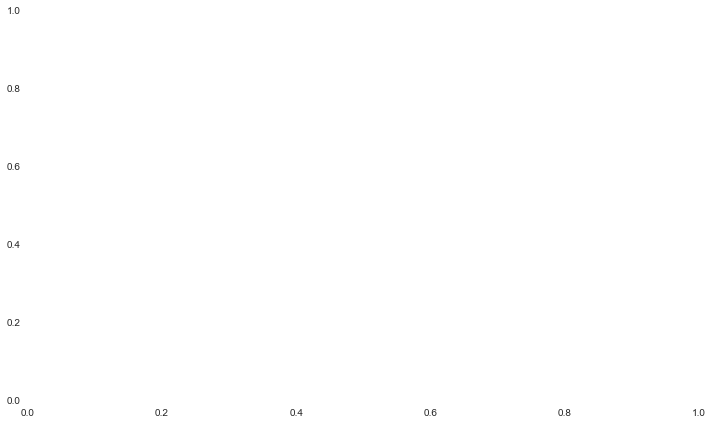

In [54]:
sns.lmplot("case_id", " tfr", tfr_df, size=6, aspect=5/3);